<p style="text-align: center"><img src="https://gitlab.aicrowd.com/aicrowd/assets/-/raw/master/challenges/clock-decomposition/notebook-banner.jpg?inline=false" alt="Drawing" style="height: 400px; text-align: center"/></p>

# What is the notebook about?

The challenge is to use the features extracted from the Clock Drawing Test to build an automated and algorithm to predict whether each participant is one of three phases:

1)    Pre-Alzheimer’s (Early Warning)
2)    Post-Alzheimer’s (Detection)
3)    Normal (Not an Alzheimer’s patient)

In machine learning terms: this is a 3-class classification task.

# How to use this notebook 📝

<p style="text-align: center"><img src="https://gitlab.aicrowd.com/aicrowd/assets/-/raw/master/notebook/aicrowd_notebook_submission_flow.png?inline=false" alt="notebook overview" style="width: 650px;"/></p>

- **Update the config parameters**. You can define the common variables here

Variable | Description
--- | ---
`AICROWD_DATASET_PATH` | Path to the file containing test data (The data will be available at `/ds_shared_drive/` on aridhia workspace)
`AICROWD_PREDICTIONS_PATH` | Path to write the output to. This should be an absolute path.
`AICROWD_ASSETS_DIR` | In case your notebook needs additional files (like model weights, etc.,), you can add them to a directory and specify the path to the directory here (please specify relative path). The contents of this directory will be sent to AIcrowd for evaluation.
`AICROWD_API_KEY` | In order to submit your code to AIcrowd, you need to provide your account's API key. This key is available at https://www.aicrowd.com/participants/me

- **Installing packages**. Please use the [Install packages 🗃](#install-packages-) section to install the packages
- **Training your models**. All the code within the [Training phase ⚙️](#training-phase-) section will be skipped during evaluation. **Please make sure to save your model weights in the assets directory and load them in the predictions phase section** 

# Setup AIcrowd Utilities 🛠

We use this to bundle the files for submission and create a submission on AIcrowd. **Do not edit this block**. These are the dependencies needed for making AIcrowd submission, you can skip this block untouched.

In [30]:
cat(system('curl -sL https://gitlab.aicrowd.com/snippets/34123/raw > aicrowd.R', intern=TRUE), sep='\n')
cat(system('pip3 install -q -U aicrowd-cli', intern=TRUE), sep='\n')
cat(system('pip install -q -U aicrowd-cli', intern=TRUE), sep='\n')

In [31]:
source("aicrowd.R")

# Evaluation configuration 🧷

During the evaluation, these variables will get values from environment variables.

You can get your API key from https://www.aicrowd.com/participants/me

In [32]:
# You can get your API key from https://www.aicrowd.com/participants/me

# Please use the absolute for the location of the dataset.
AICROWD_DATASET_PATH = Sys.getenv("DATASET_PATH", "/ds_shared_drive/validation.csv")
AICROWD_PREDICTIONS_PATH = Sys.getenv("PREDICTIONS_PATH", "predictions.csv")

# Use this directory to store any assets needed
AICROWD_ASSETS_DIR = "assets"

# Install packages 🗃

Your packages and dependencies listed below will be automatically installed during evaluations.

In [33]:
#install.packages("ggplot2", repos='http://cran.ma.imperial.ac.uk')
#install.packages("dplyr", repos='http://cran.ma.imperial.ac.uk')
#install.packages("stringr", repos='http://cran.ma.imperial.ac.uk')
cat(system('conda install --quiet --yes -c conda-forge r-xgboost', intern=TRUE), sep='\n')


Solving environment: ...working... done

# All requested packages already installed.



# Define preprocessing code 💻

In [34]:
library(ggplot2)
library(dplyr)
library(stringr)
library(xgboost)

In [35]:
##########################################################################################################
#
# $$\   $$\ $$$$$$$$\ $$\       $$\       $$$$$$\  
# $$ |  $$ |$$  _____|$$ |      $$ |     $$  __$$\ 
# $$ |  $$ |$$ |      $$ |      $$ |     $$ /  $$ |
# $$$$$$$$ |$$$$$\    $$ |      $$ |     $$ |  $$ |
# $$  __$$ |$$  __|   $$ |      $$ |     $$ |  $$ |
# $$ |  $$ |$$ |      $$ |      $$ |     $$ |  $$ |
# $$ |  $$ |$$$$$$$$\ $$$$$$$$\ $$$$$$$$\ $$$$$$  |
# \__|  \__|\________|\________|\________|\______/  
# 
#
# Hello R user! 
# I wanted to share a starter kit for R users...  are there any in the competition? :)  
#
# Below you will find:  
# 
#   - light Exploratory Data Analysis
#   - small Feature Engineering
#   - Model Training
#   - Prediction Generating
#   - Working Submission (Leaderboard Log Loss of )
#
#
# I hope this can inspire you, and more importantly, help you debug any issues you might encounter!  
#
# Don't hesitate to comment below.  
# 
# Stay safe, enjoy!
#
# Michaël
#
##########################################################################################################

In [36]:
# Looking at the data, there is quite a few NAs.
#
# However, it appears most of the time that whenever there's a NA, it looks like 0 could be a good proxy.
#
# As an example, for the length of the clock hand.
#  - If the clock hand is absent, it is identified as NA.
#  - But we could reasonably also call it a length of 0.
#
# Therefore, in order to produce the correlation chart, I will replace all NAs with 0.


In [37]:
# names(td)[sapply(td, anyNA)]  #to see variables with NAs

In [38]:
preprocess <- function(df){ 
 
    # Remove the ID variable
    df <- df[, !names(df) %in% c("row_id")]
    
    #Converting character variables to factors
    df$intersection_pos_rel_centre <- as.factor(df$intersection_pos_rel_centre)
    
    
    # Feature Engineering
    df$count_NA <- rowSums( is.na( df[,] ))    # count the number of NA
    
    #Cleaning
    df[is.na(df)] <- 0  # imputing 0 to missing
    
    # Feature Enineering
    df$ellipse_area = 3.1451926 * df$double_major * df$double_minor / 2    # surface area of the clock
   
    return(df)
}



# Training phase ⚙️

You can define your training code here. This sections will be skipped during evaluation.

## Load training data

In [39]:
td = read.csv(str_replace(AICROWD_DATASET_PATH,"validation","train"))

td$diagnosis <- as.factor(td$diagnosis)
    

In [40]:
# The target variable is a multi-class, with 3 levels. 
#
#    normal
#    pre_alzheimer
#    post_alzheimer
#
# We will look at how behaves each feature variable in the context of the three classes to predict.

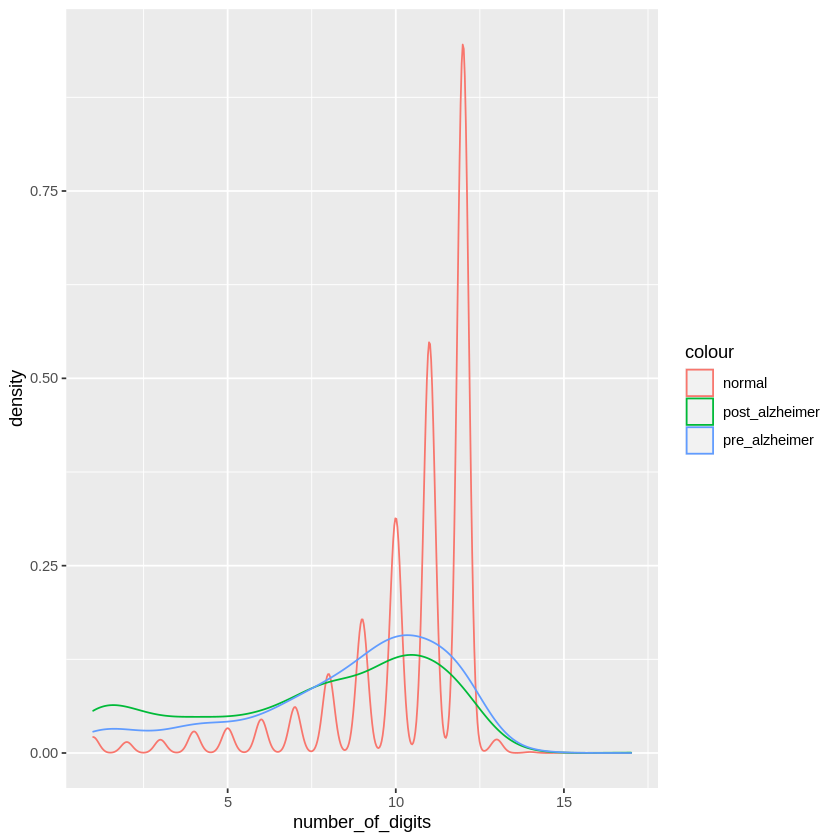

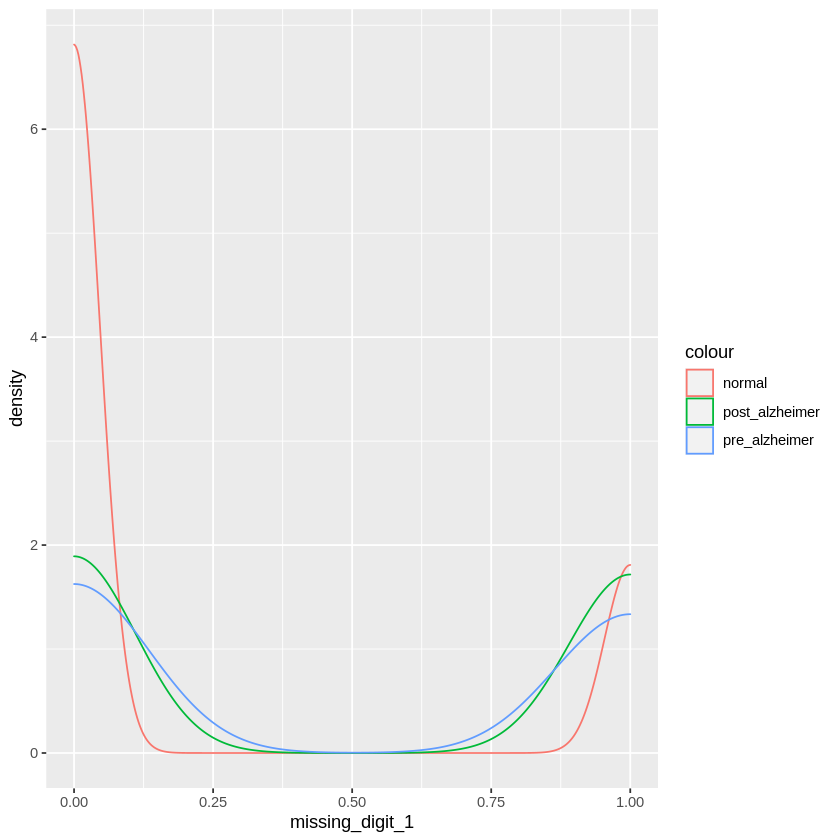

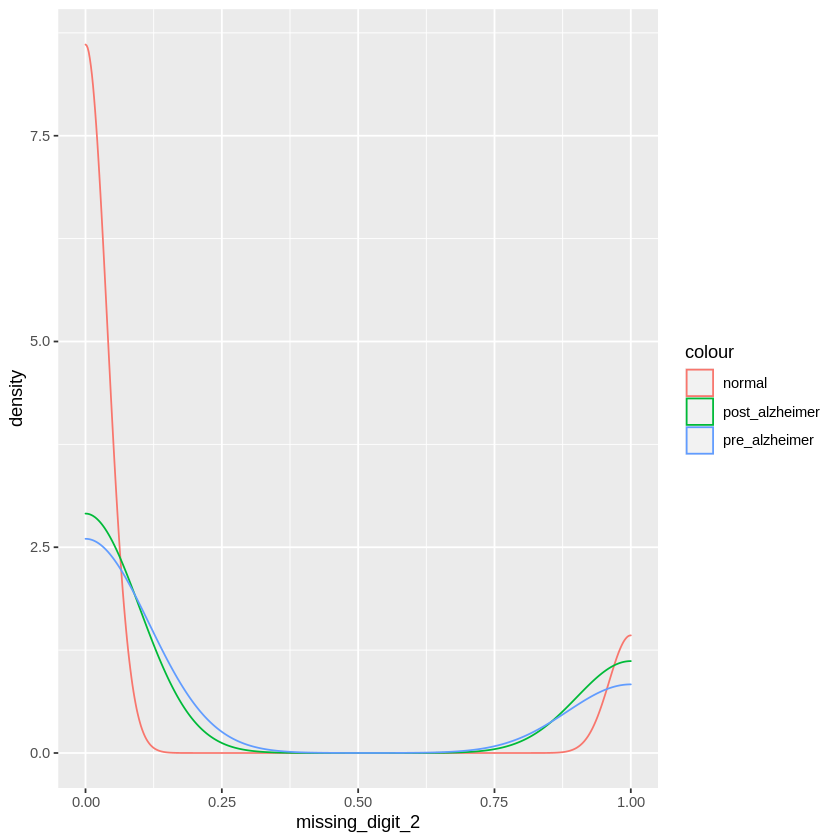

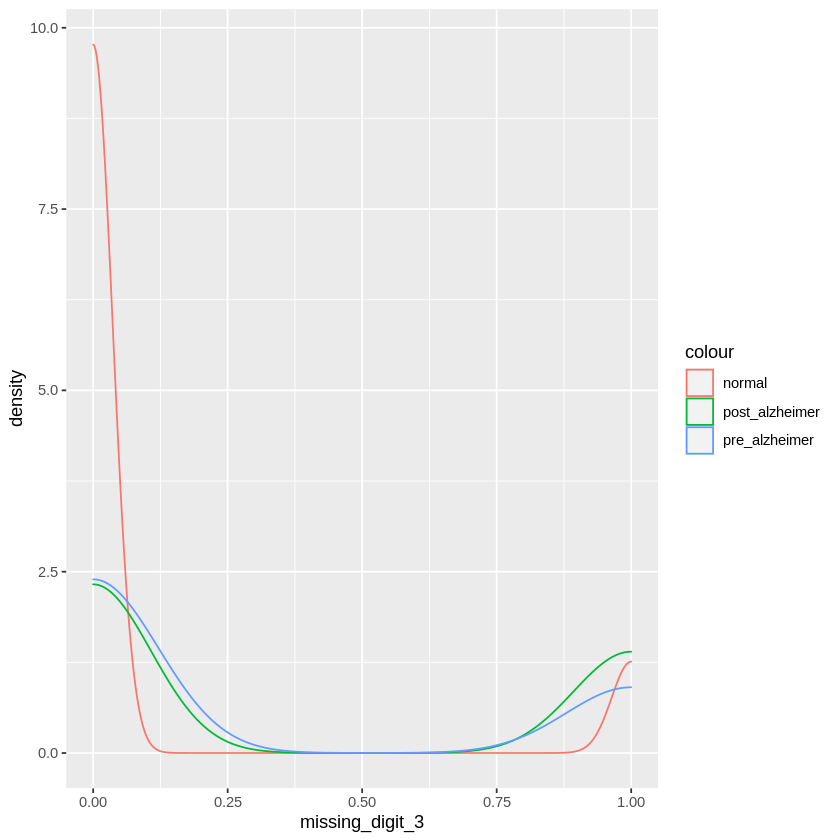

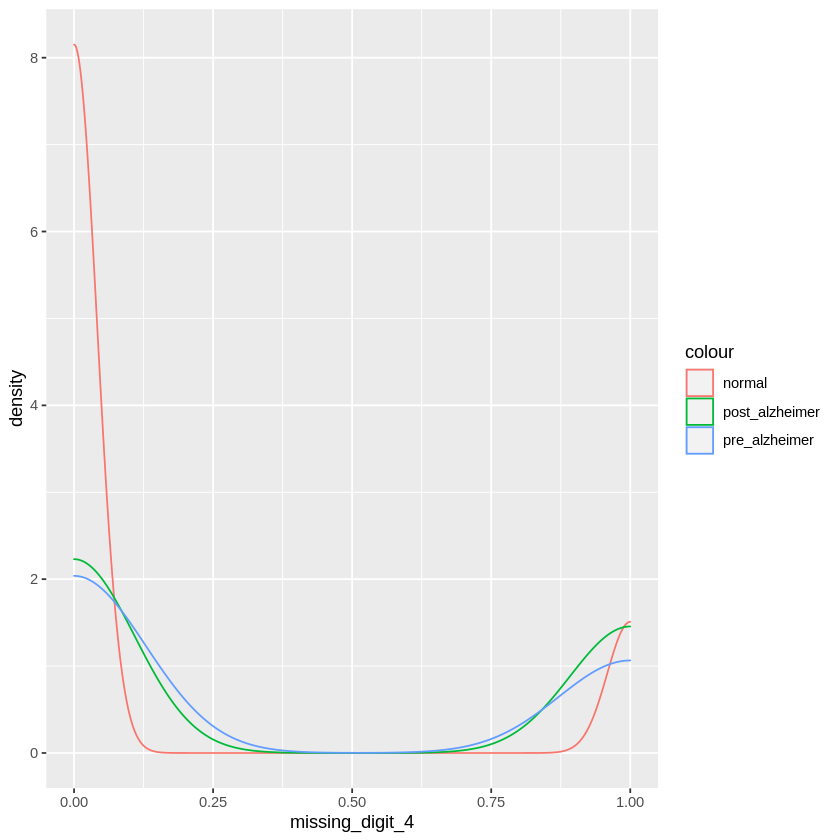

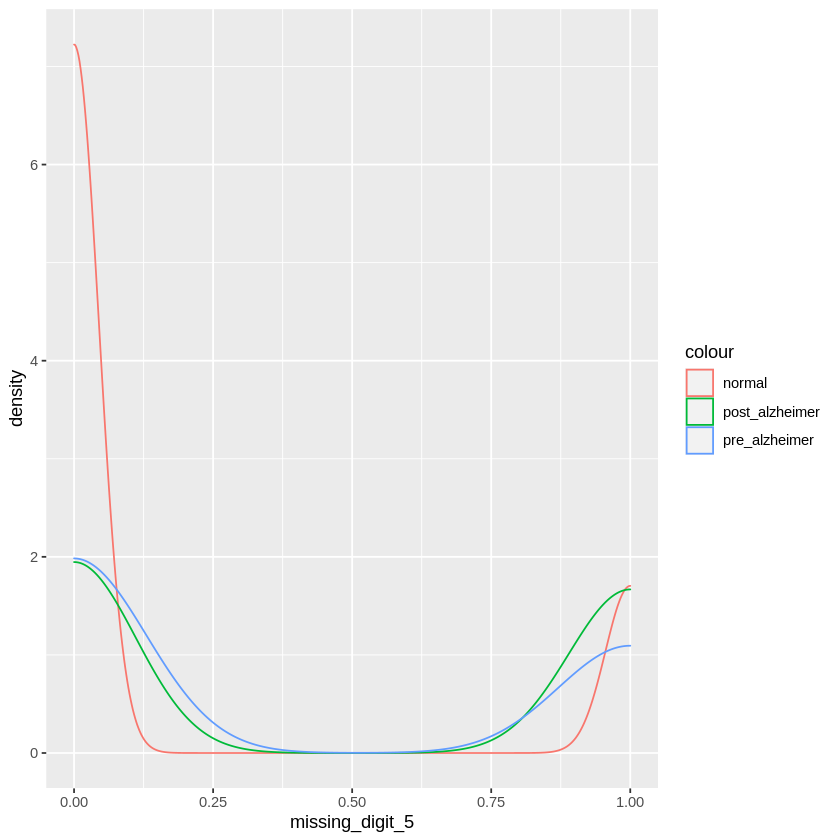

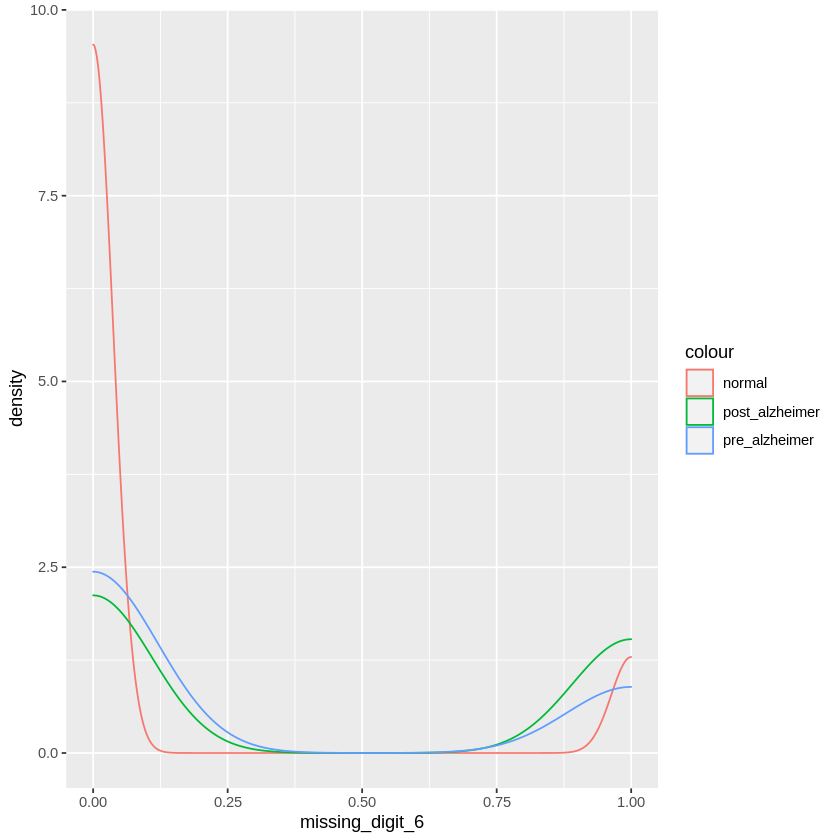

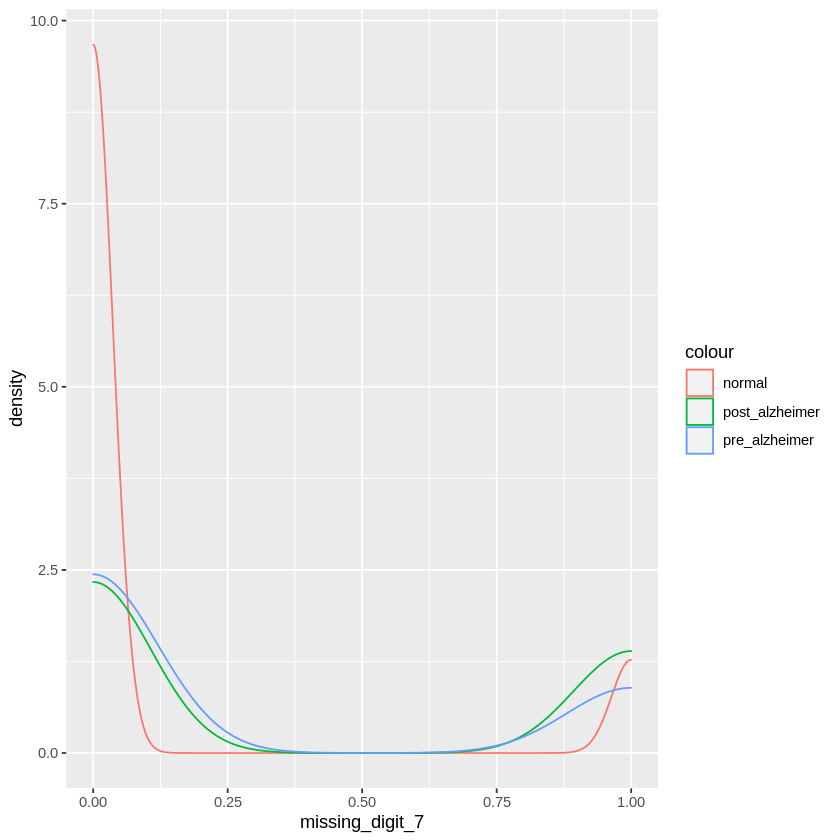

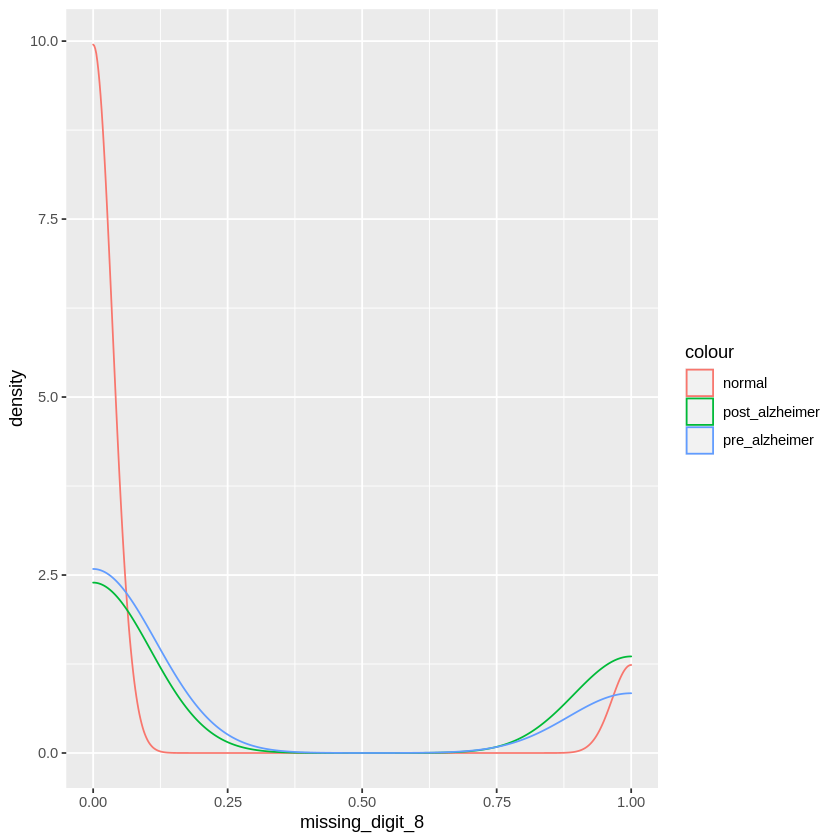

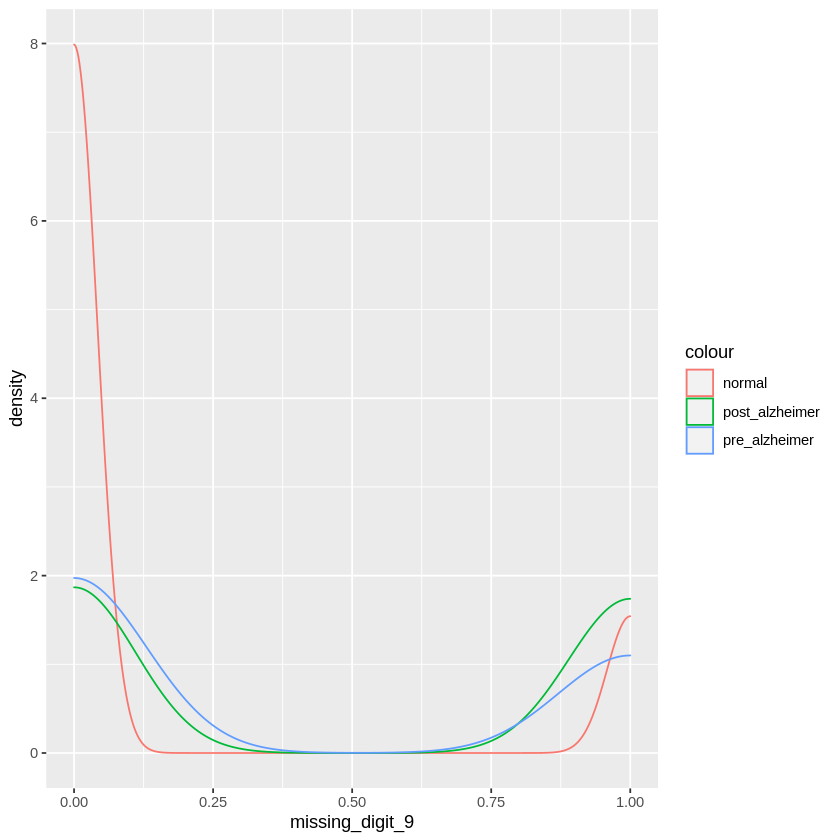

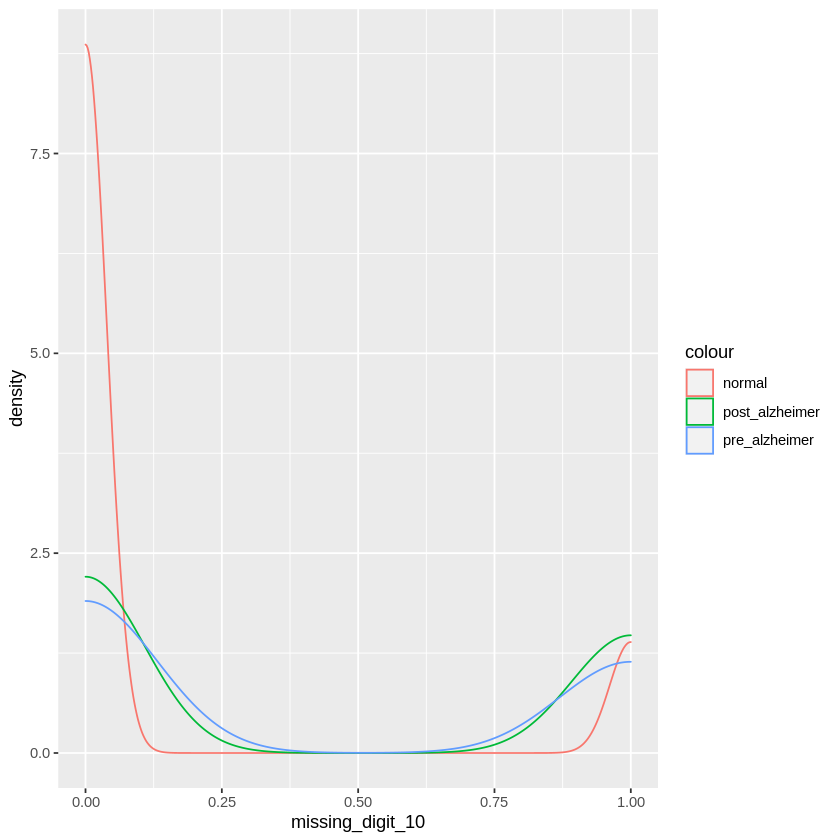

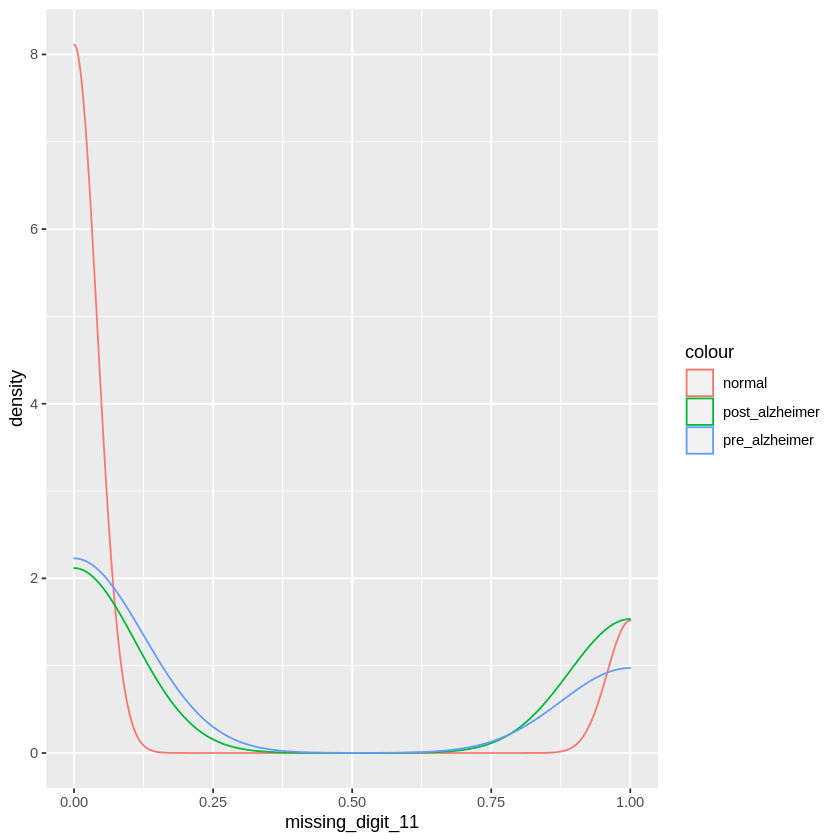

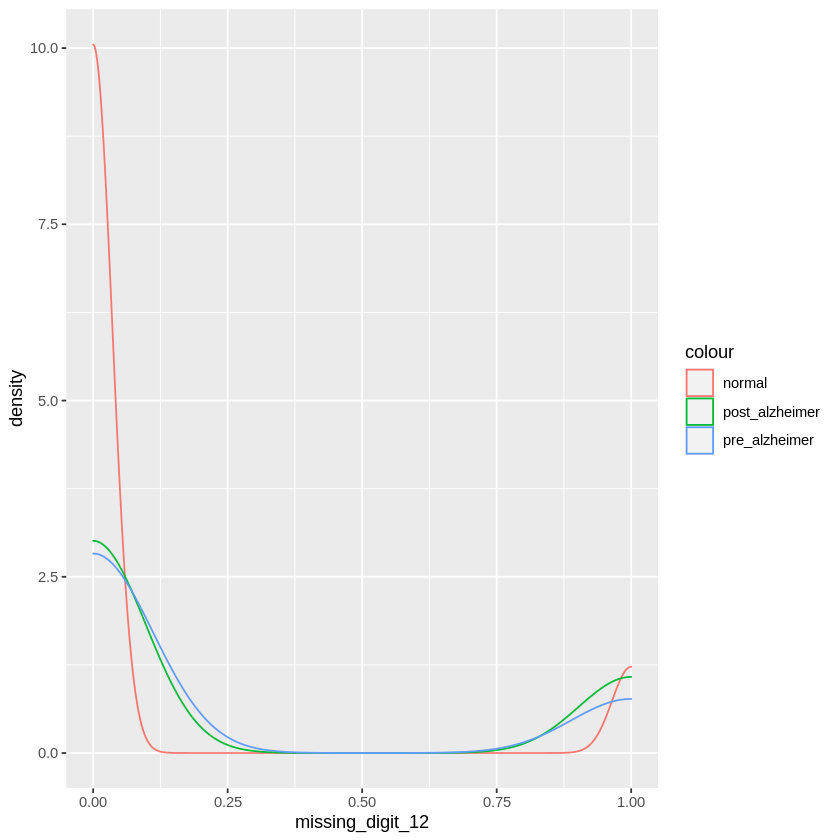

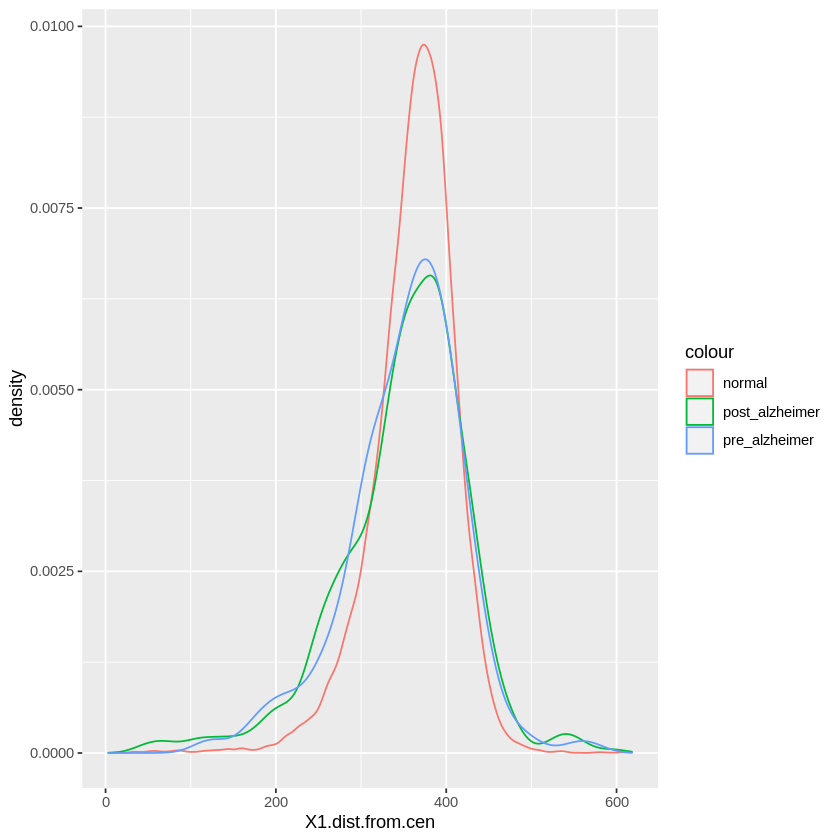

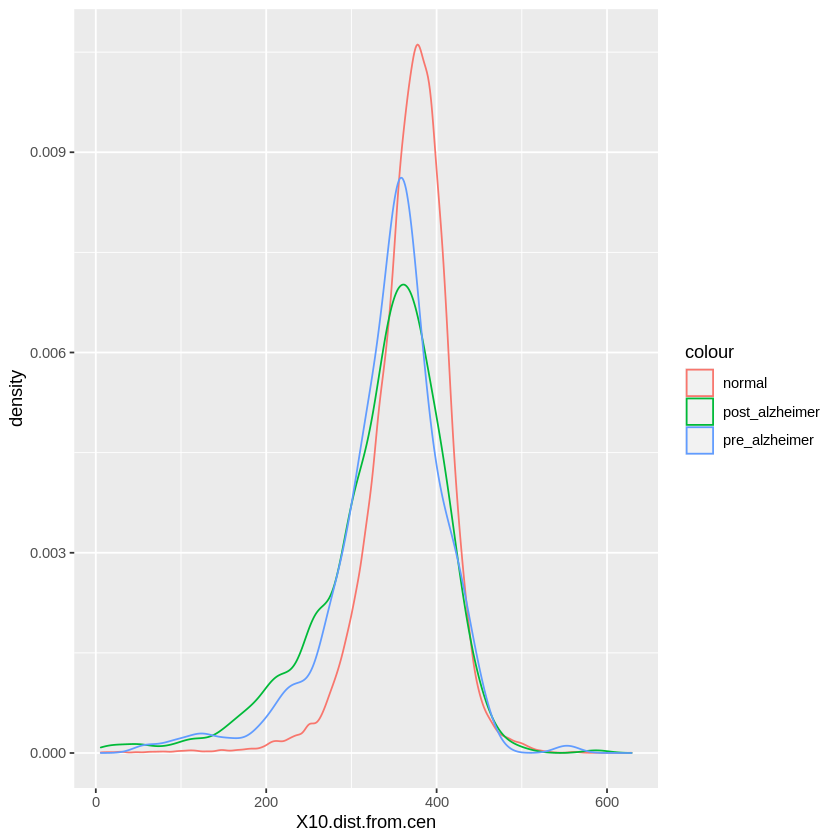

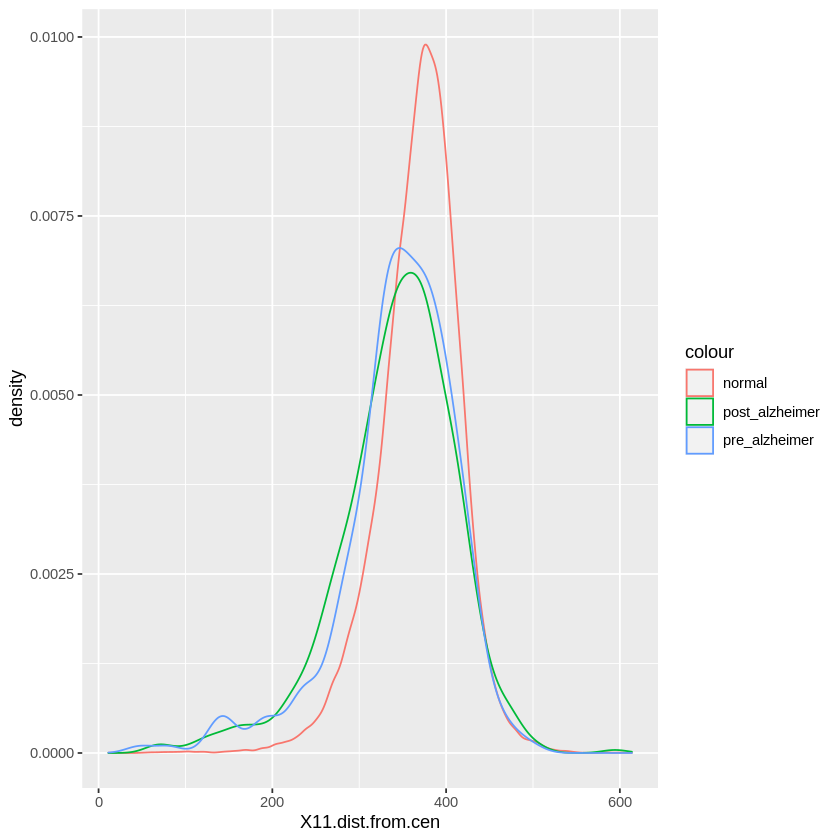

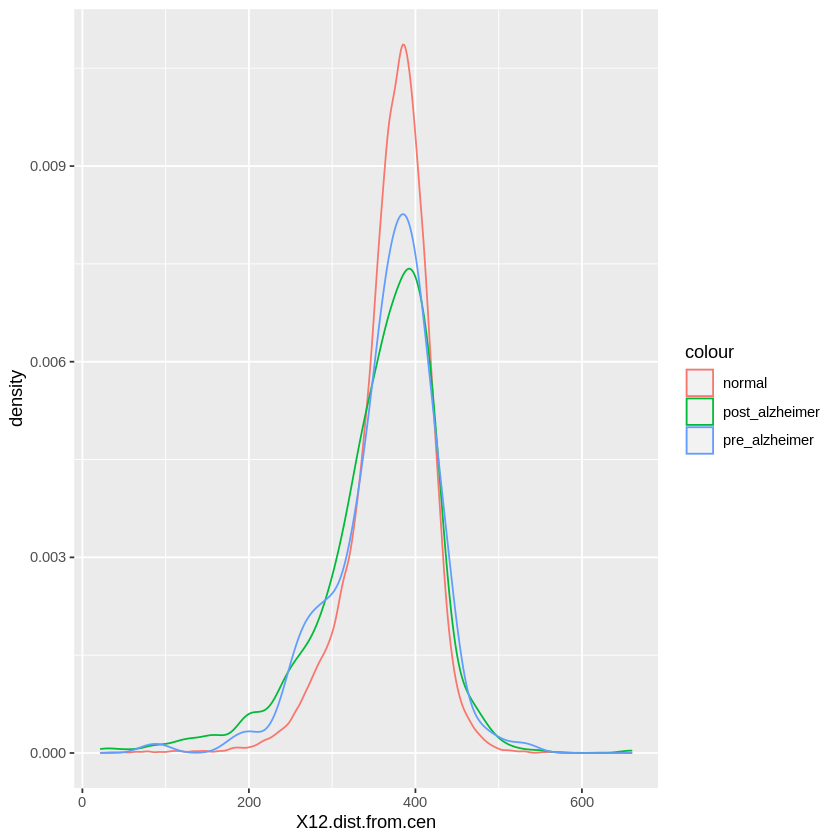

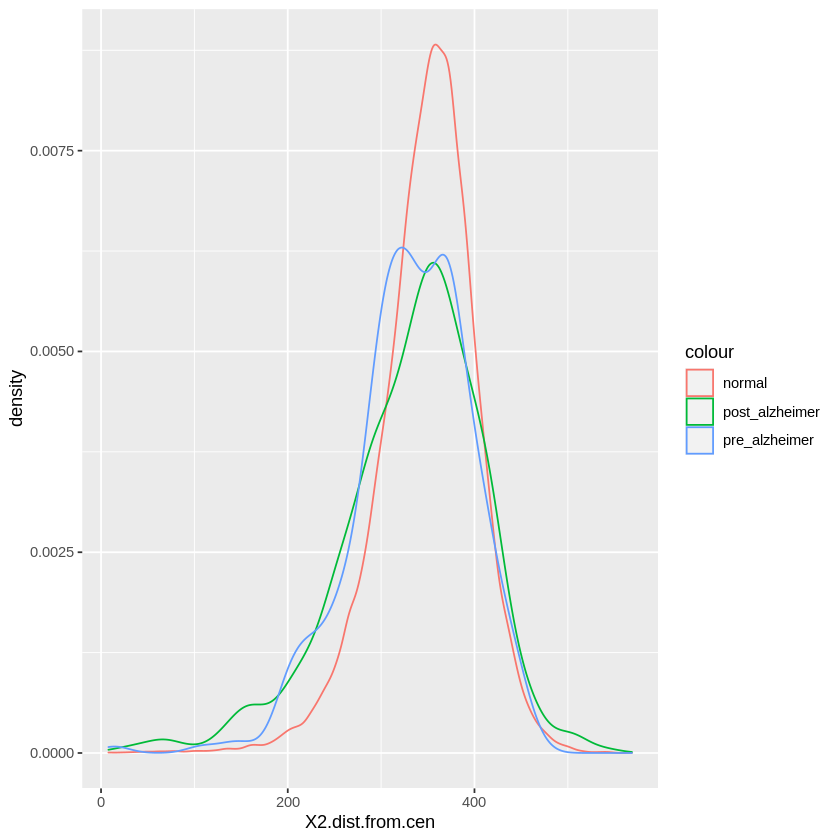

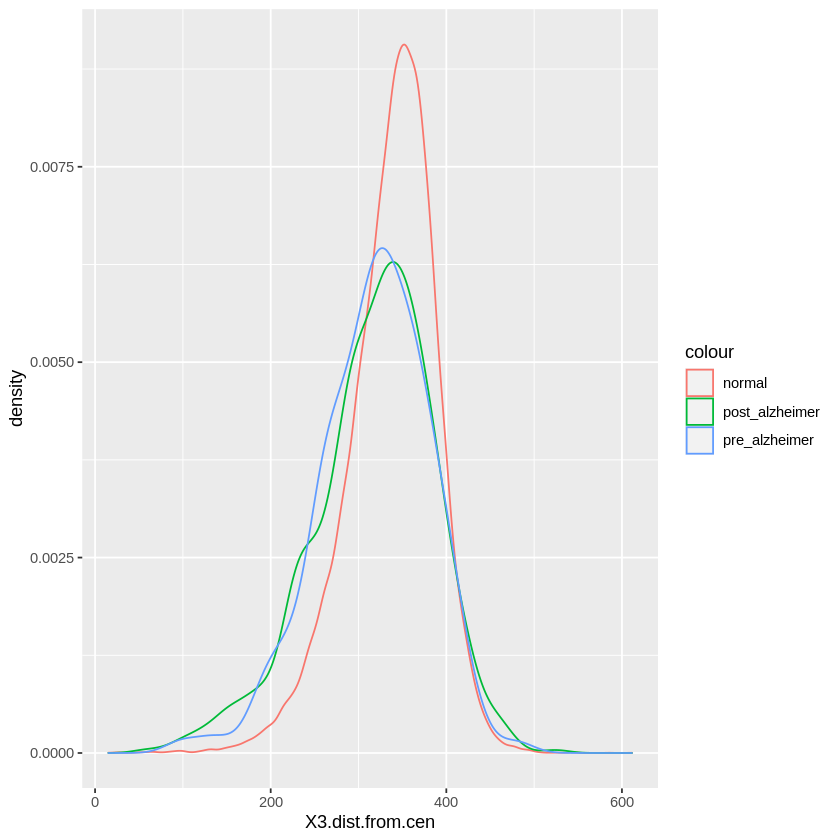

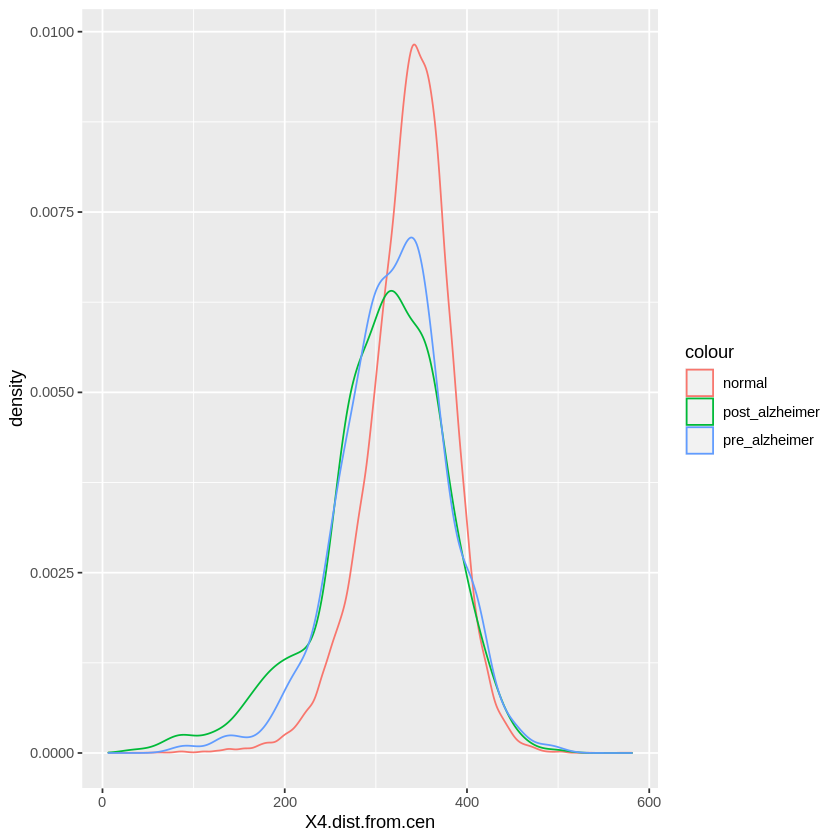

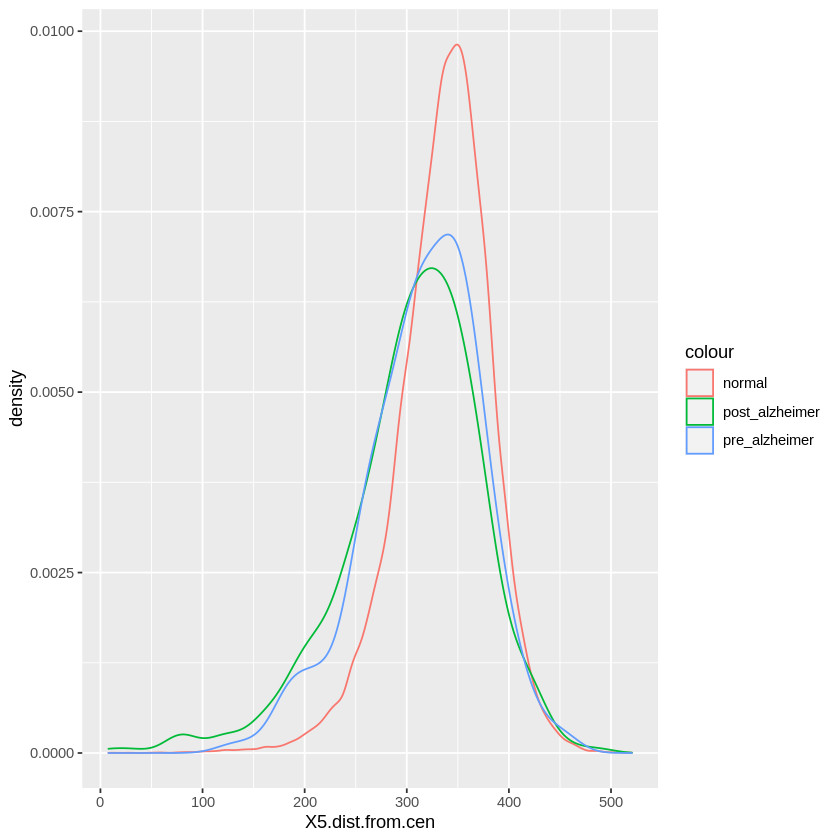

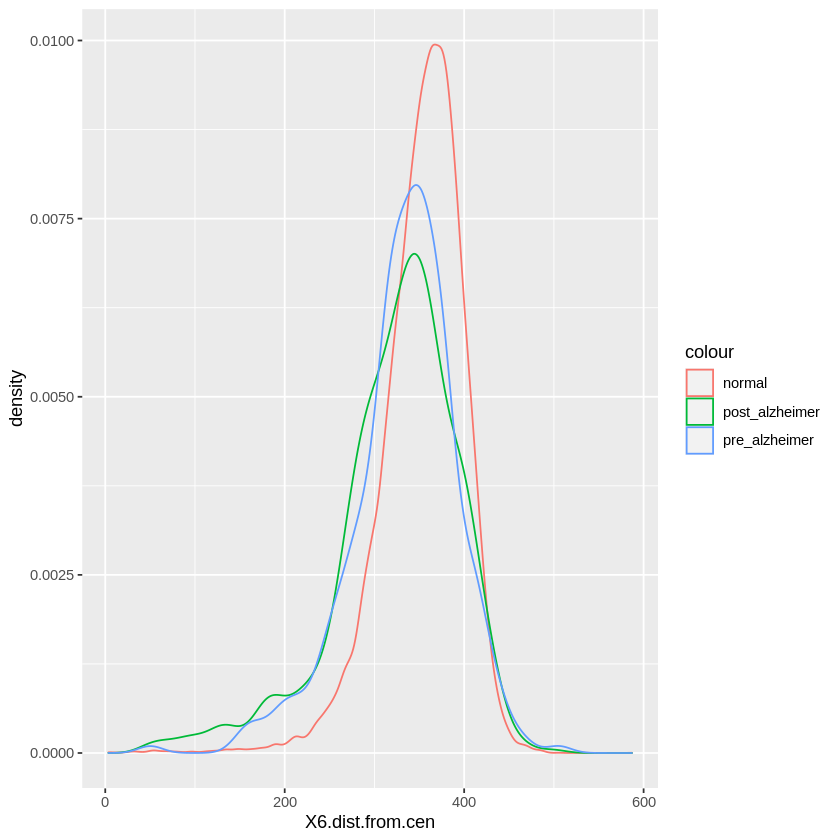

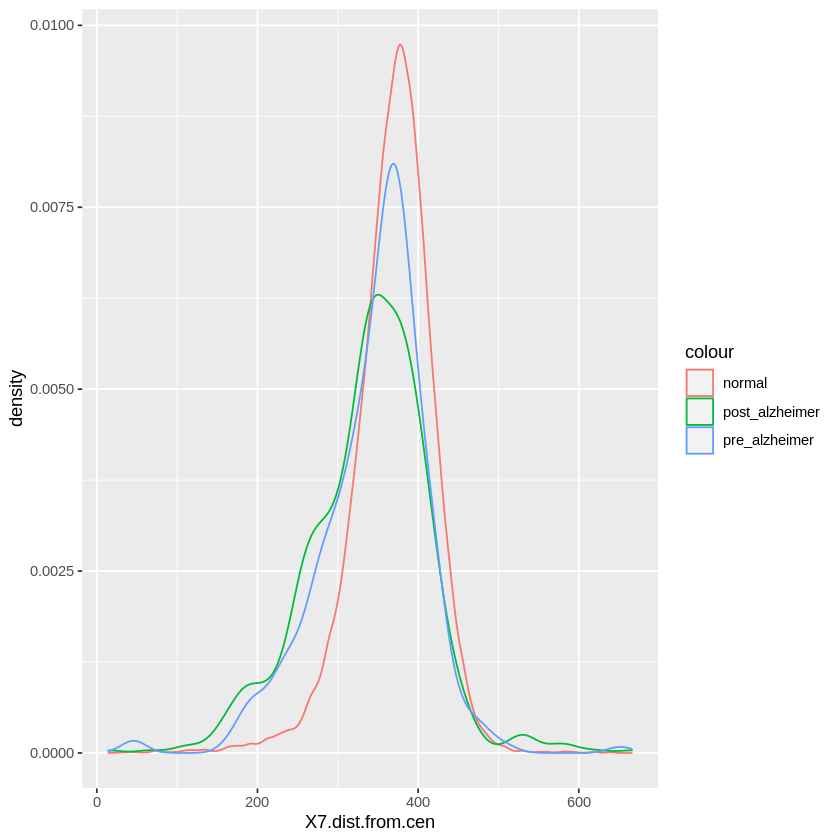

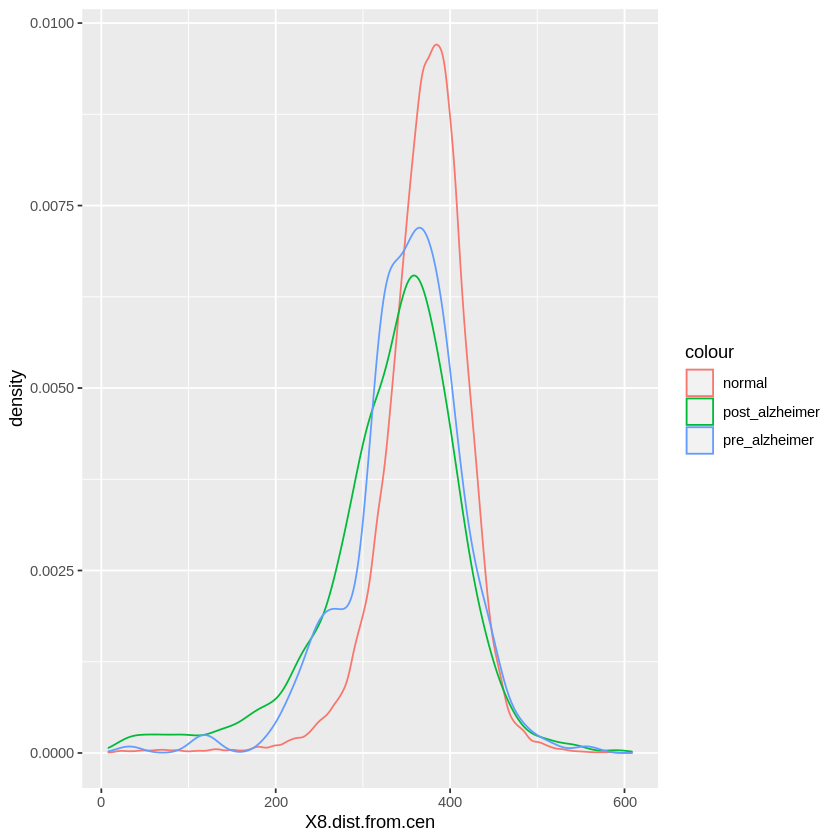

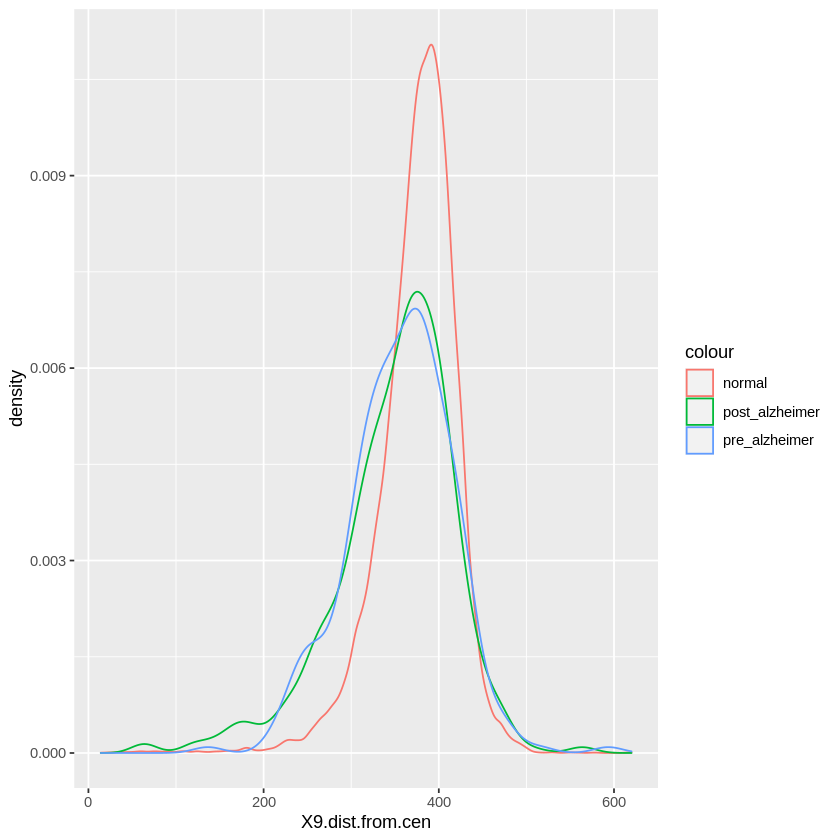

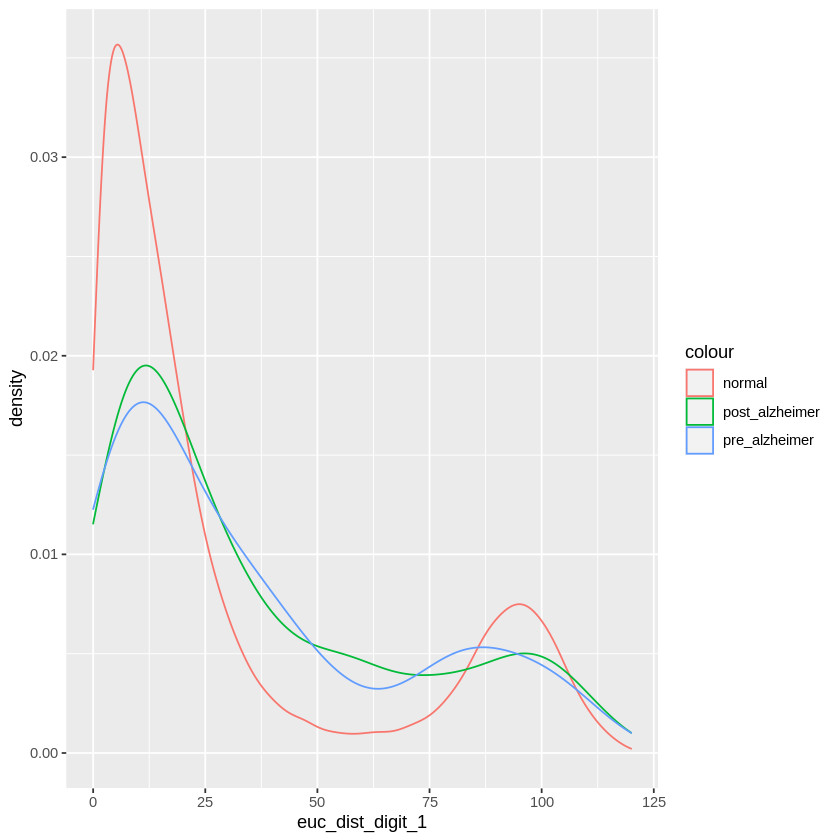

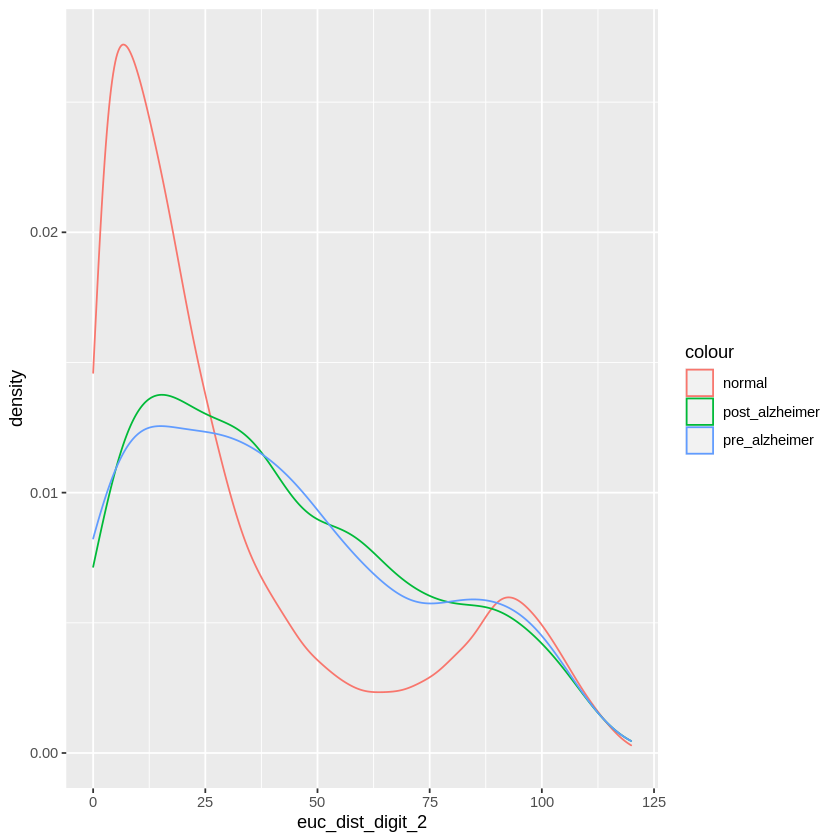

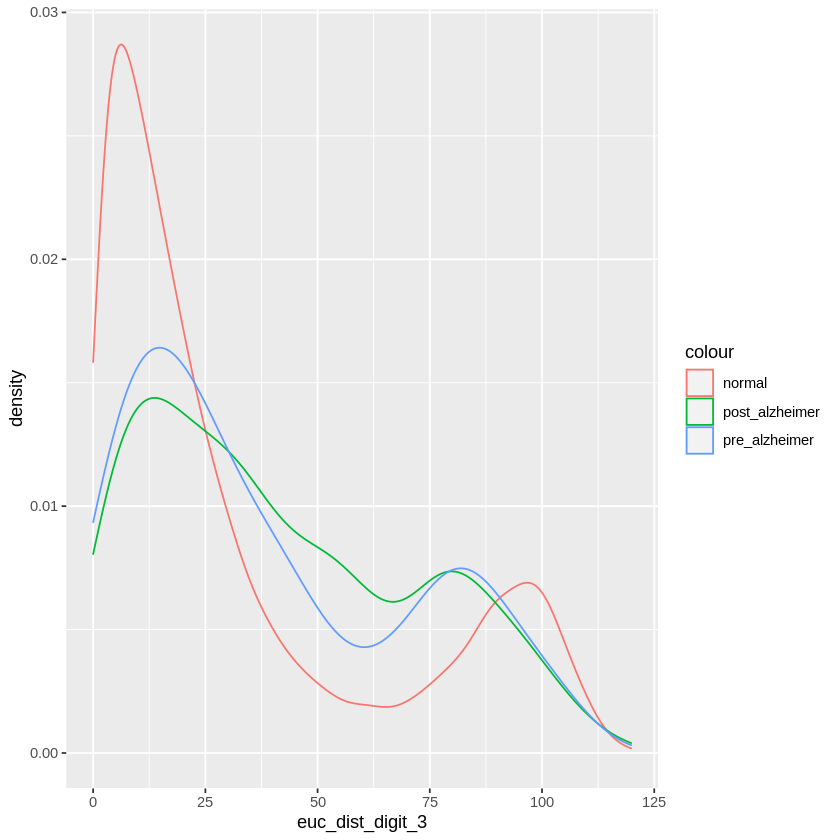

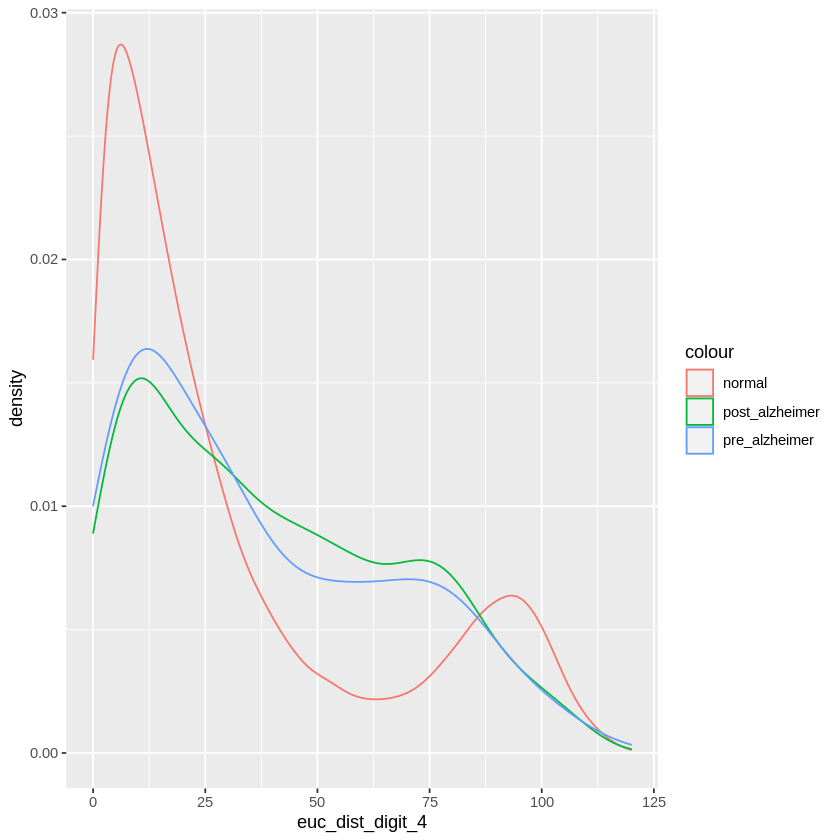

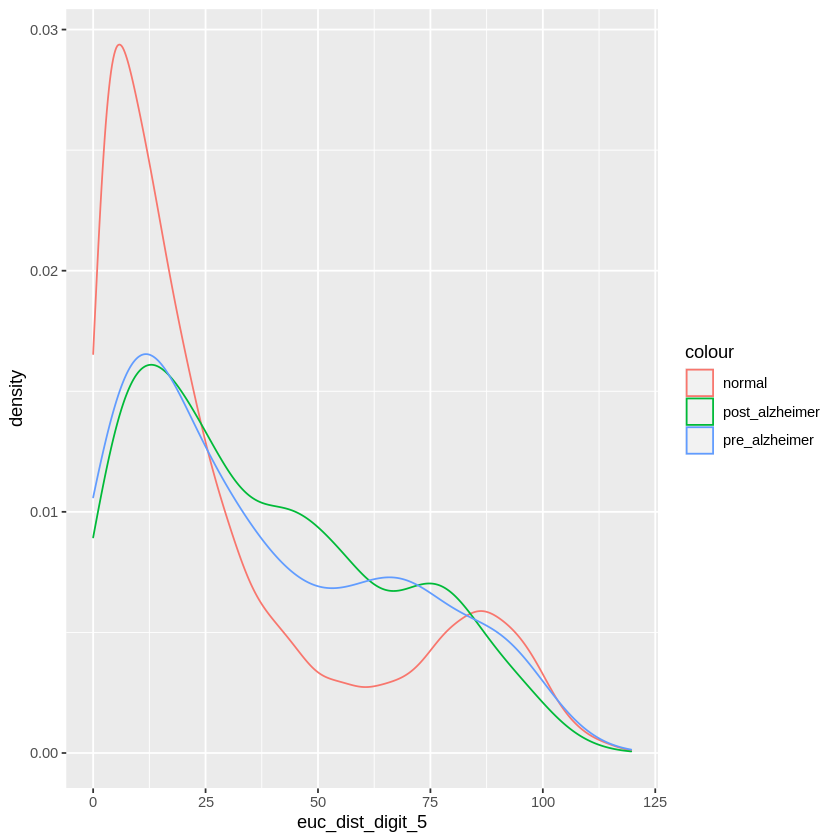

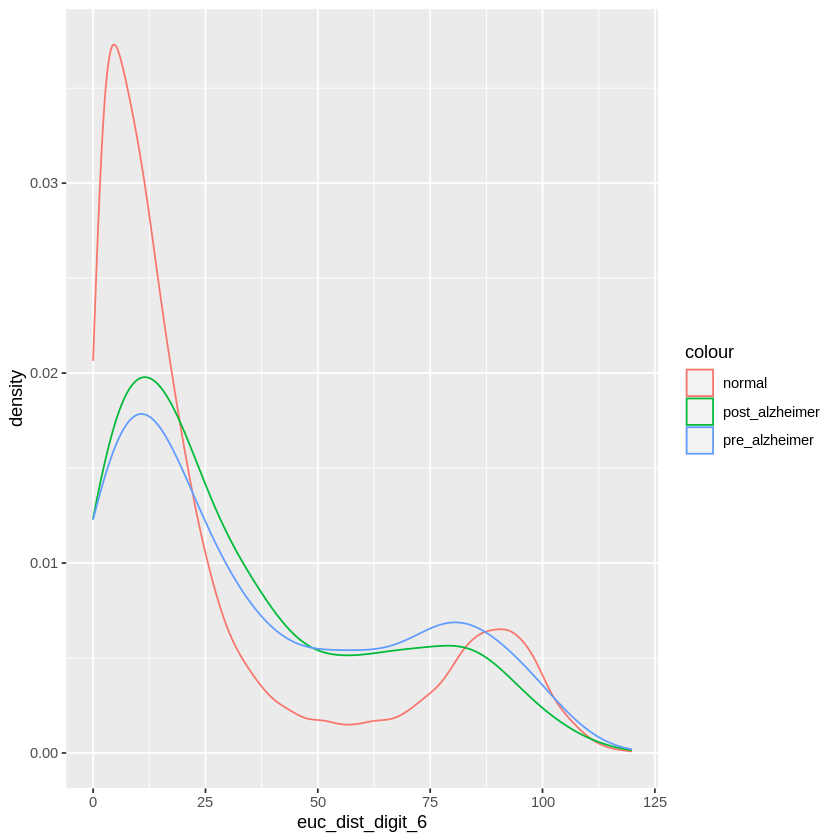

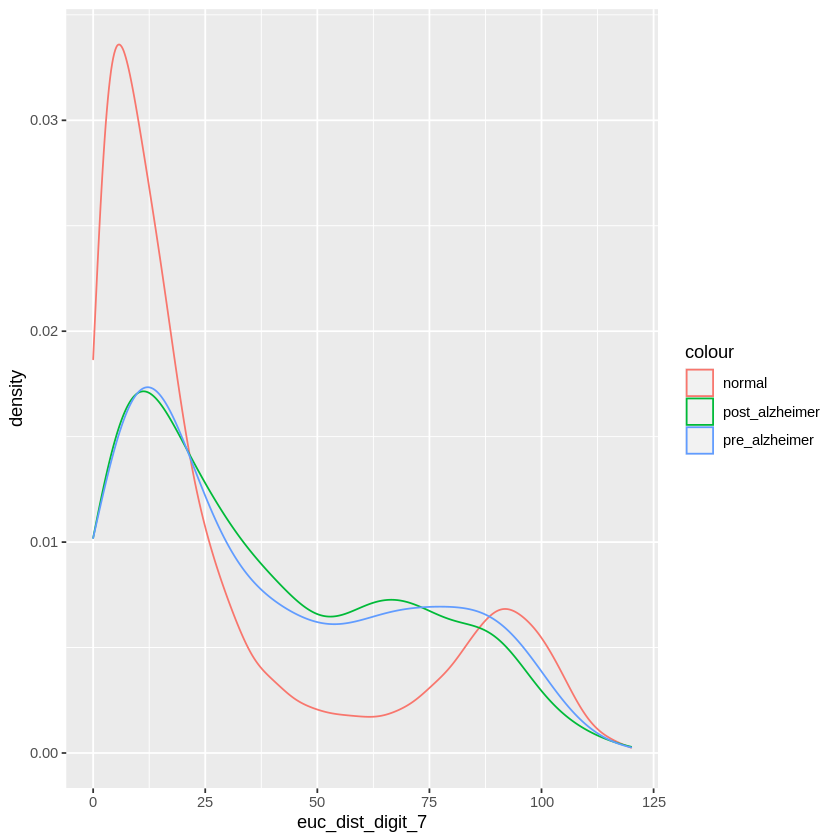

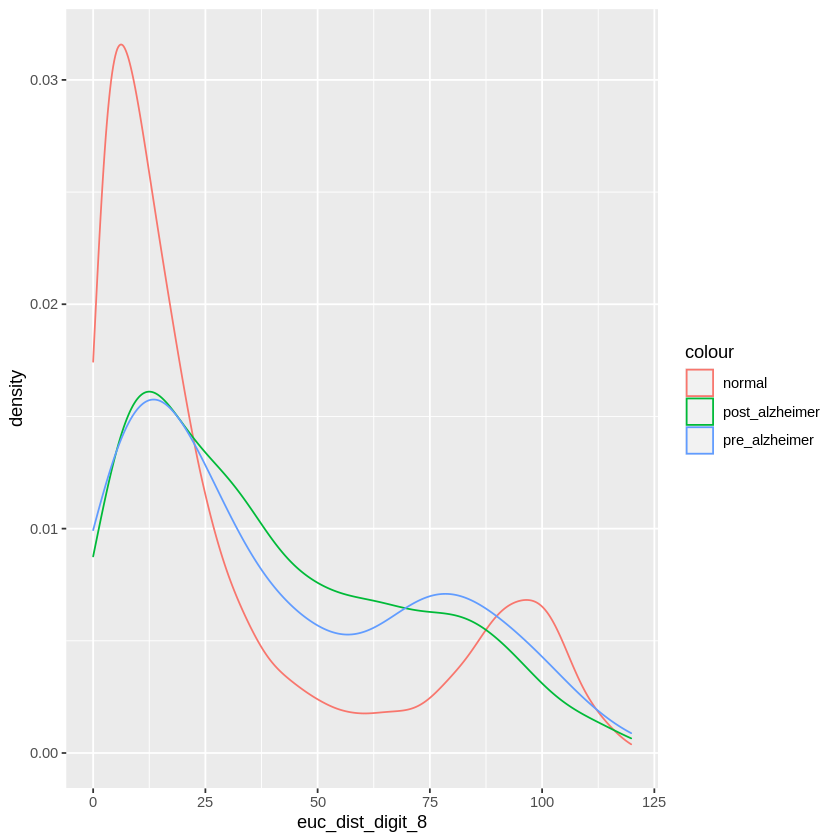

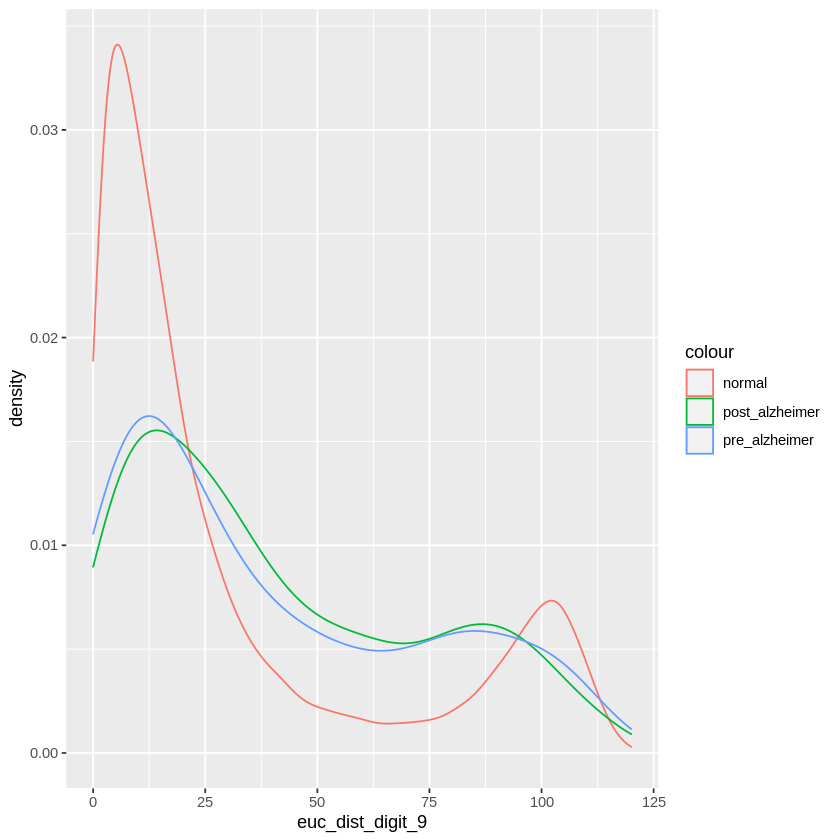

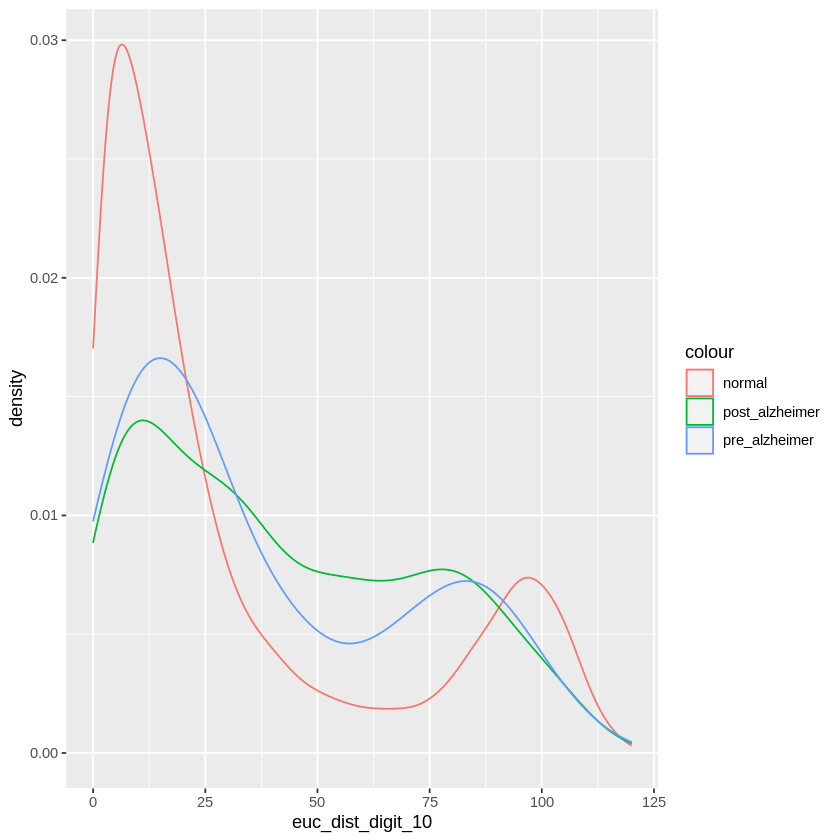

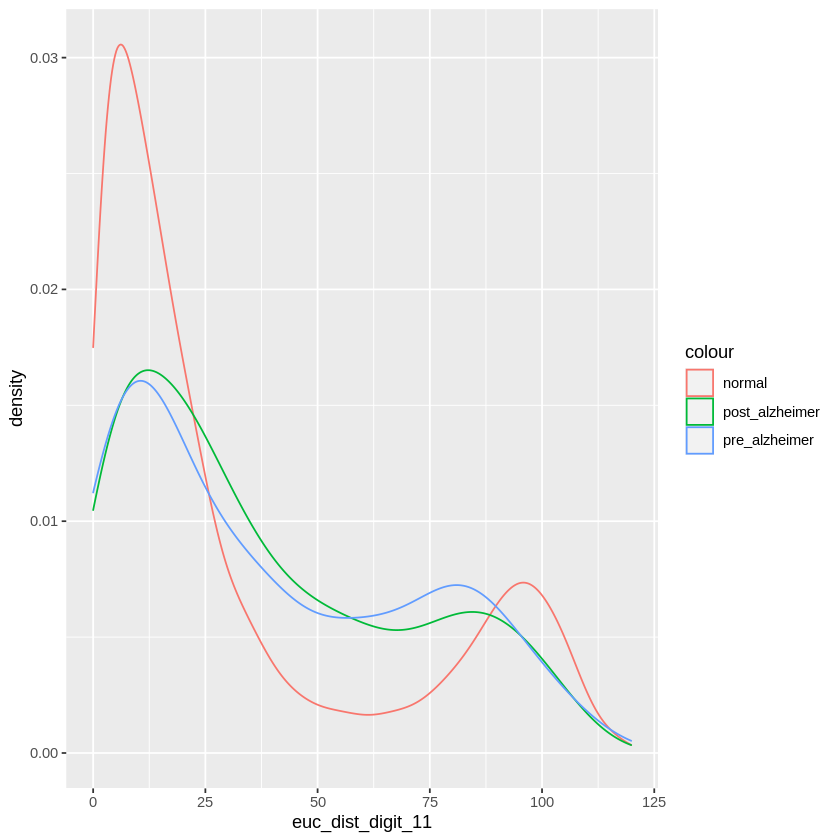

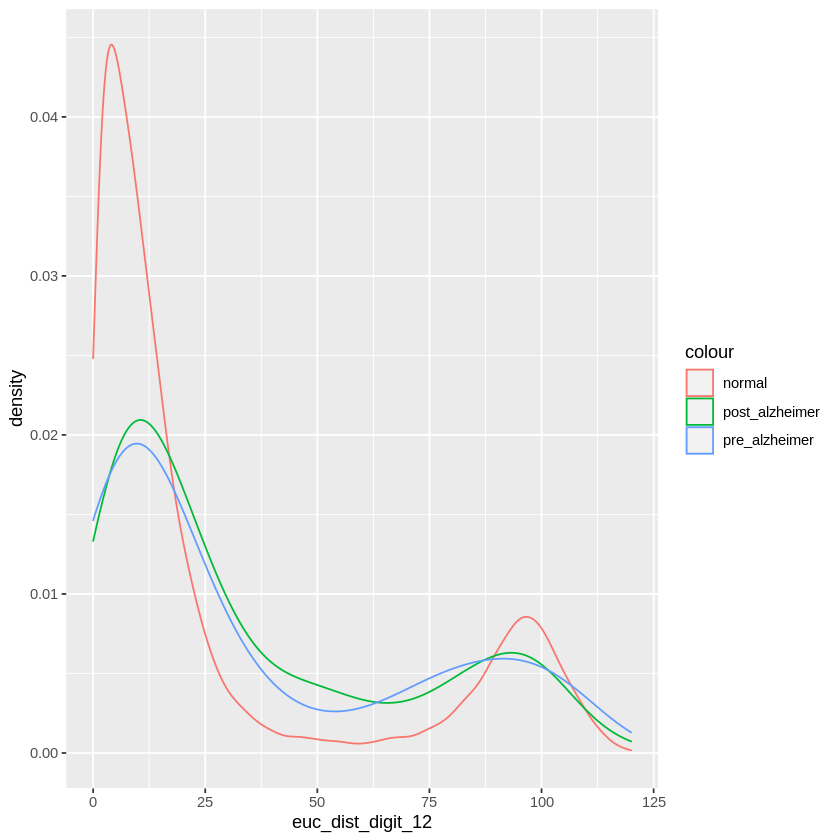

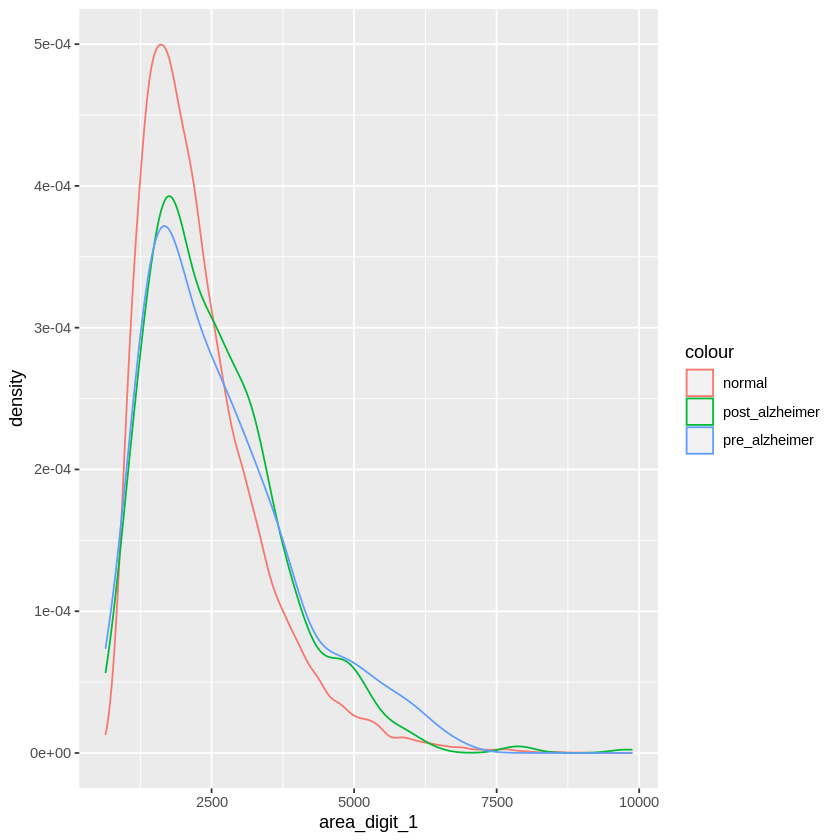

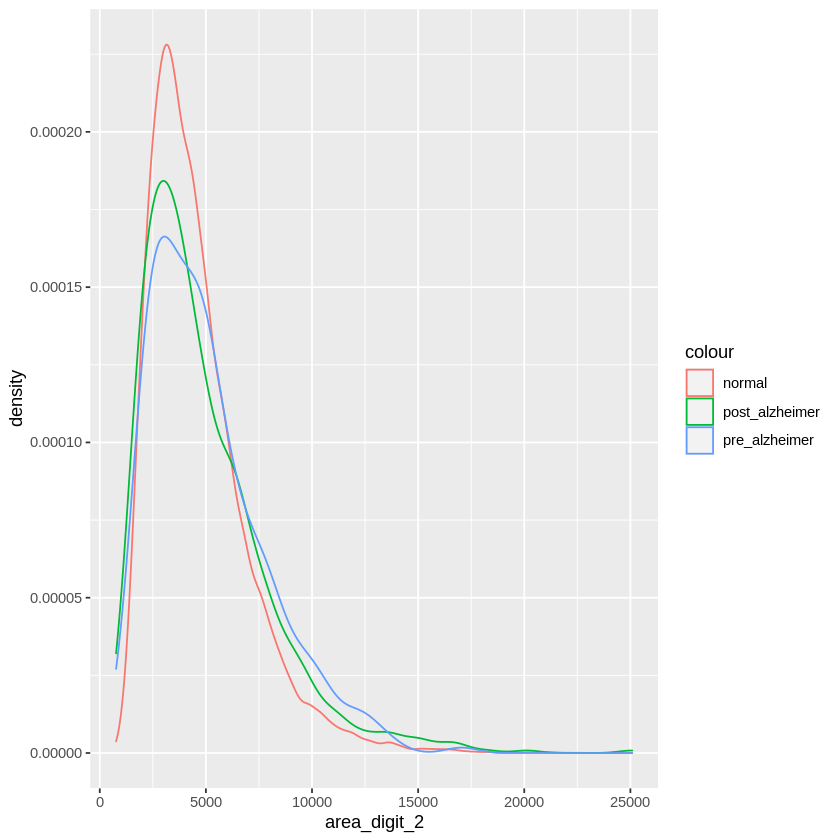

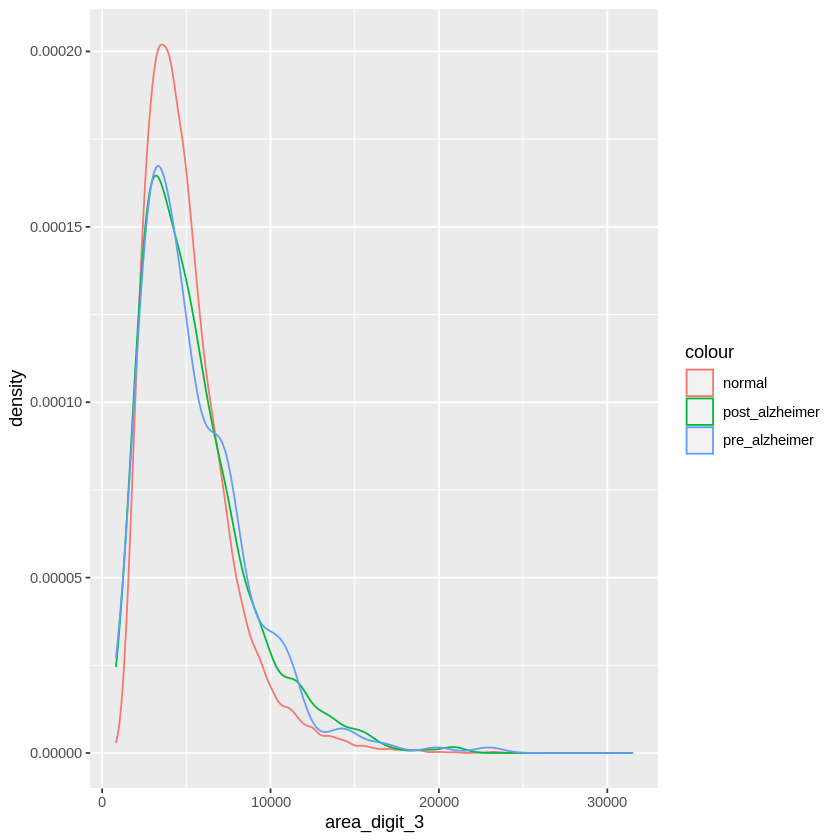

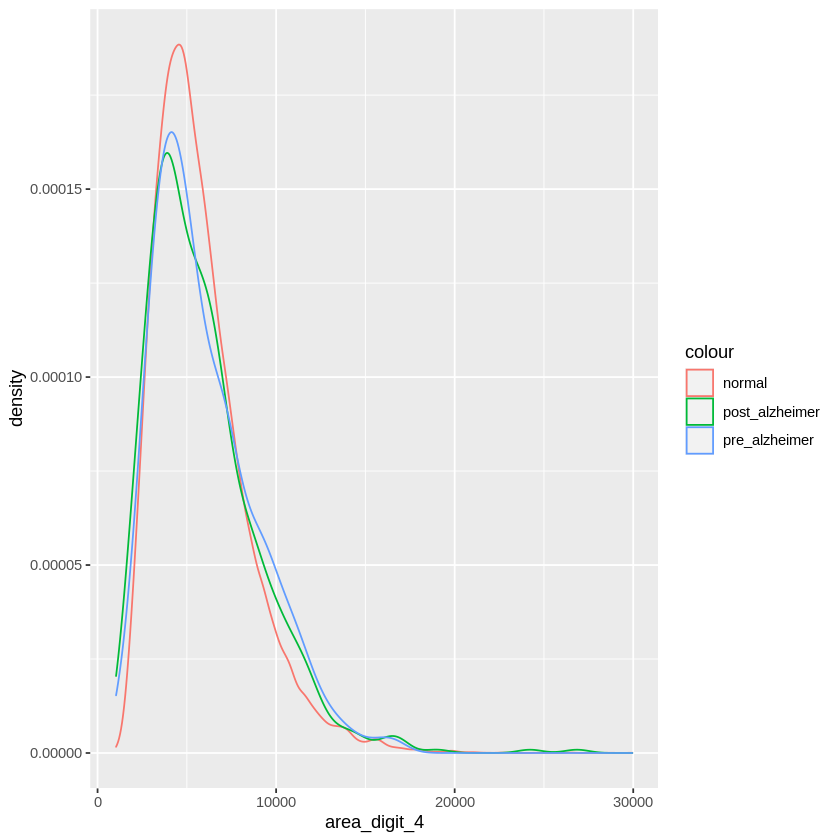

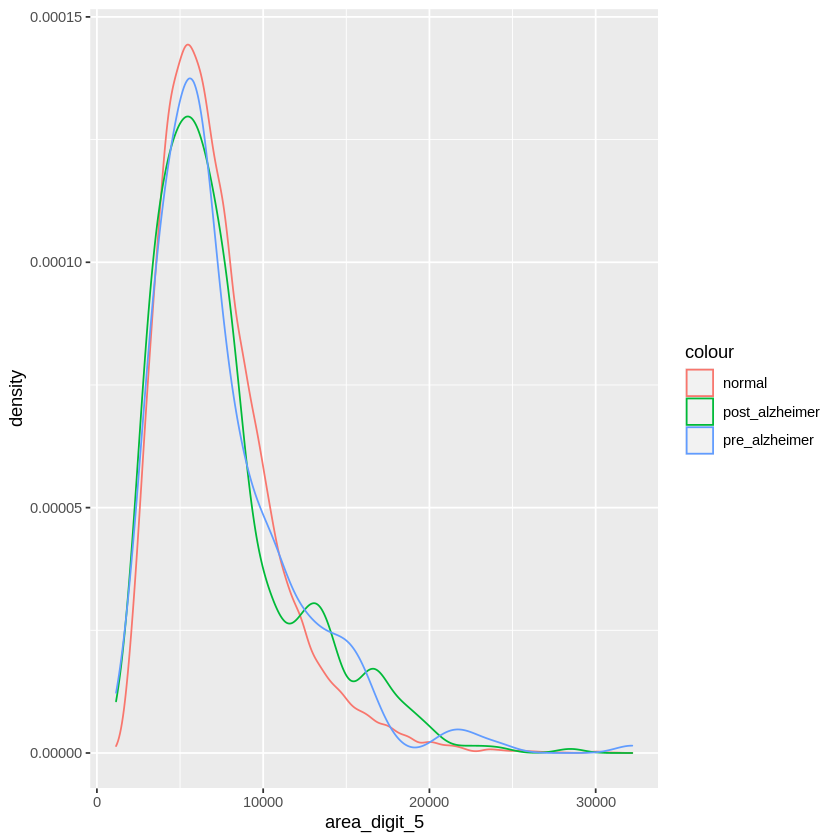

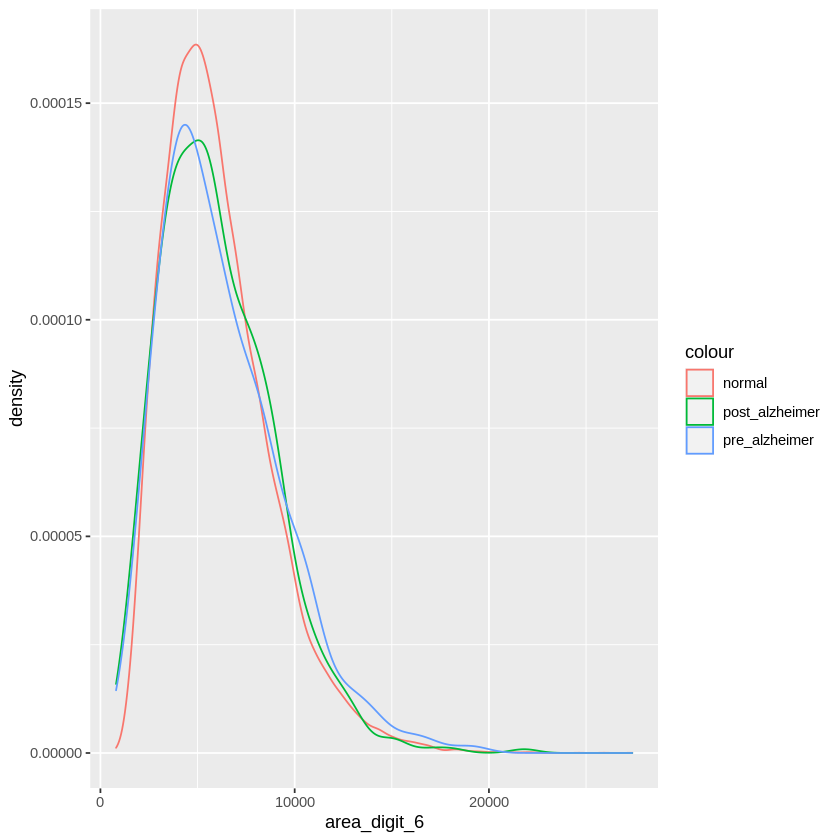

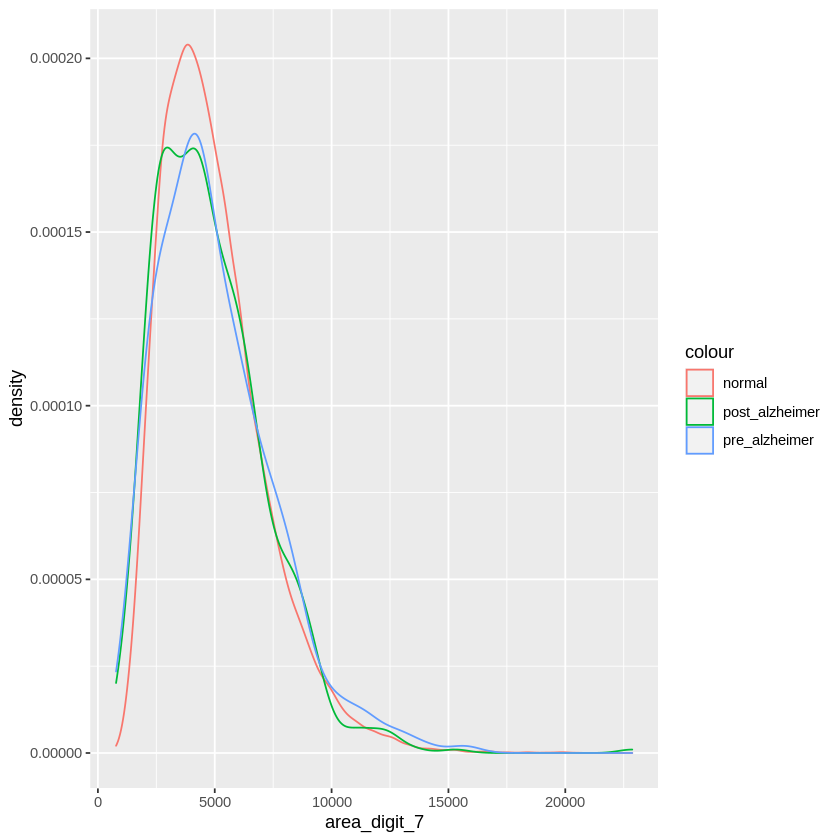

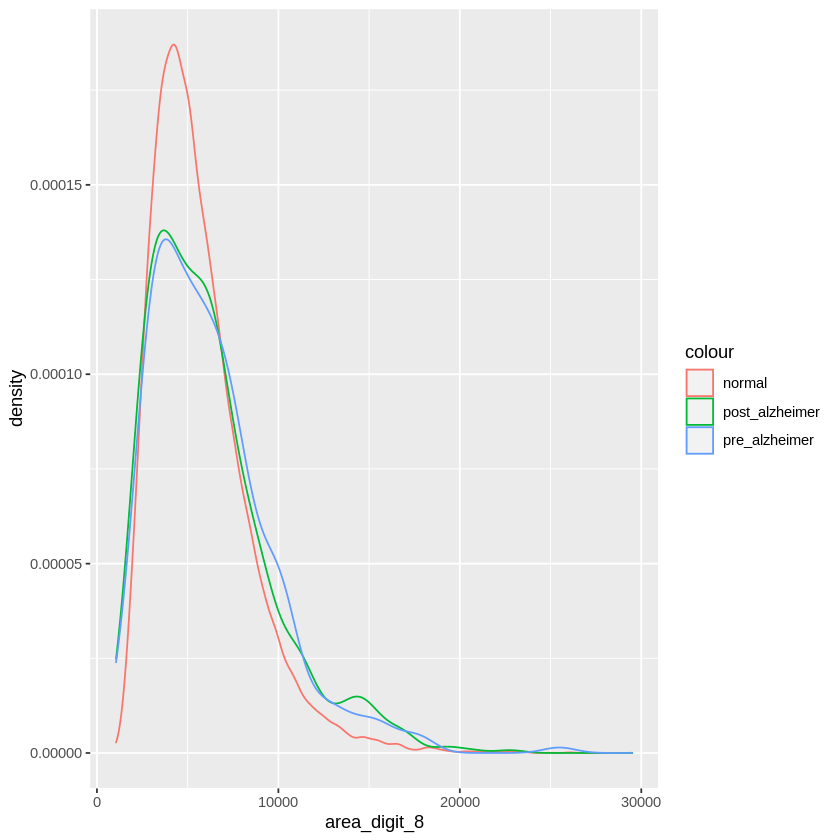

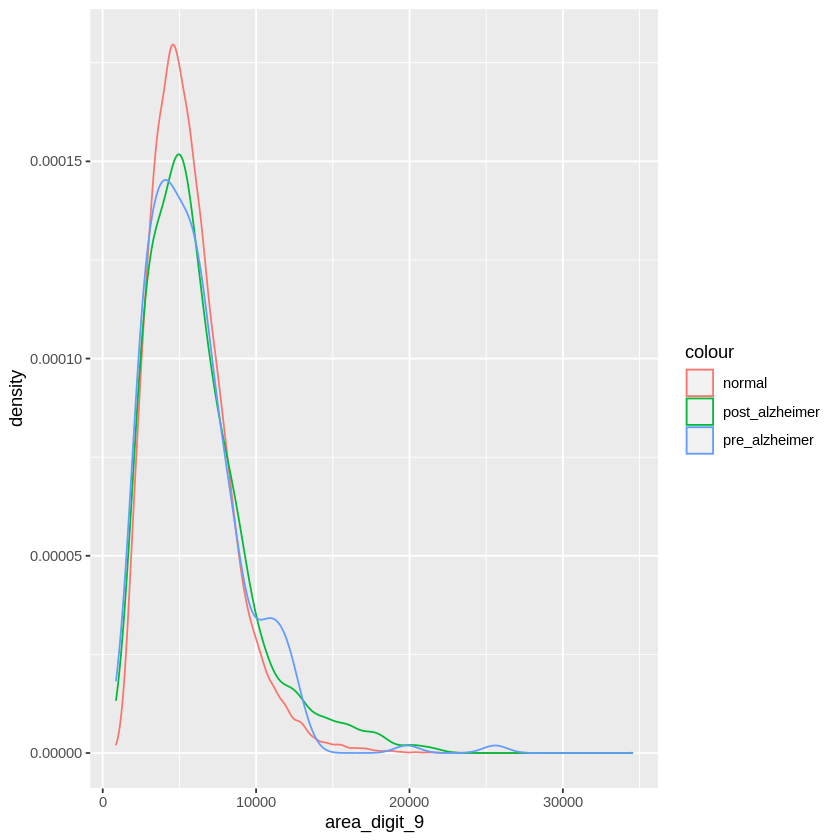

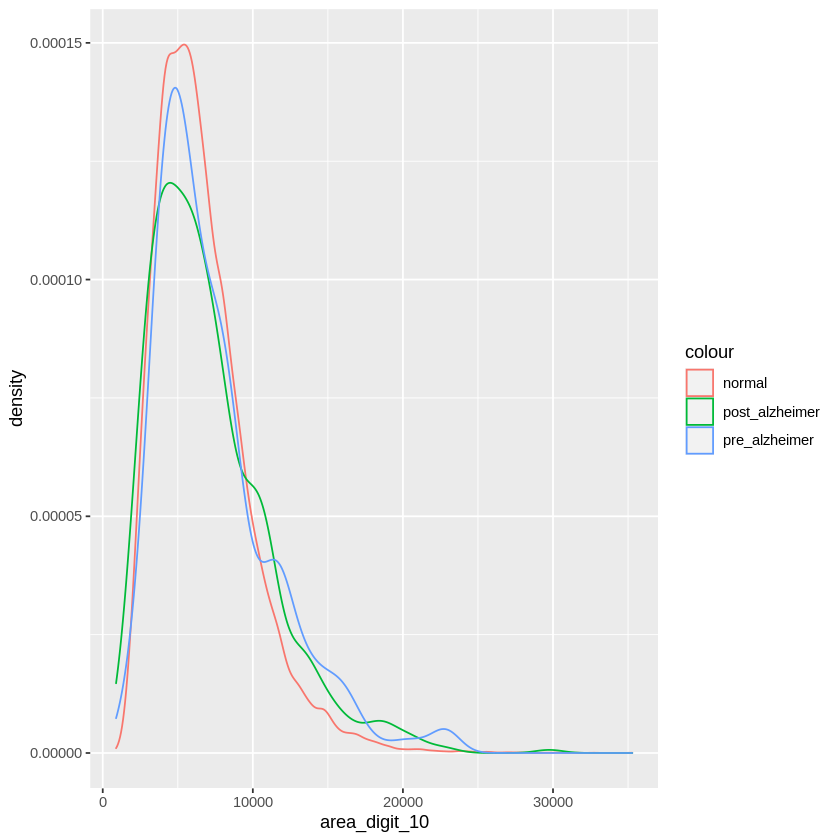

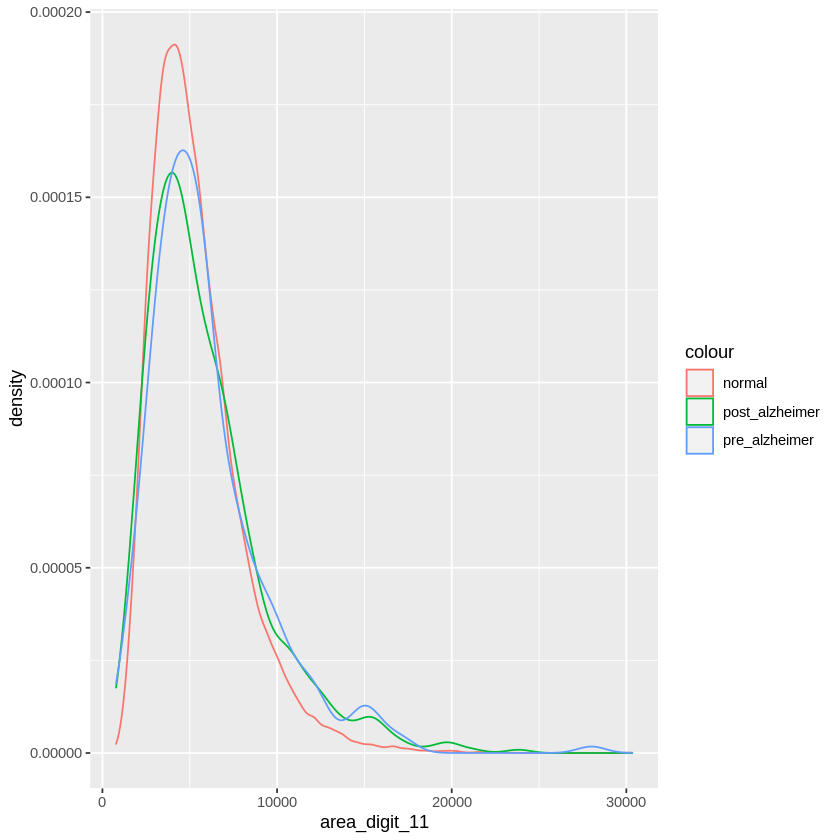

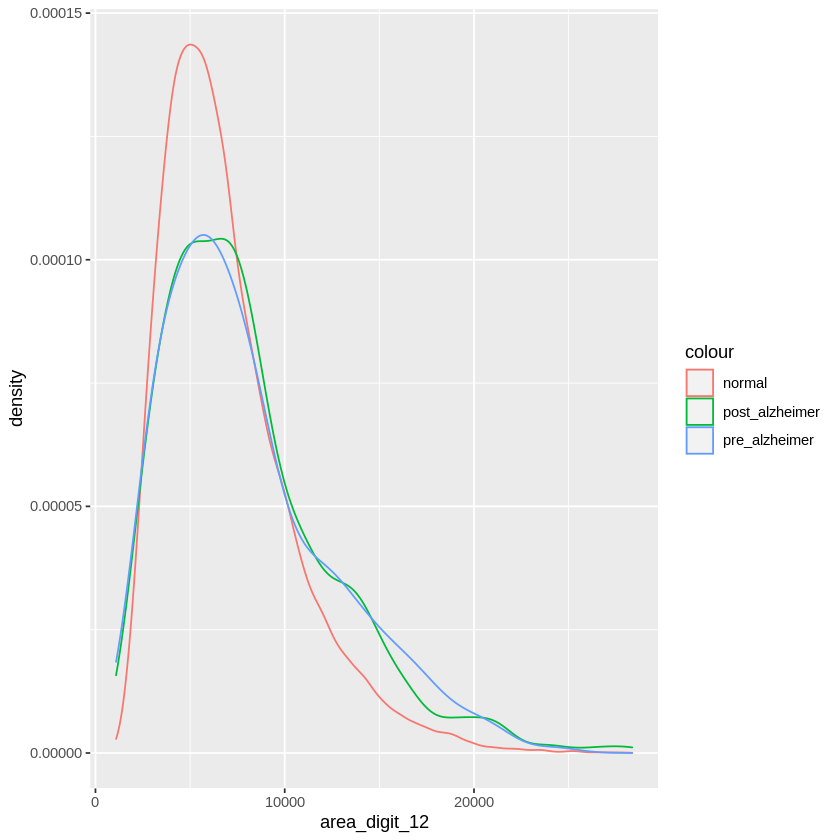

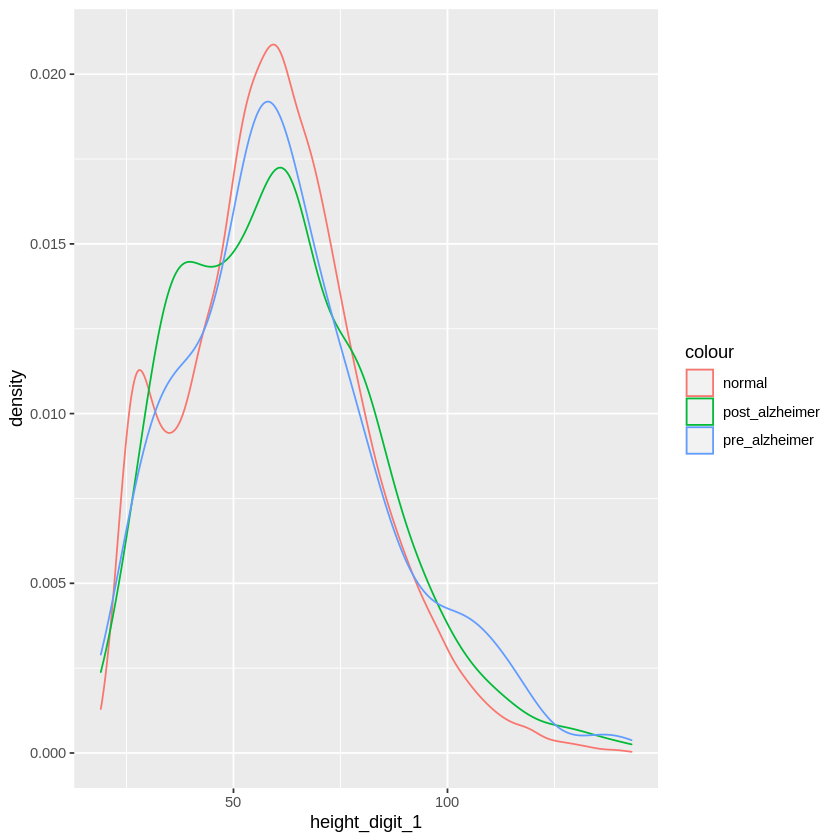

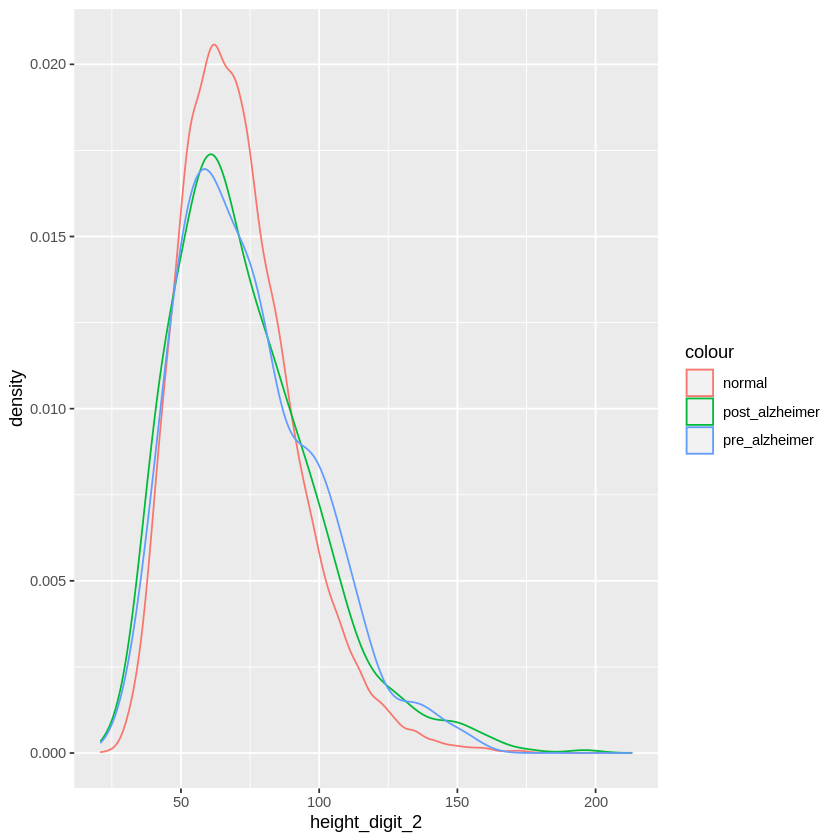

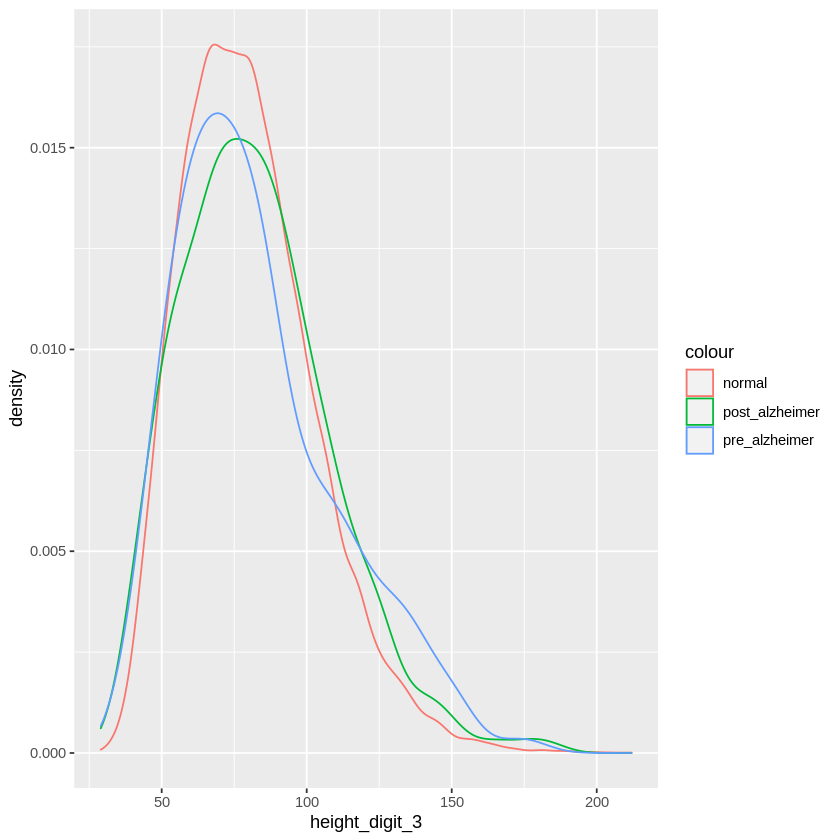

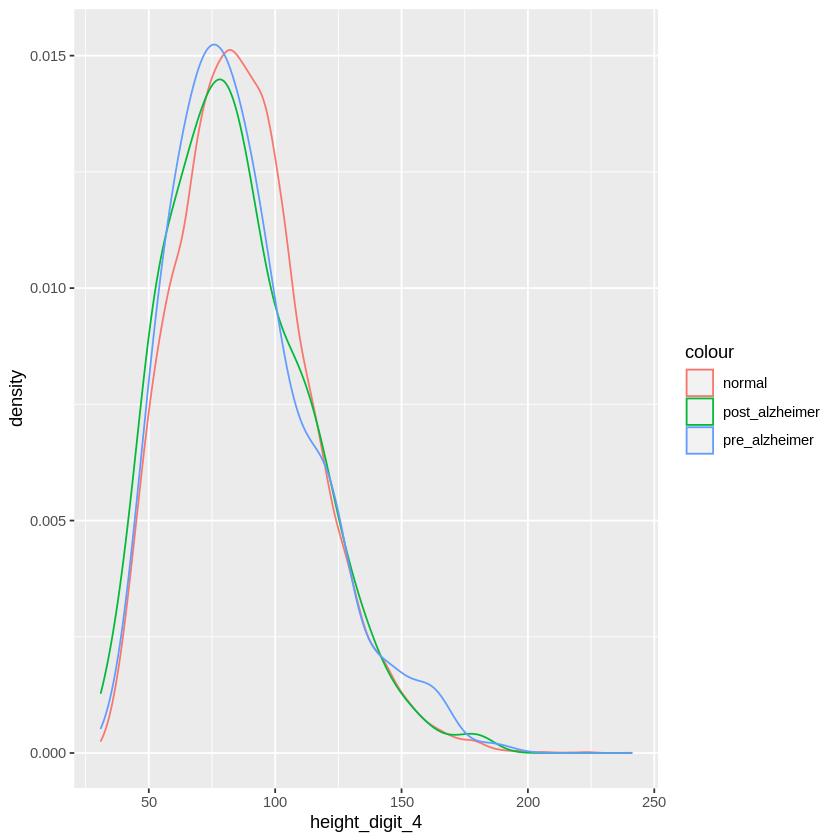

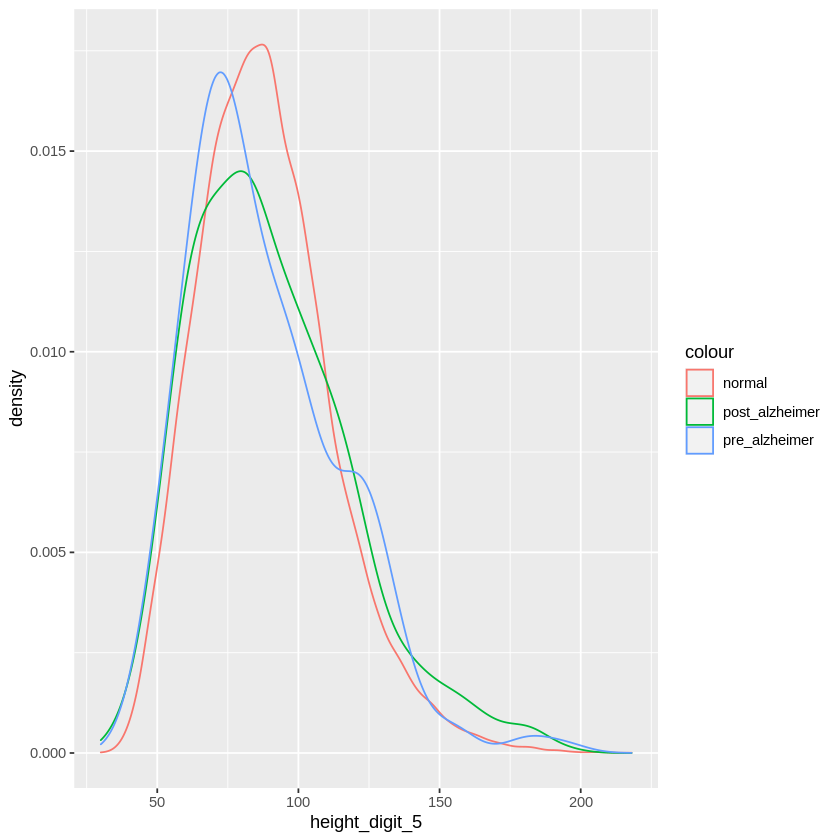

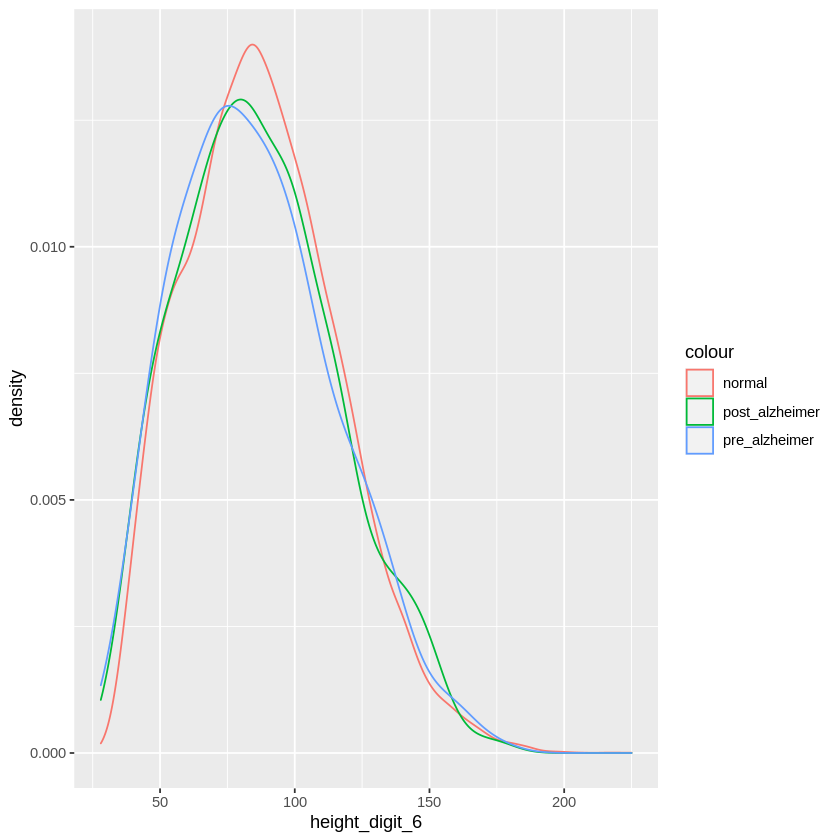

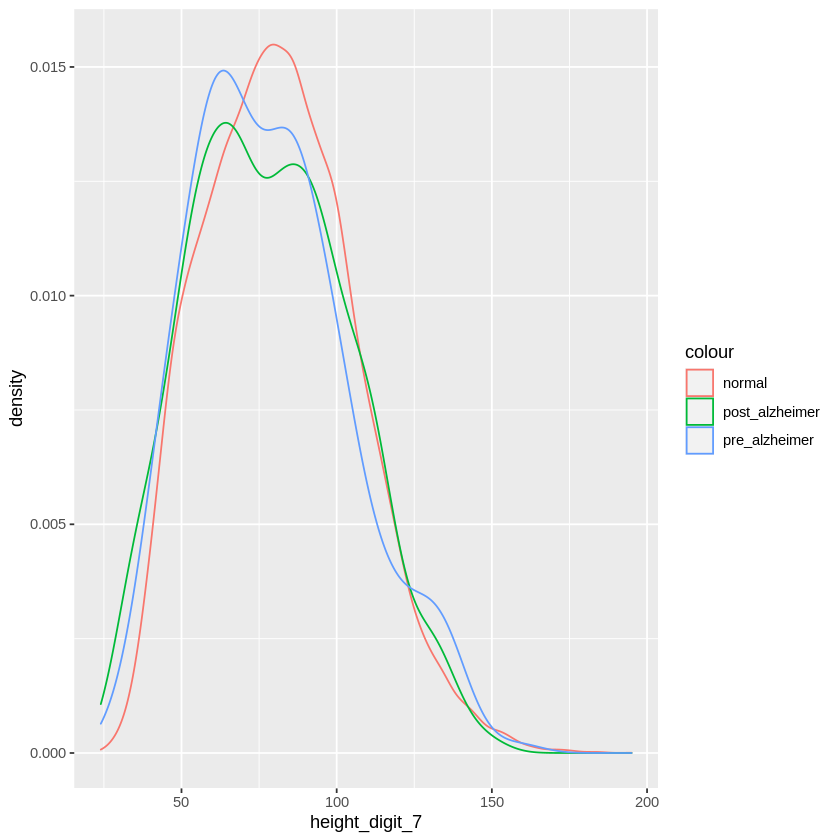

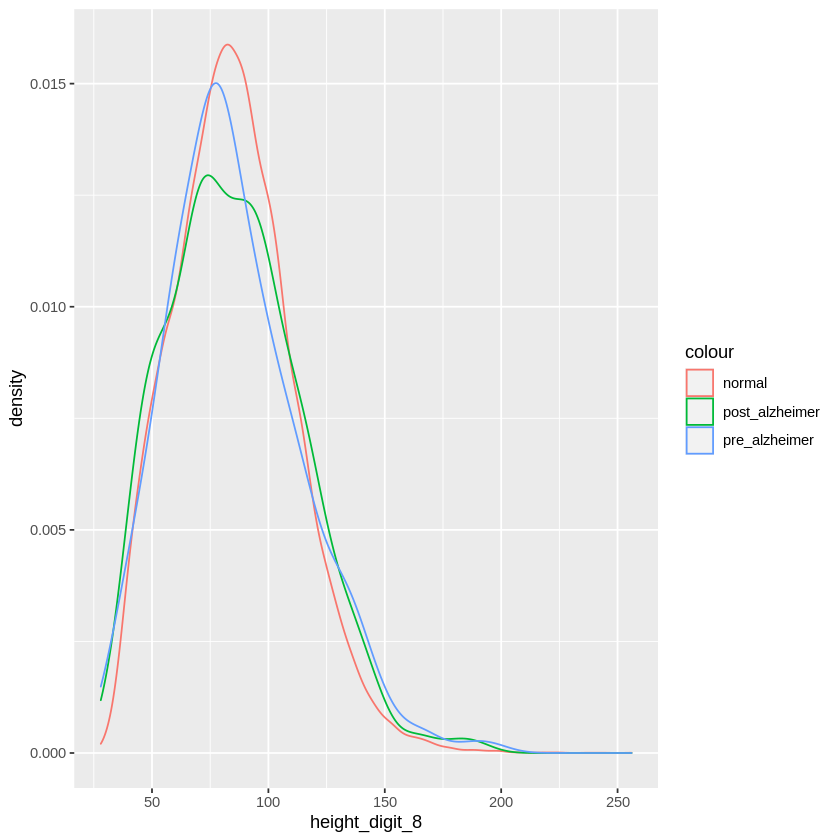

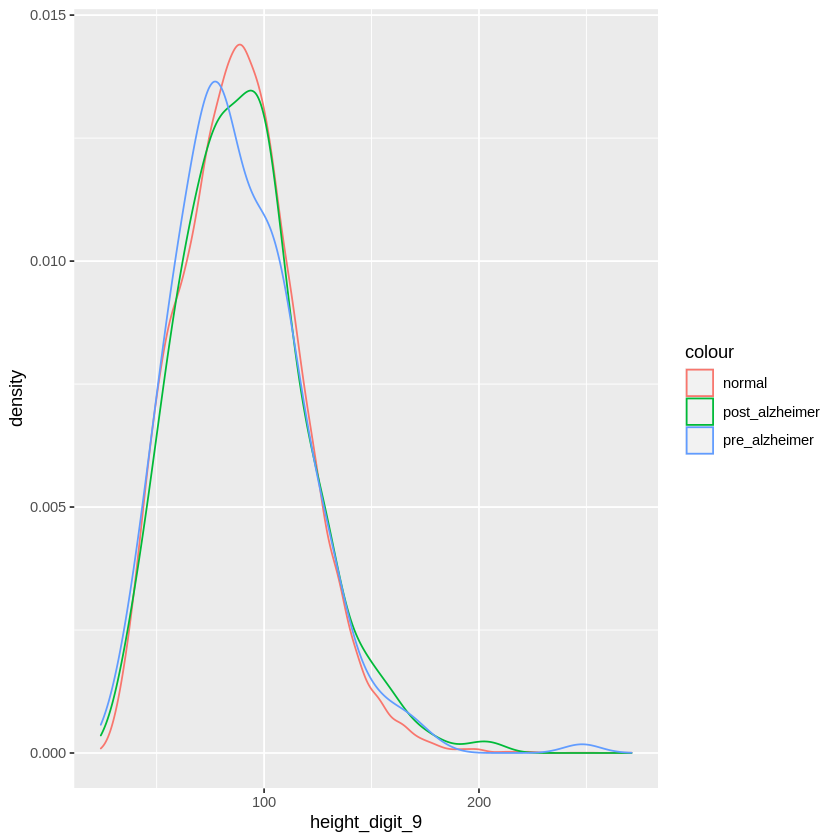

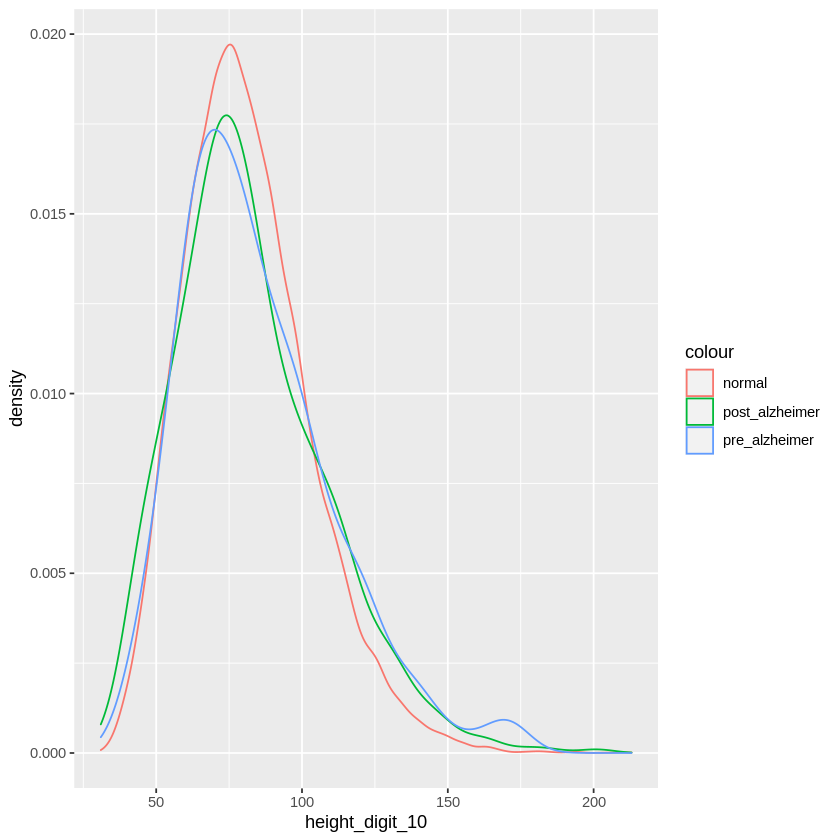

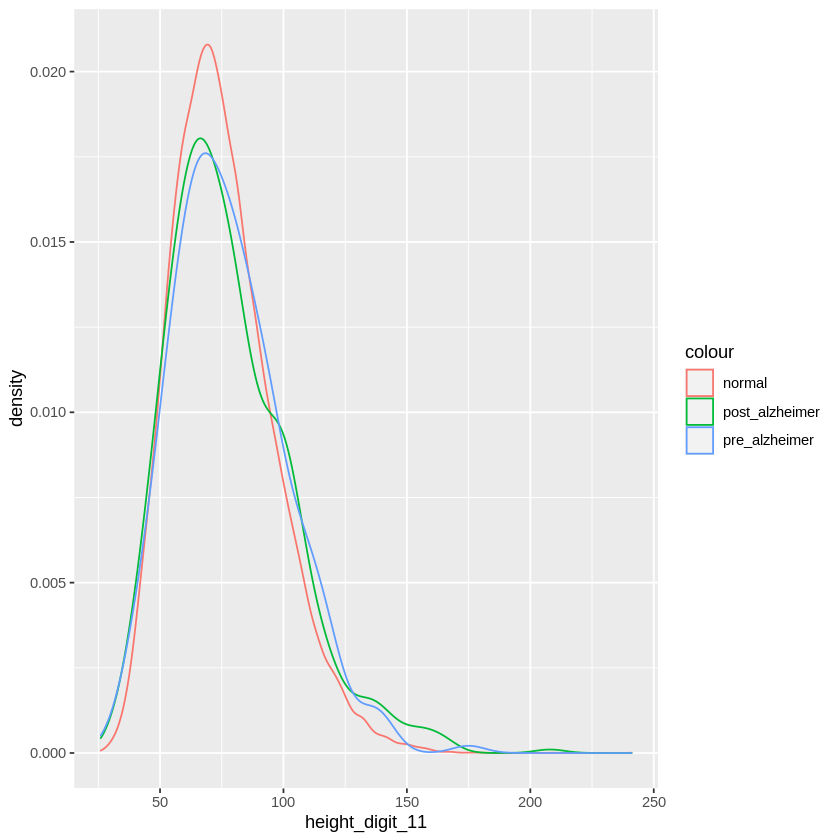

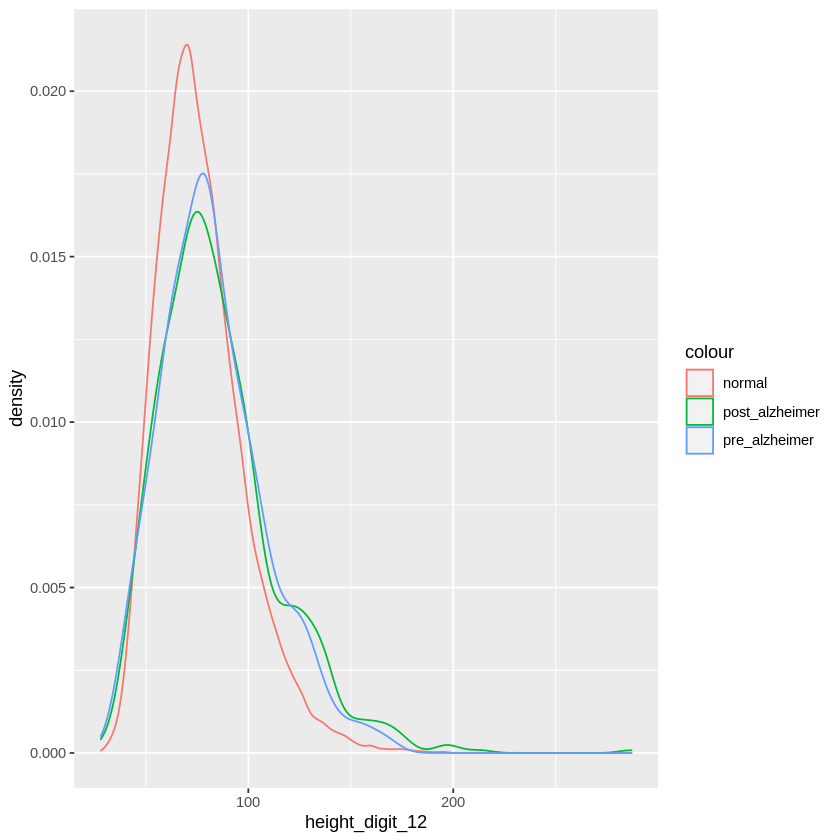

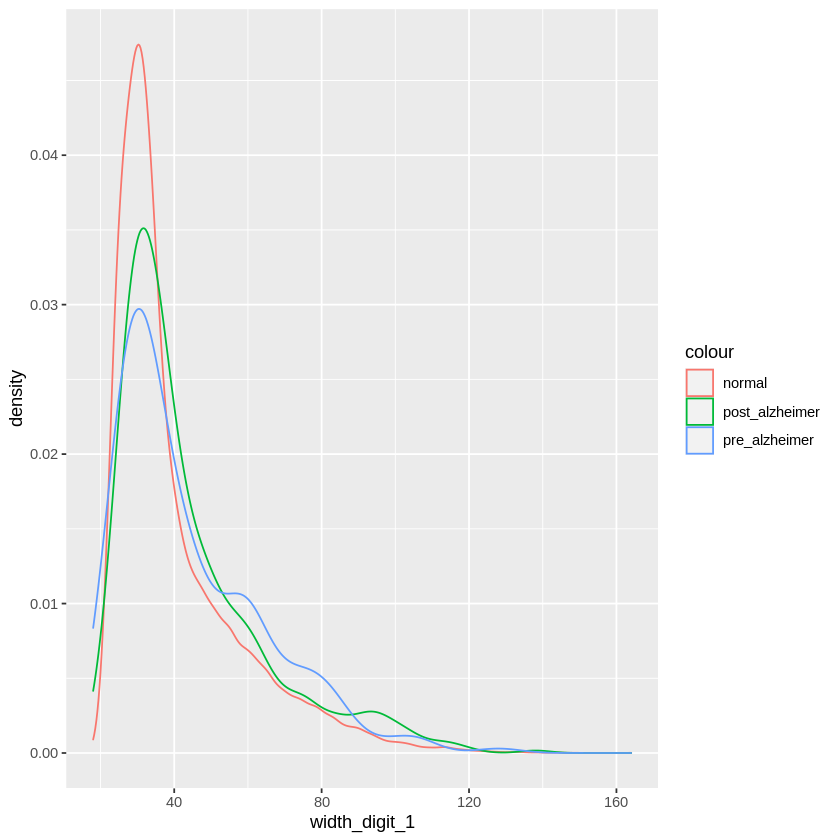

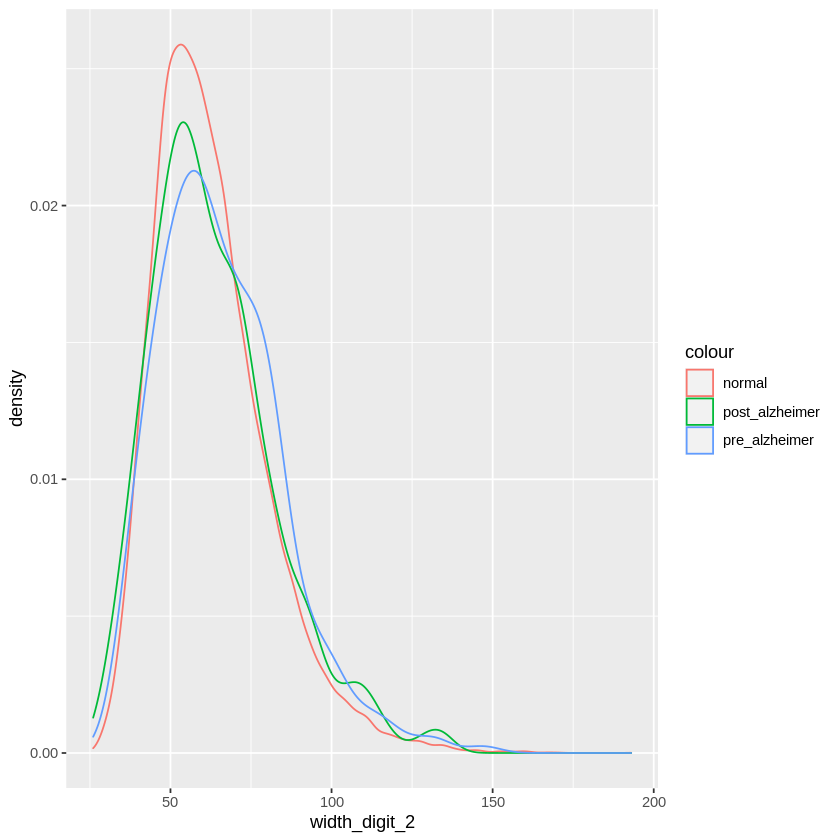

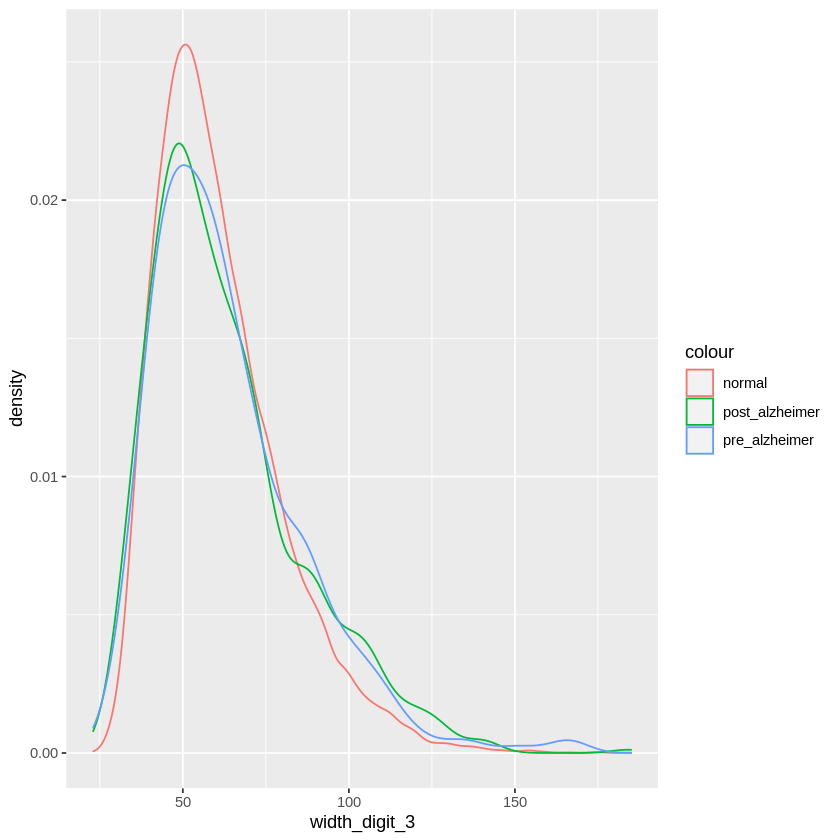

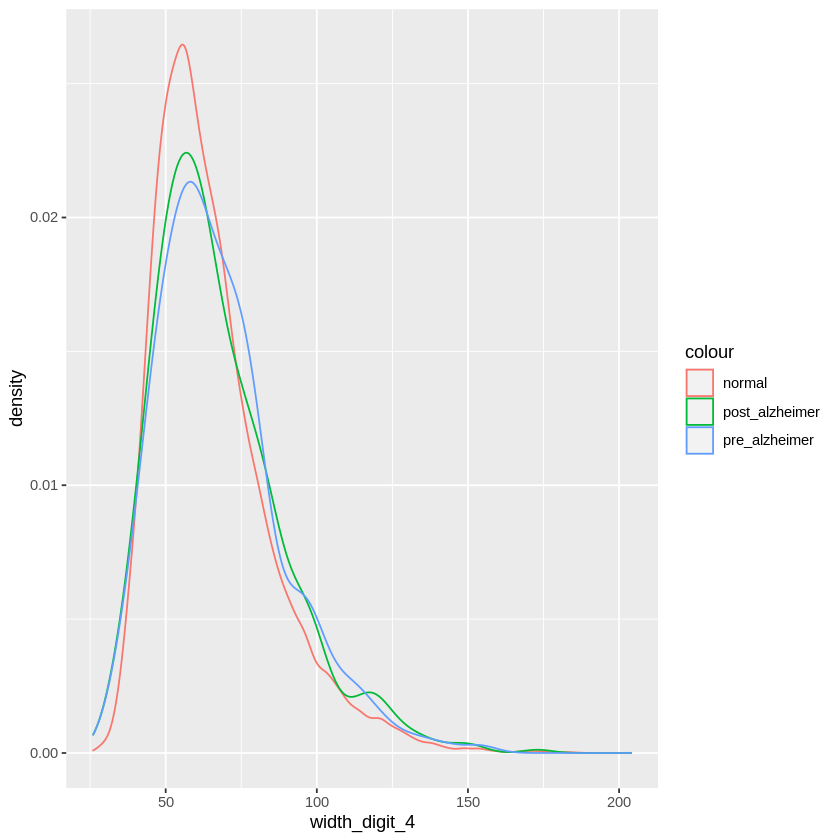

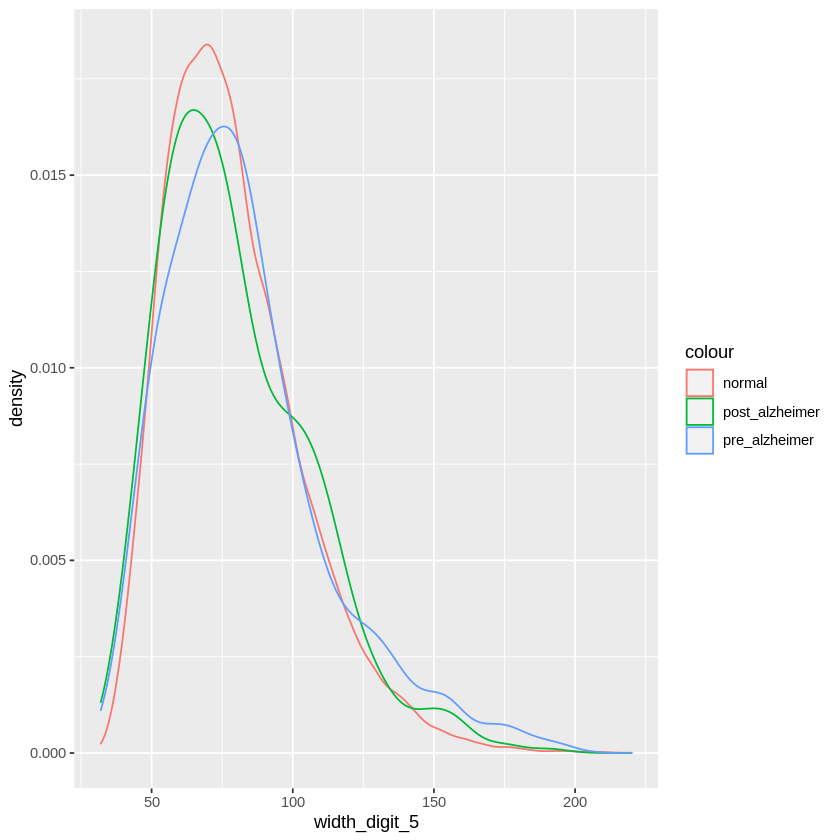

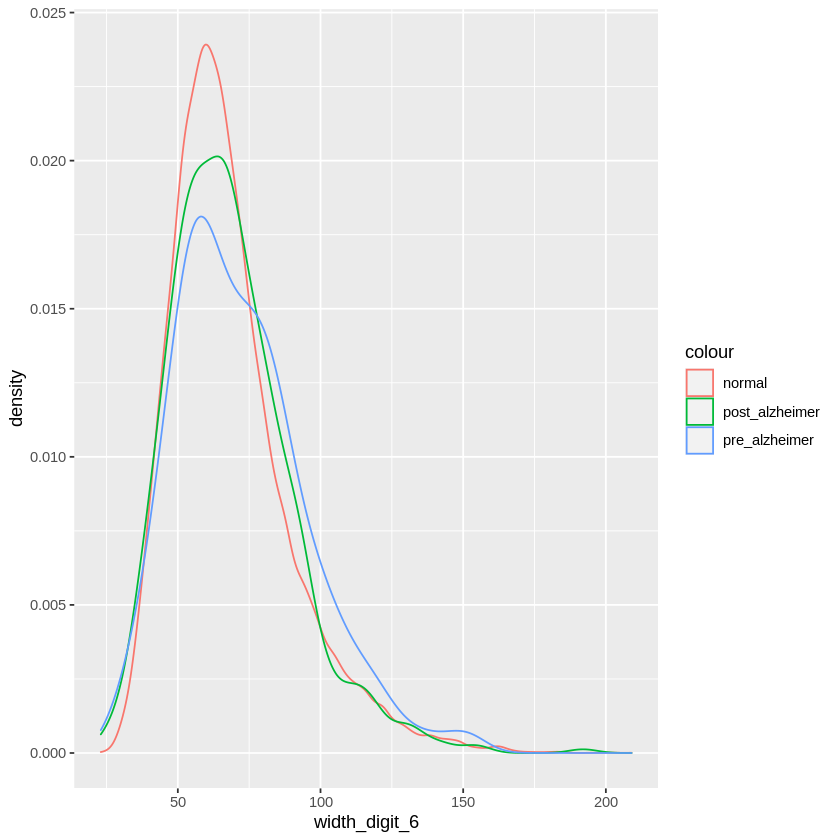

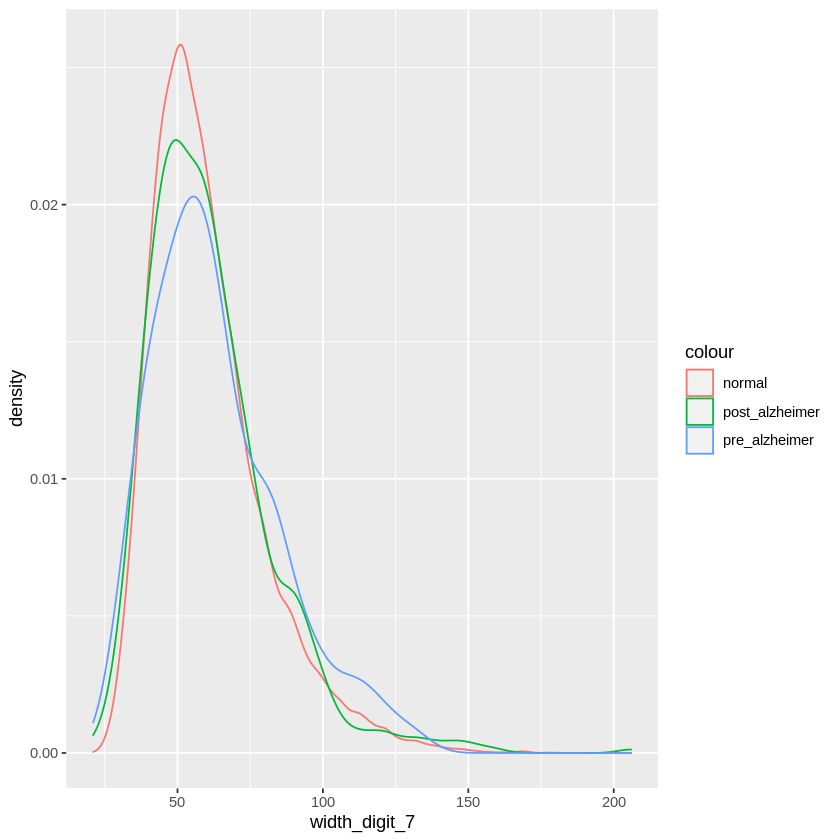

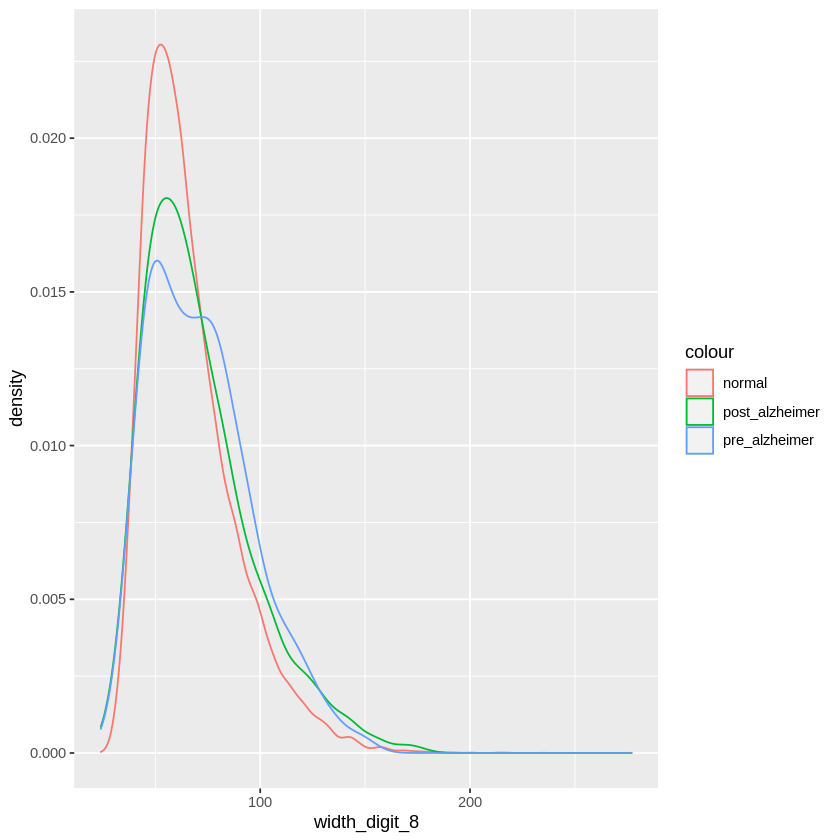

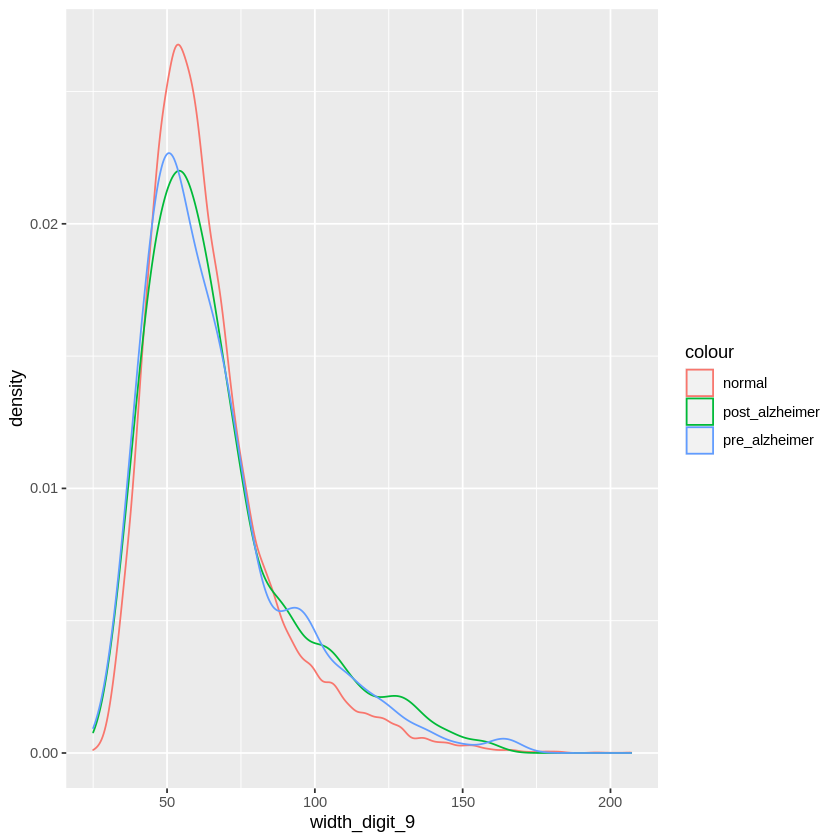

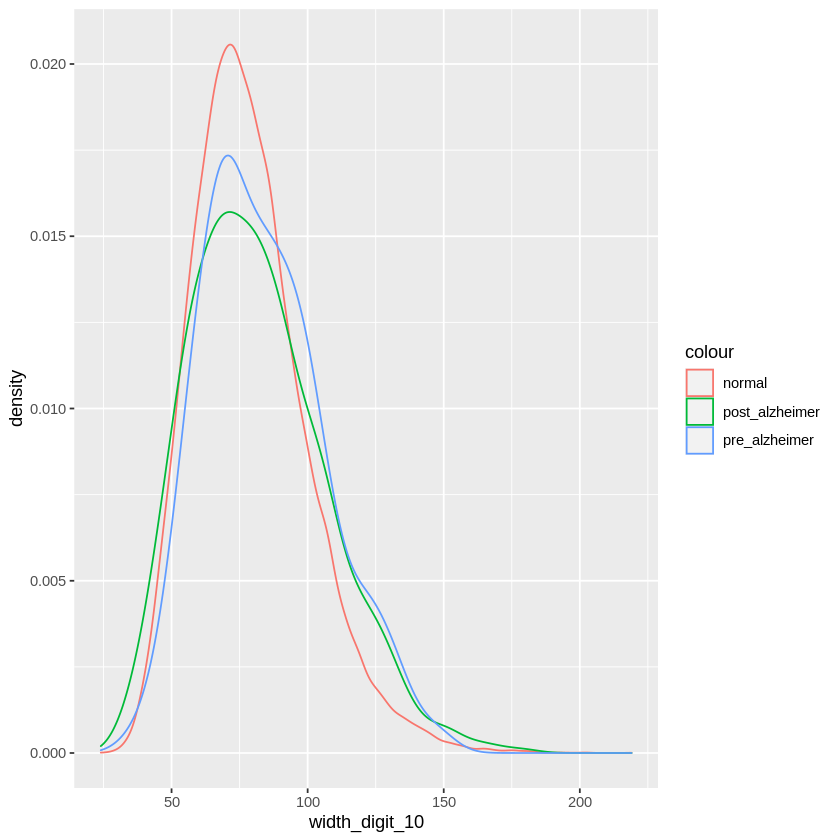

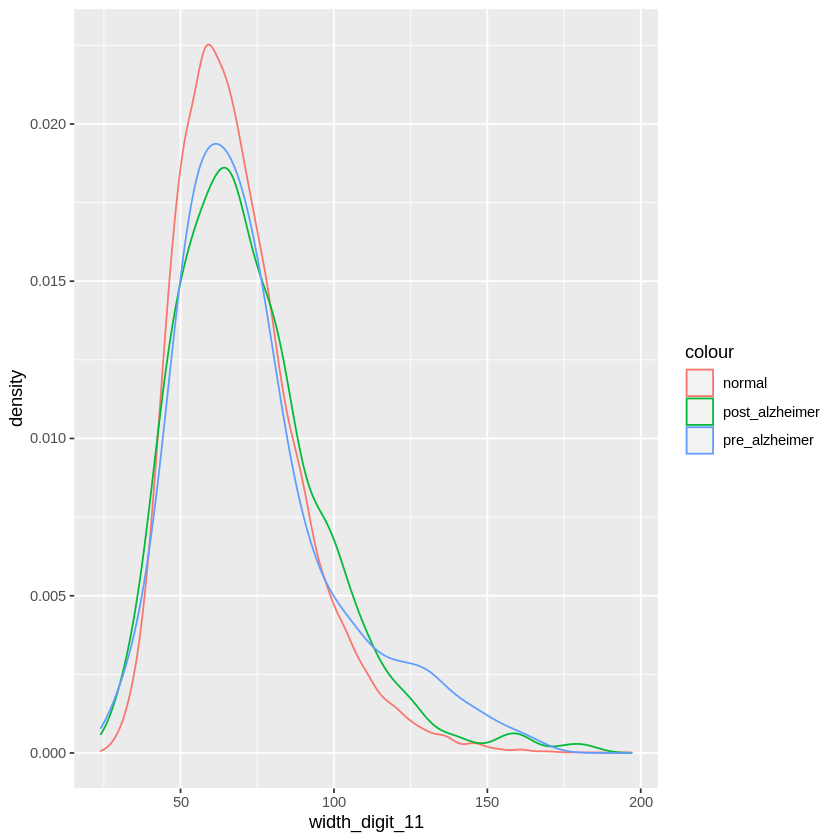

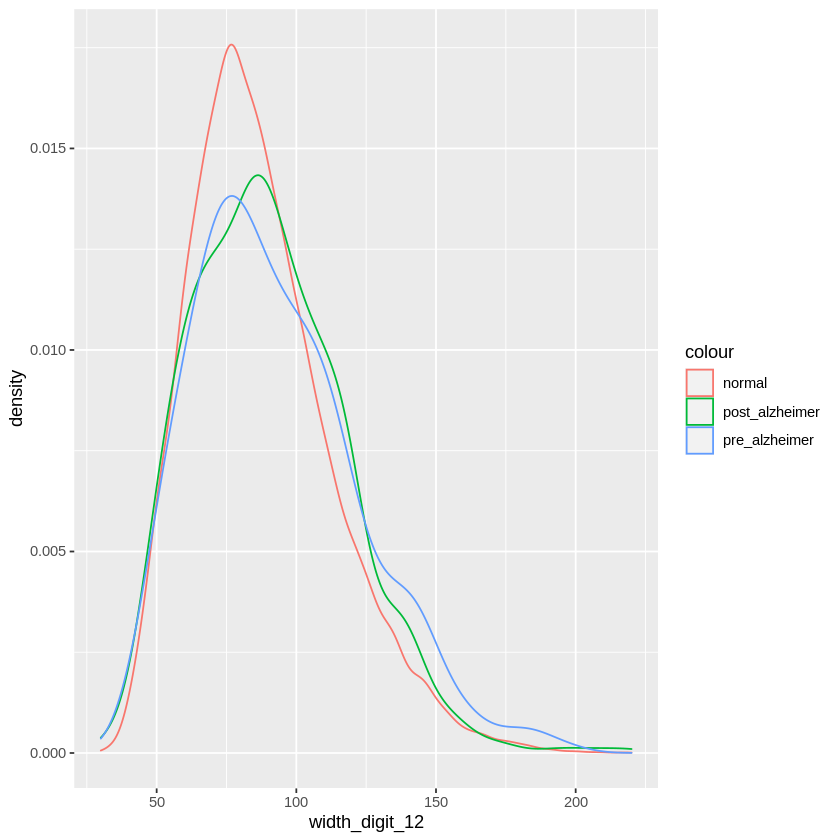

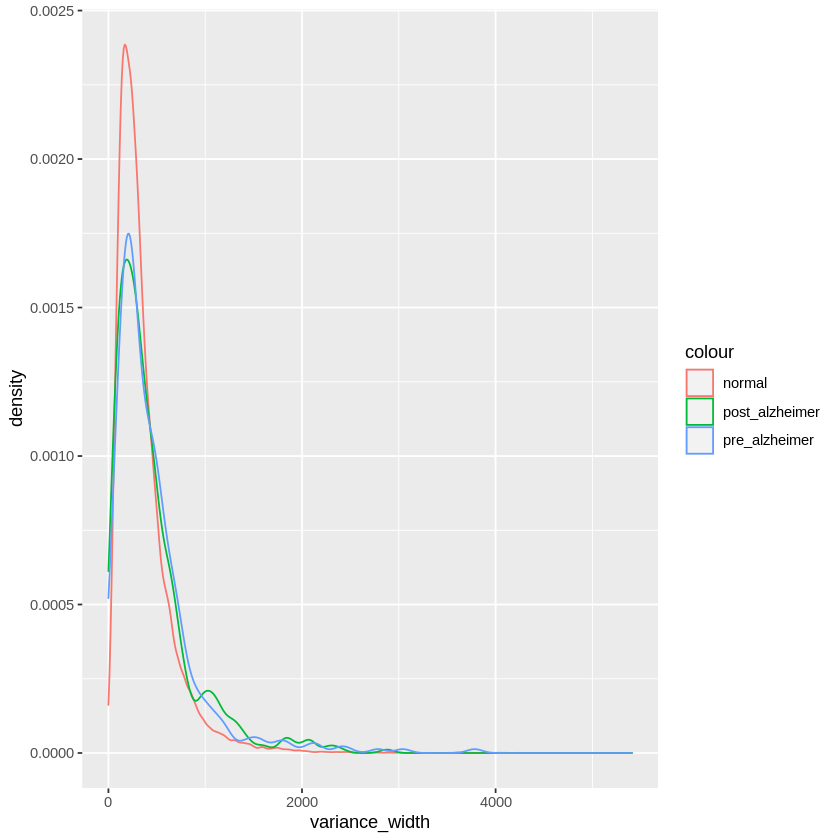

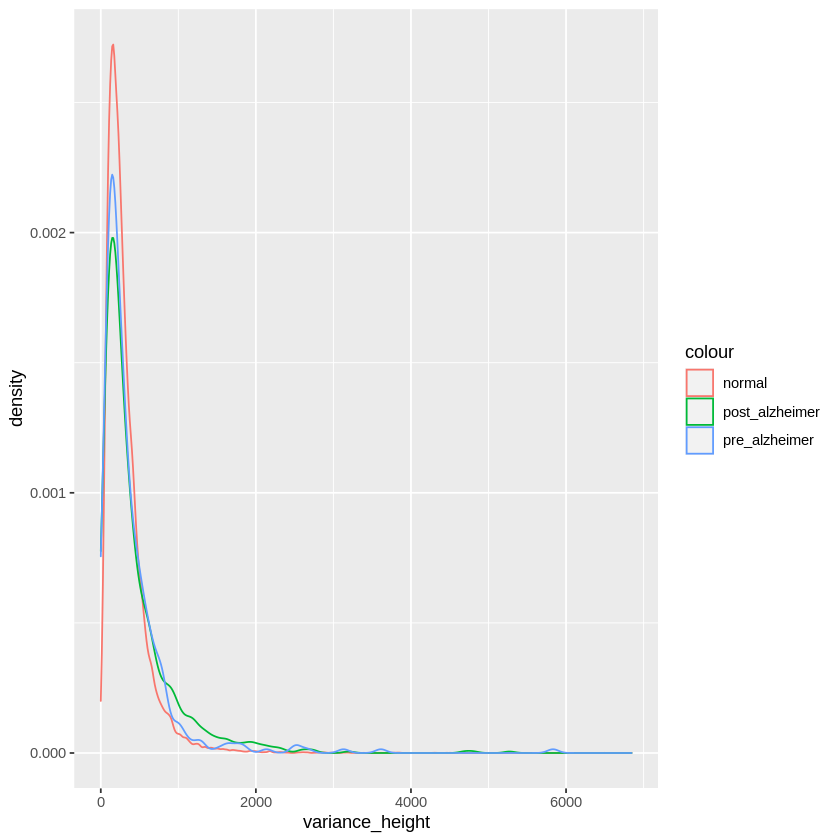

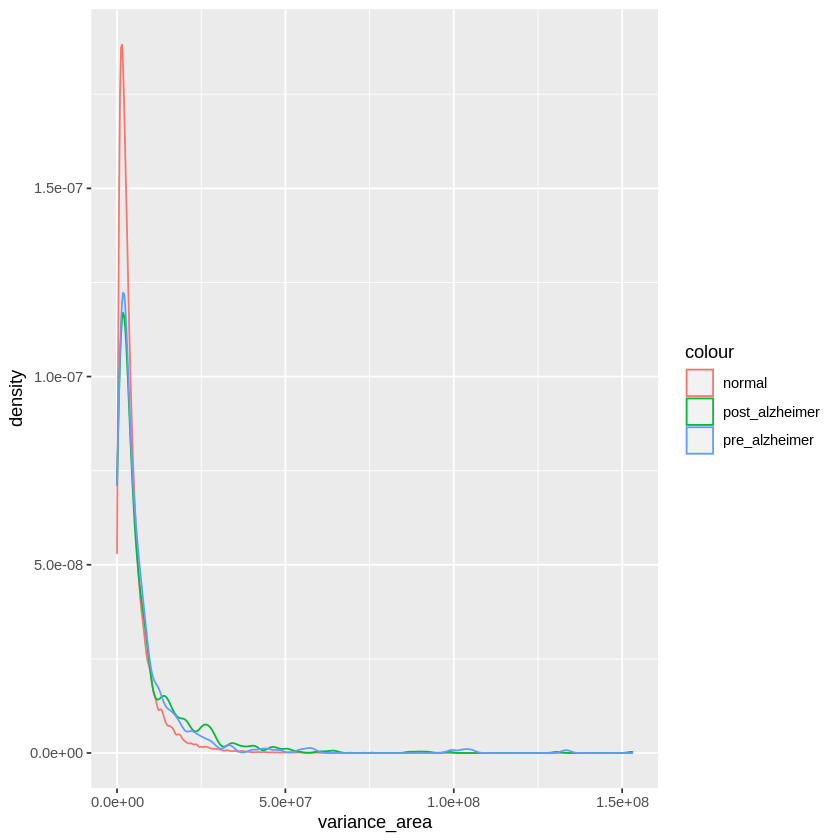

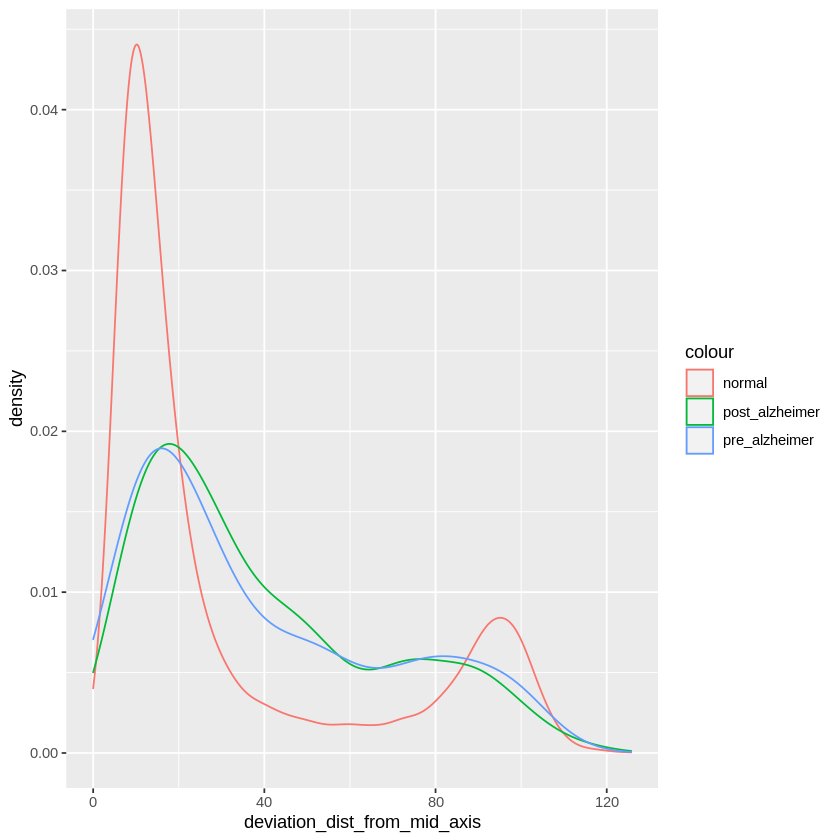

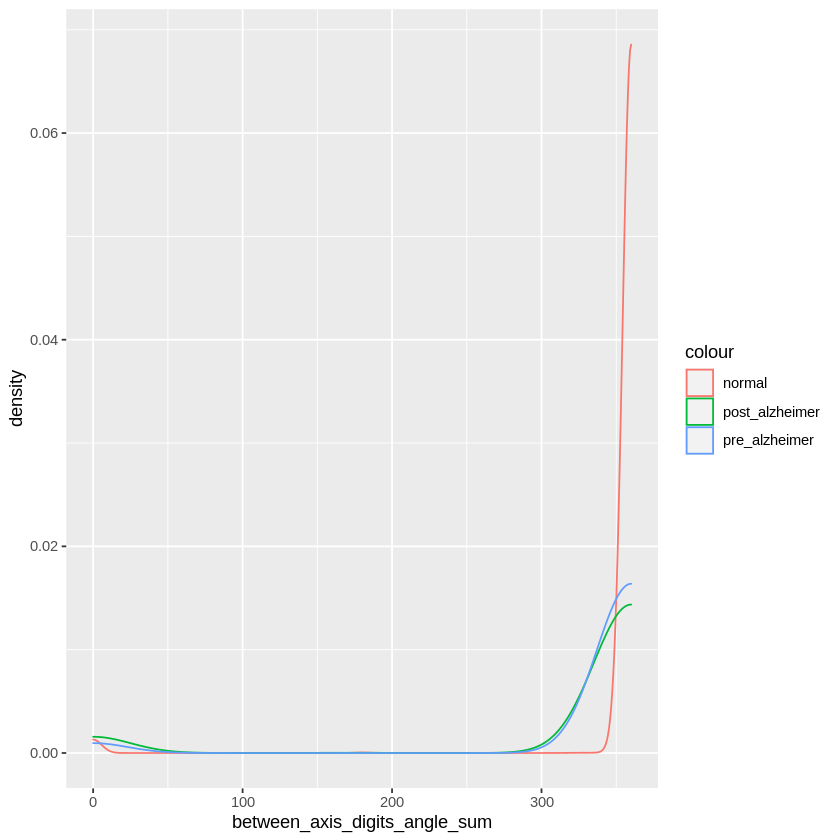

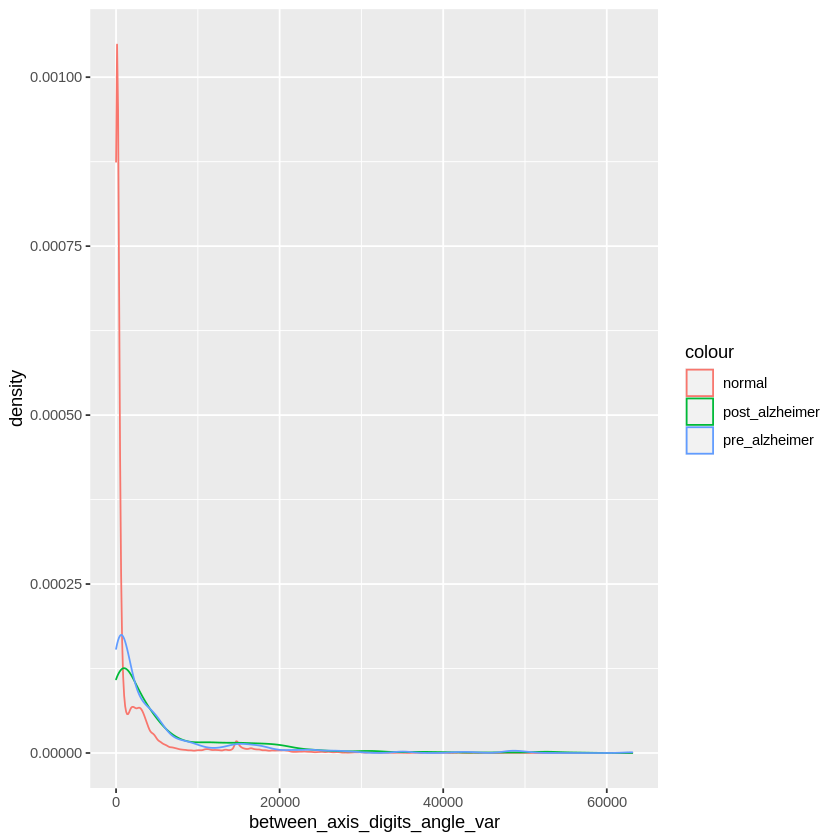

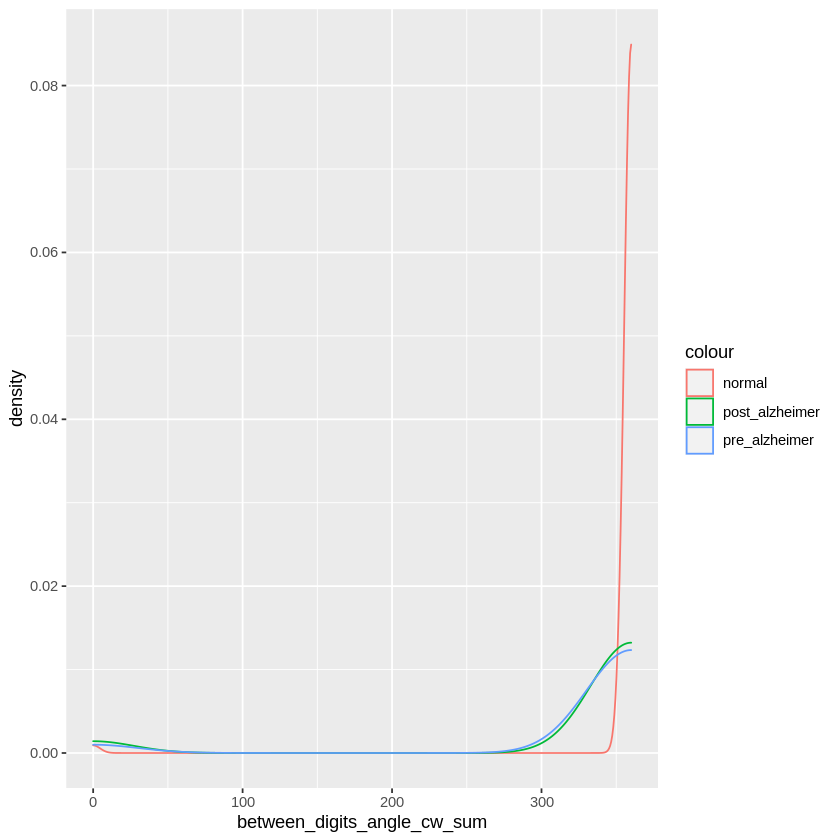

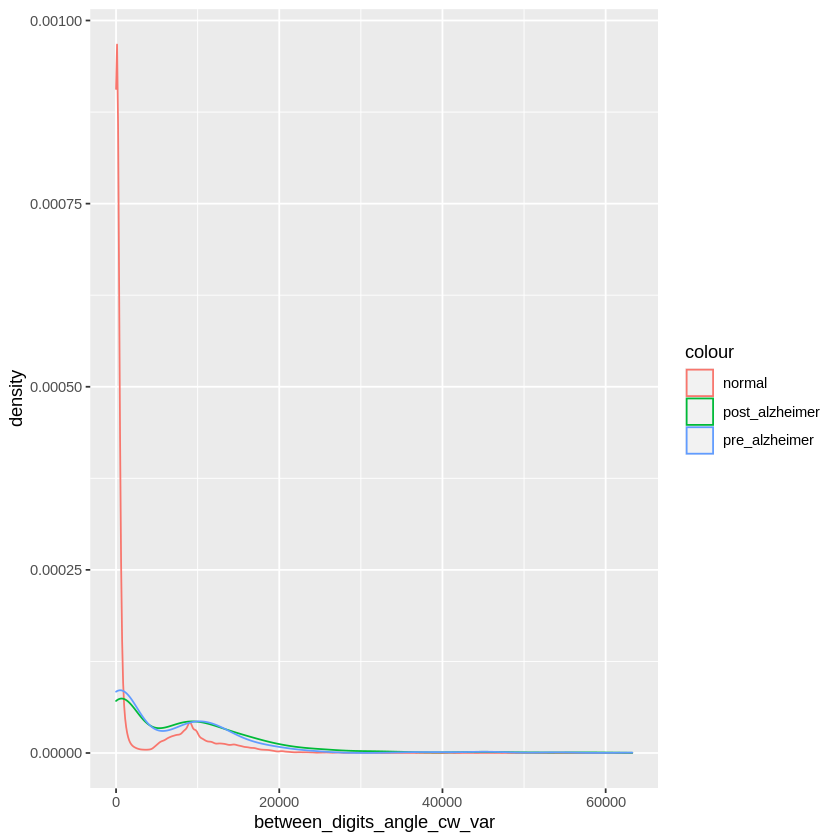

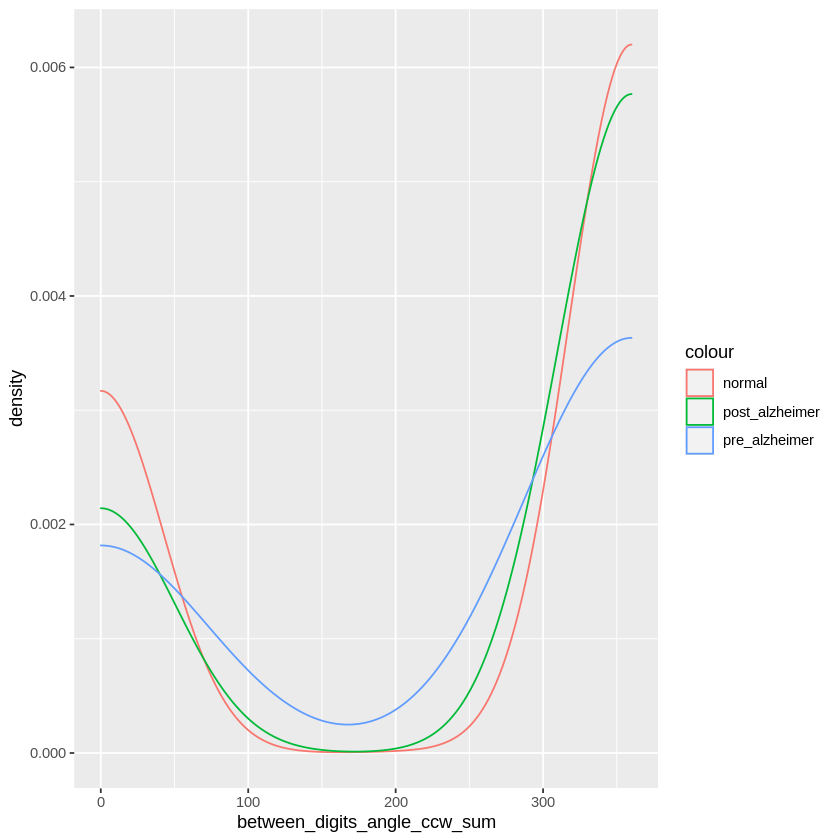

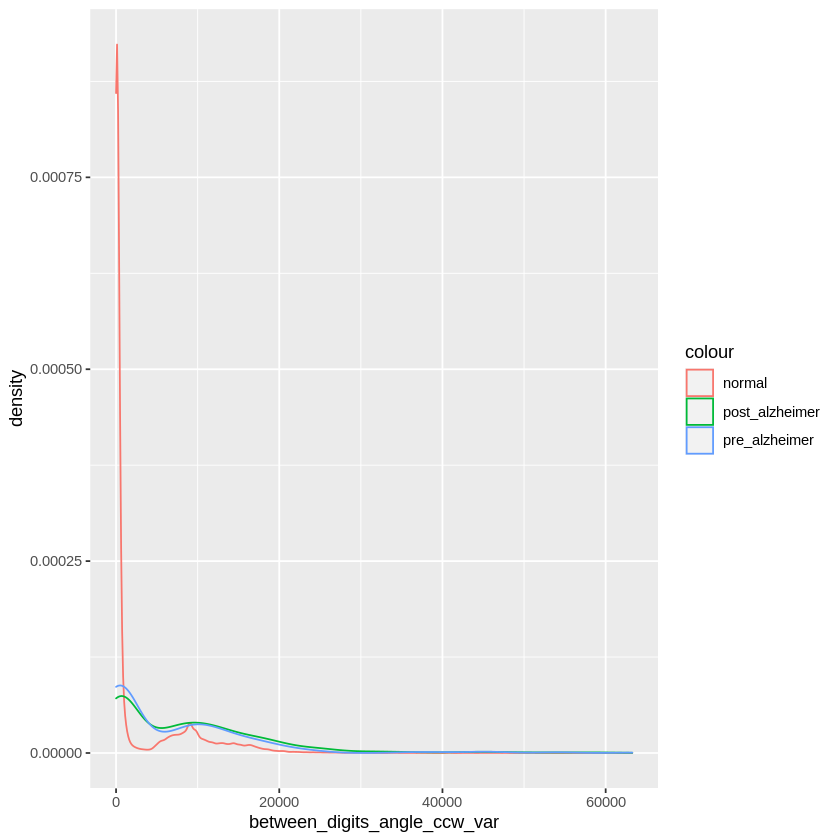

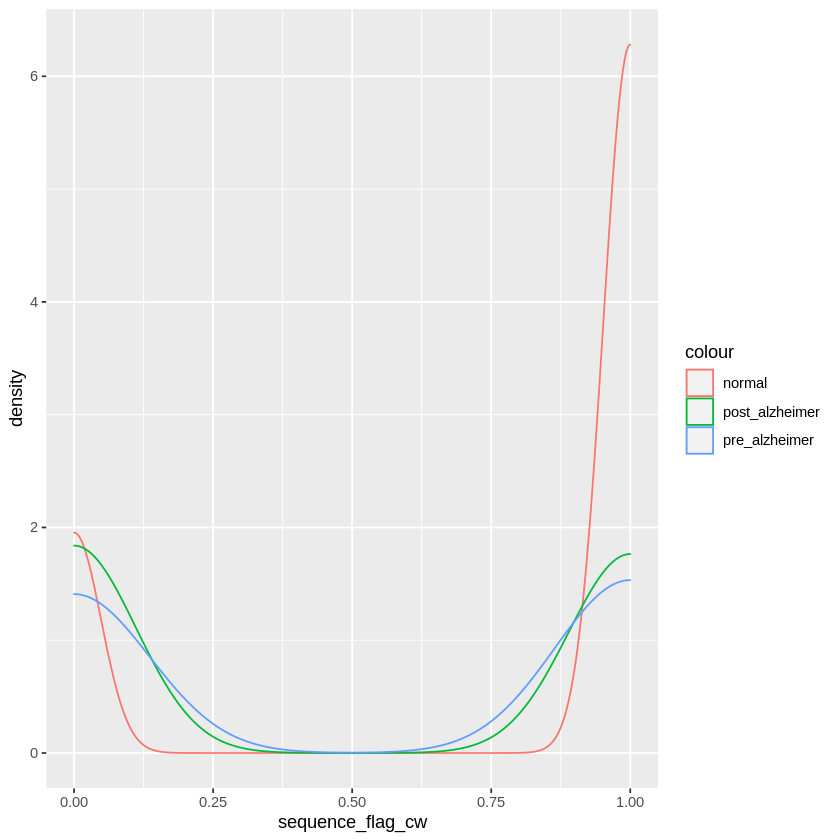

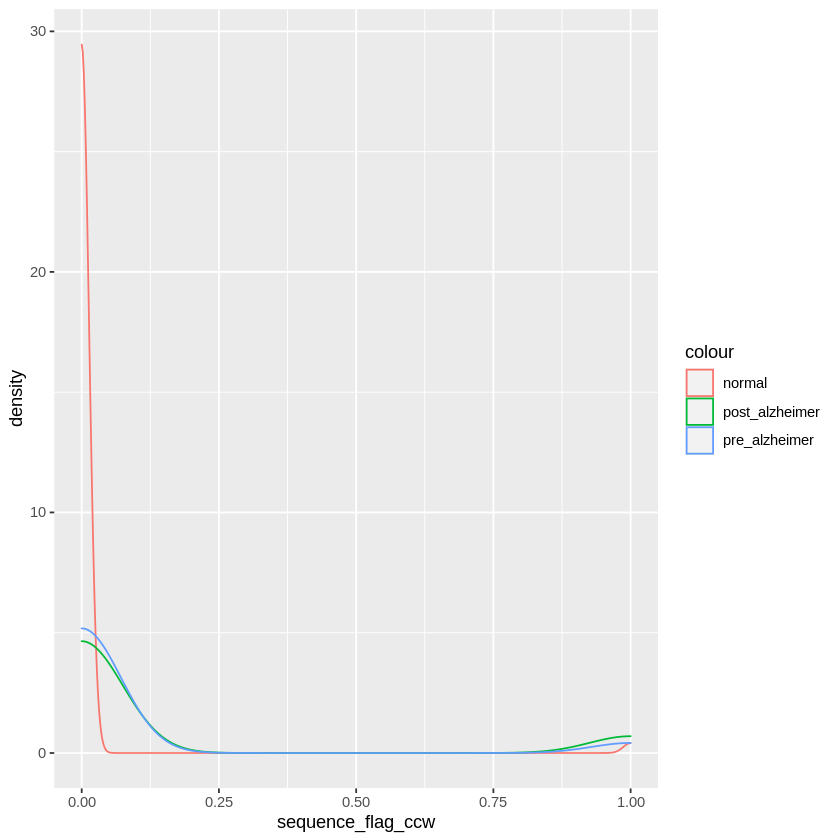

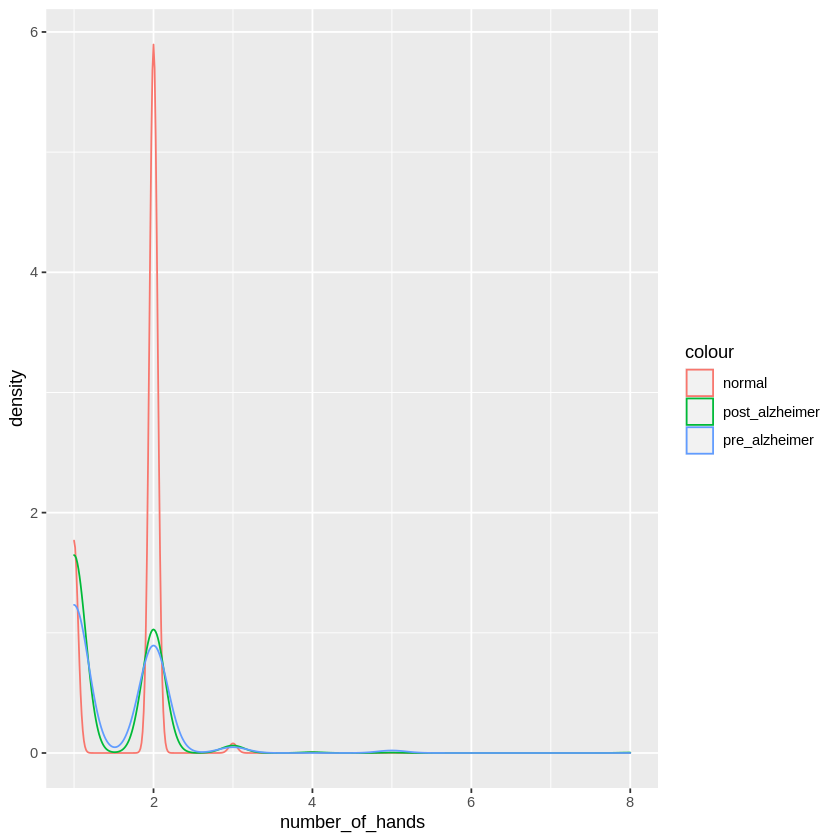

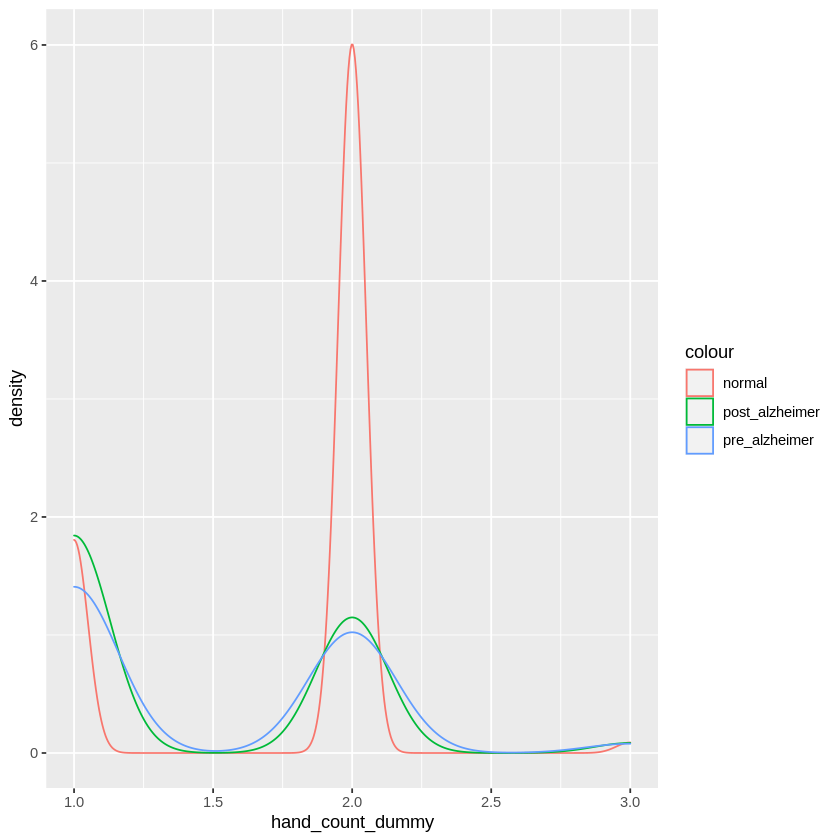

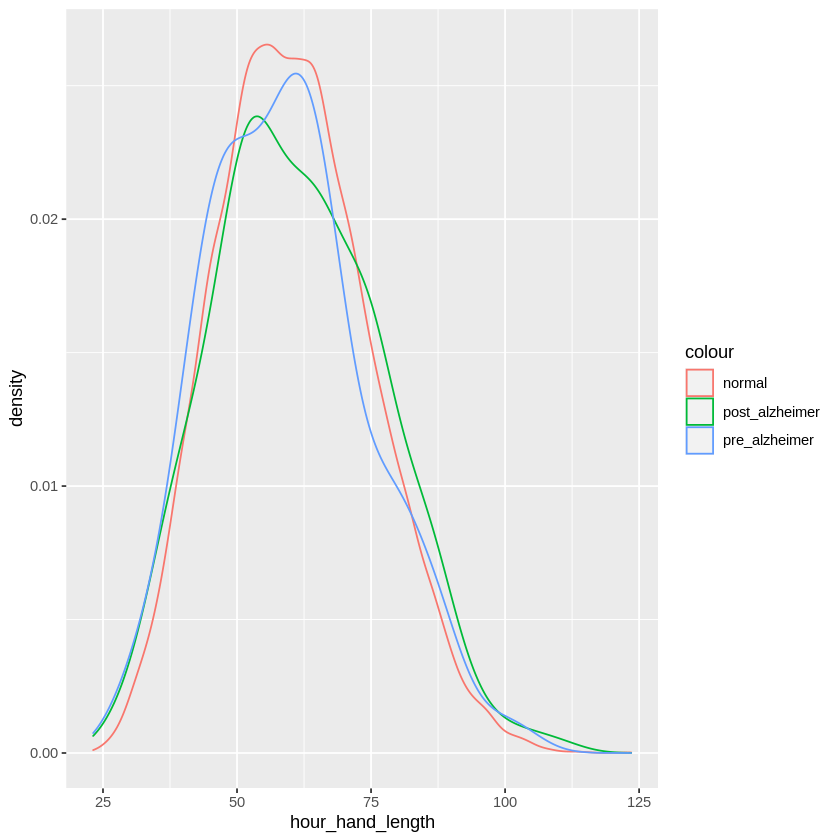

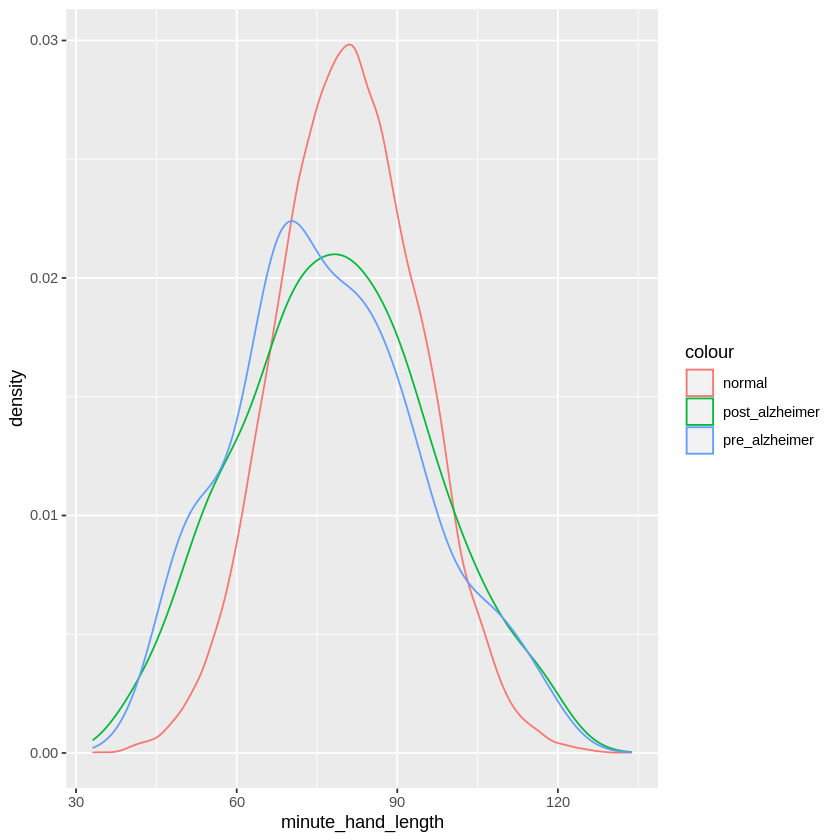

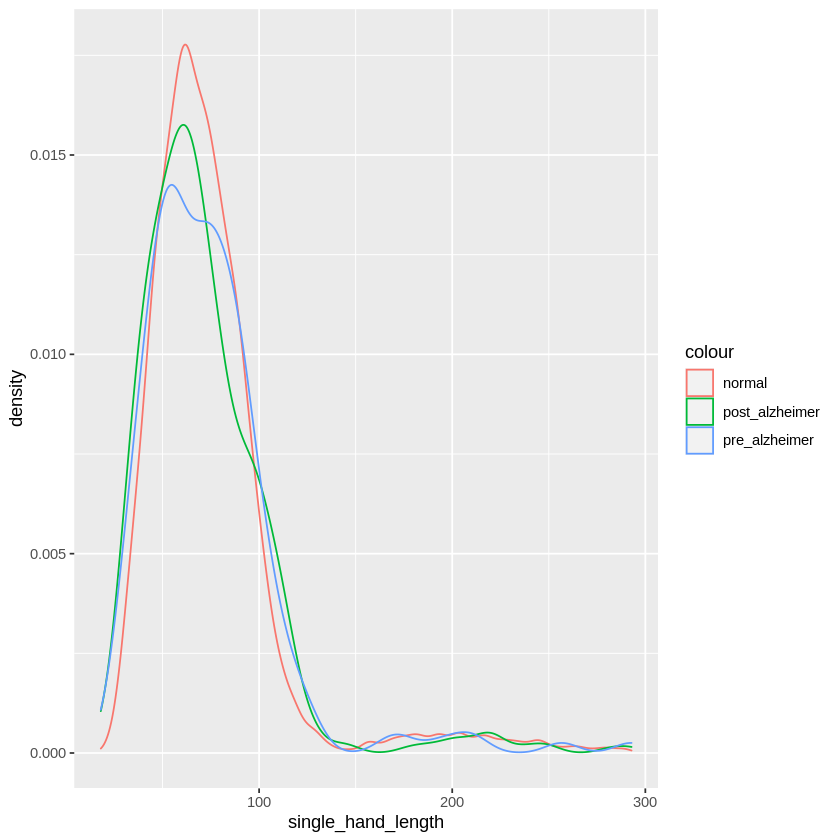

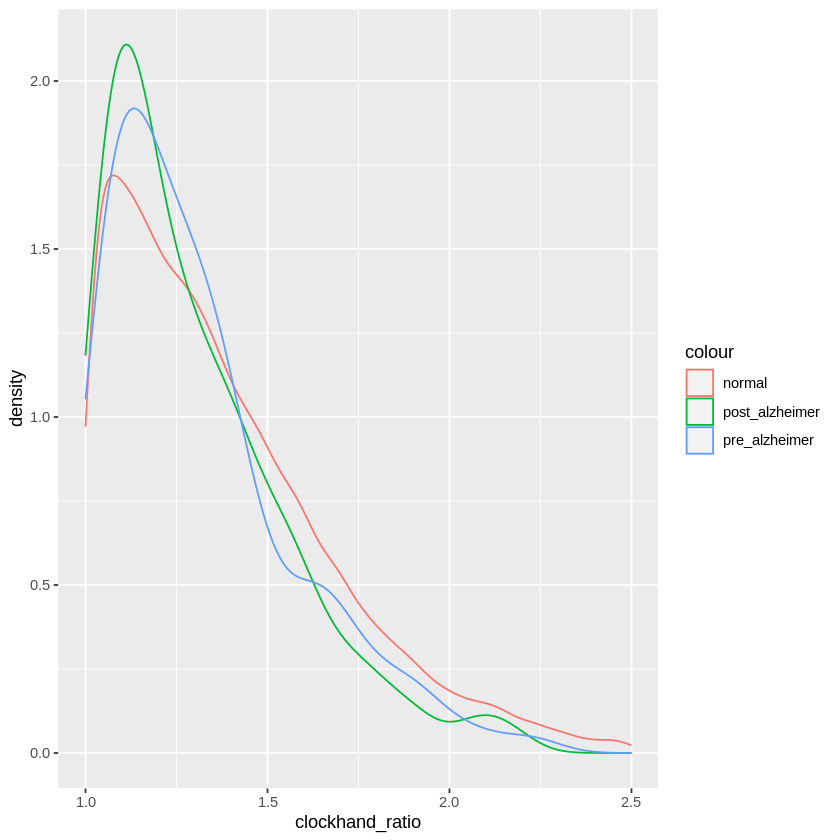

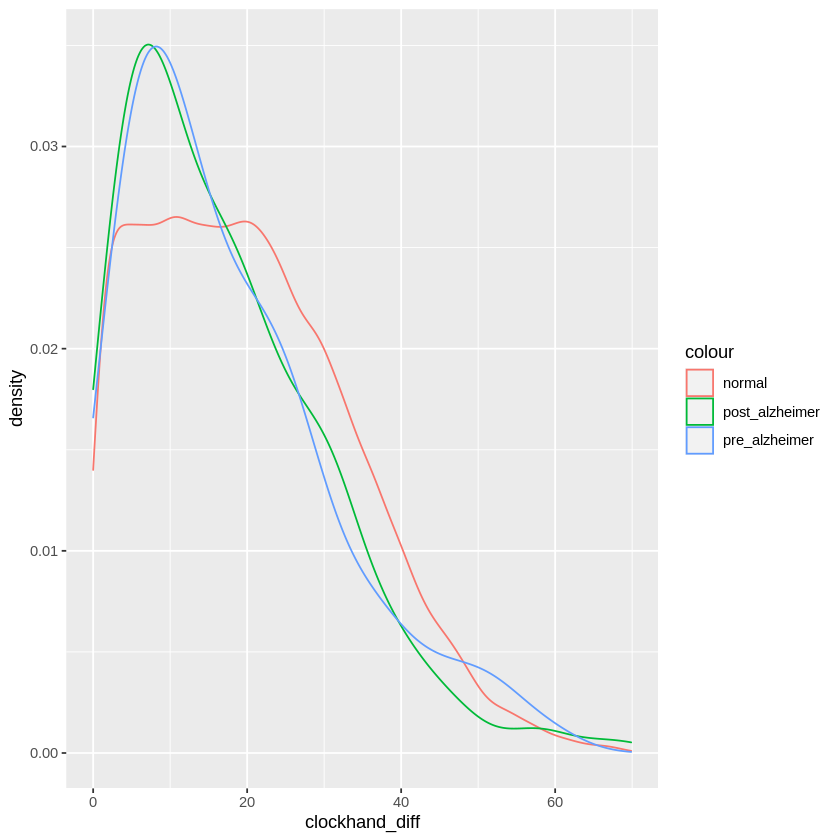

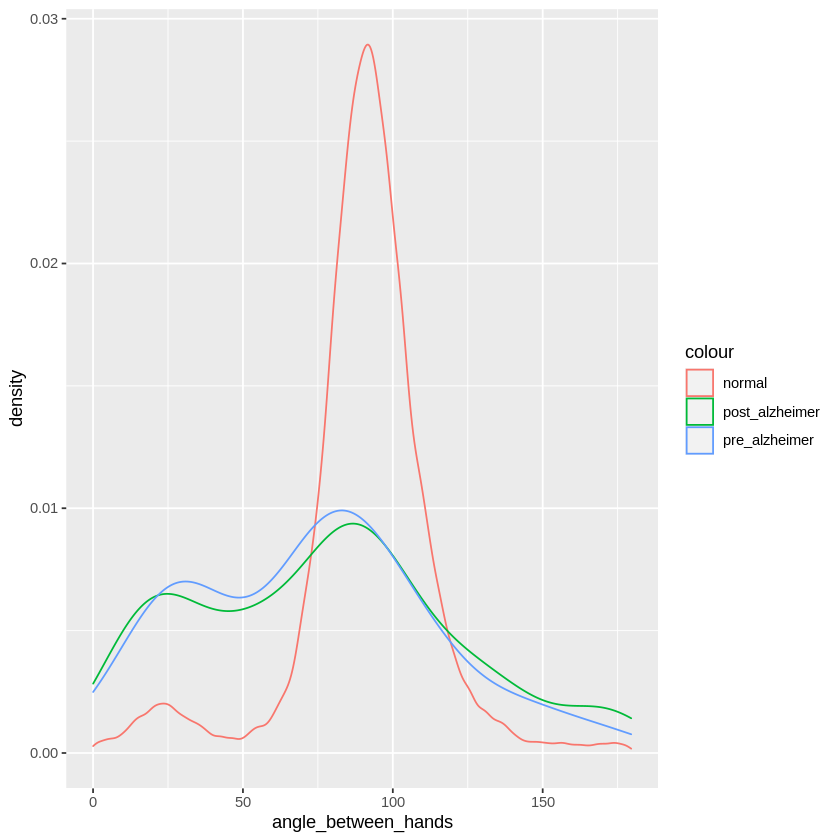

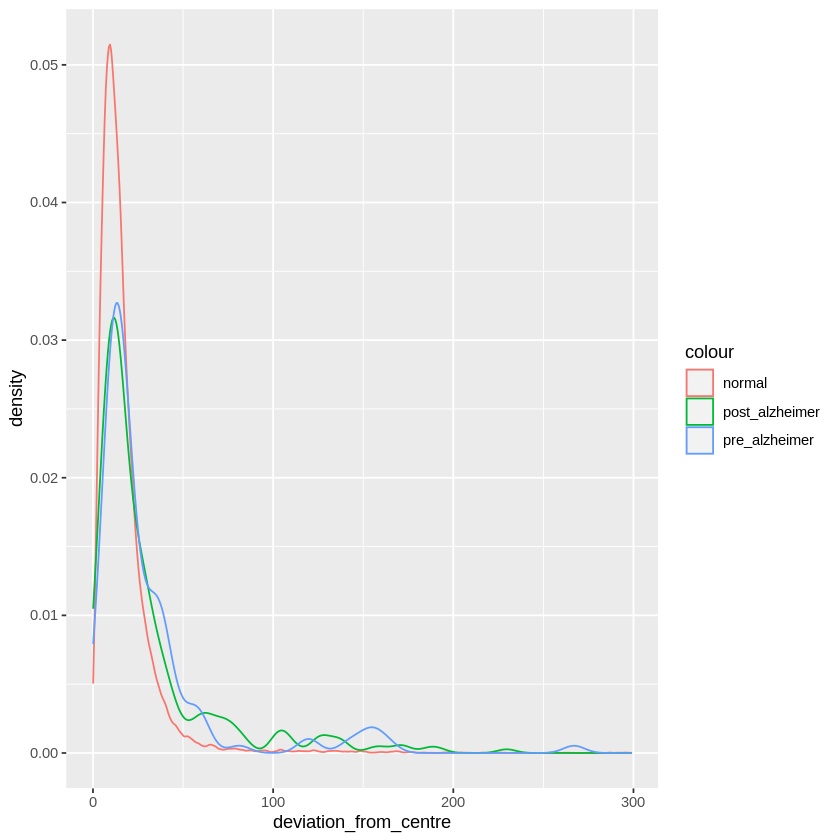

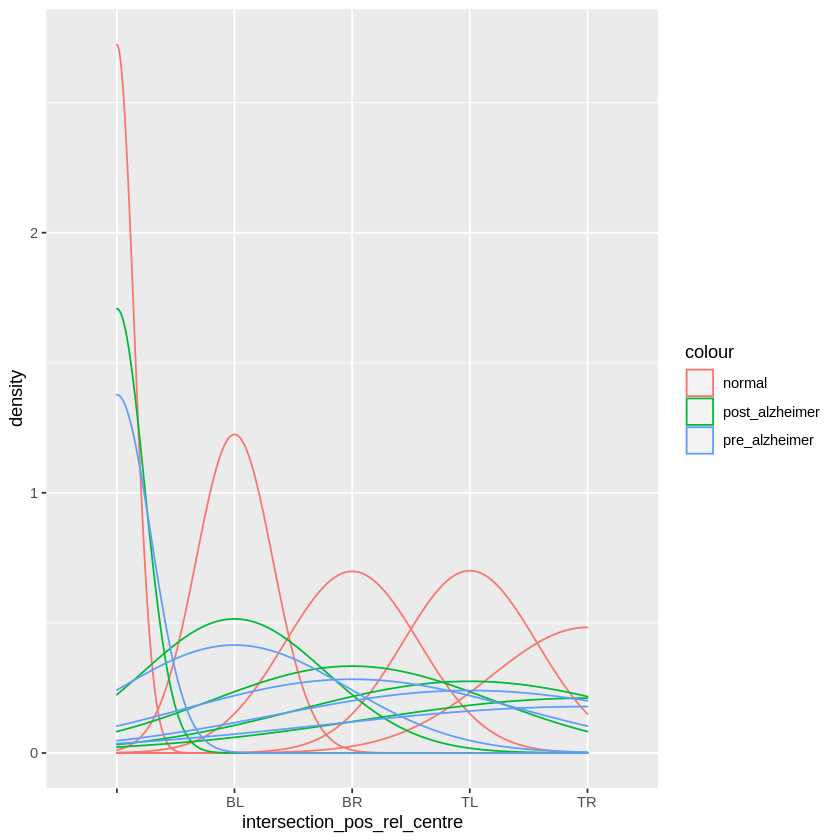

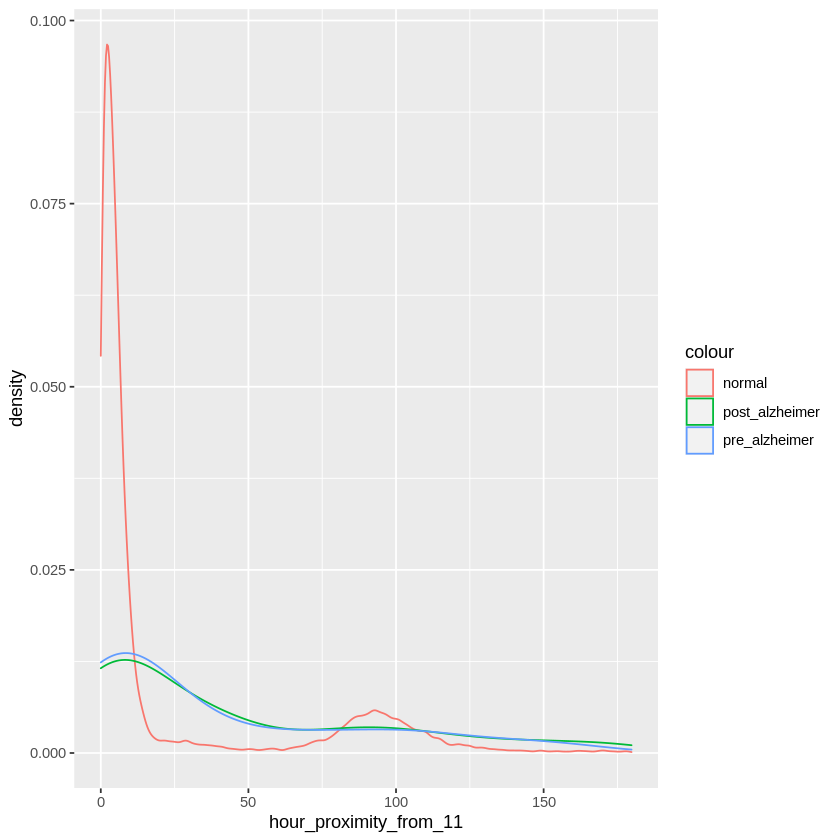

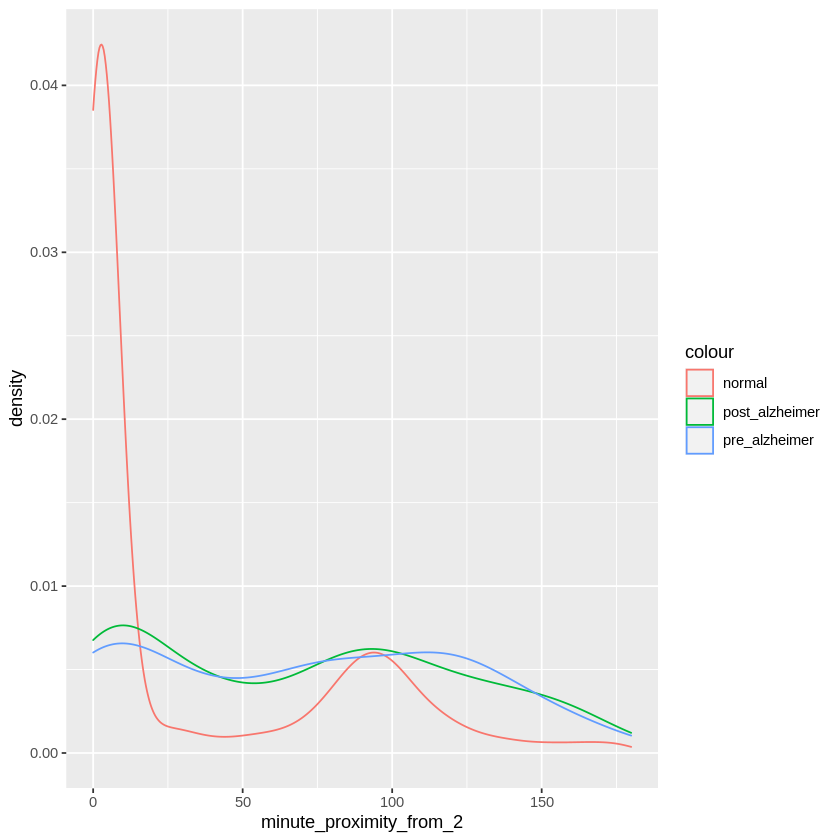

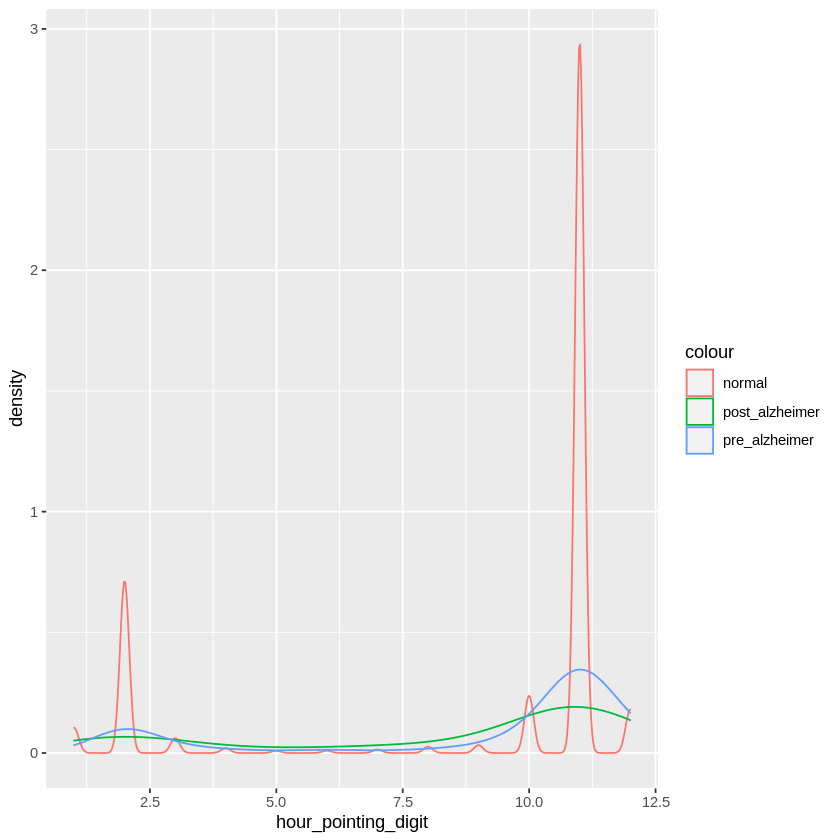

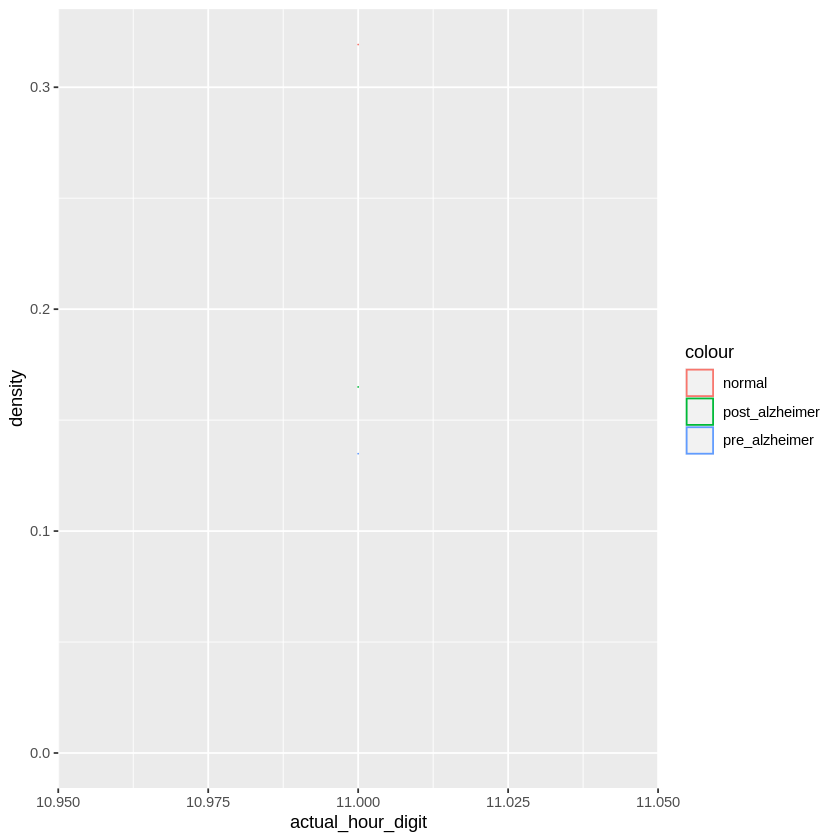

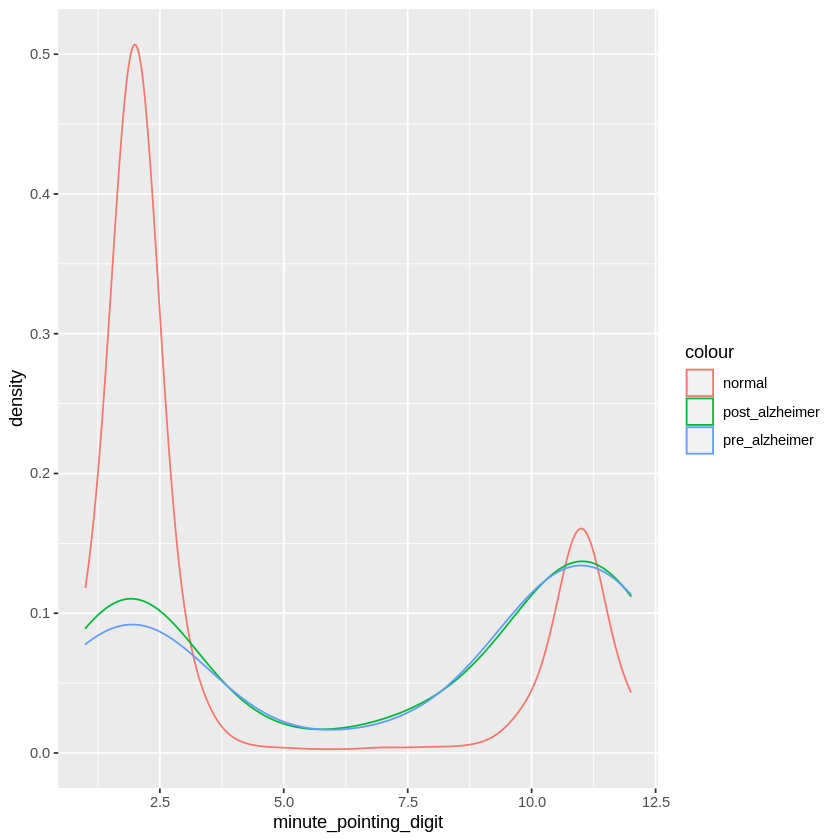

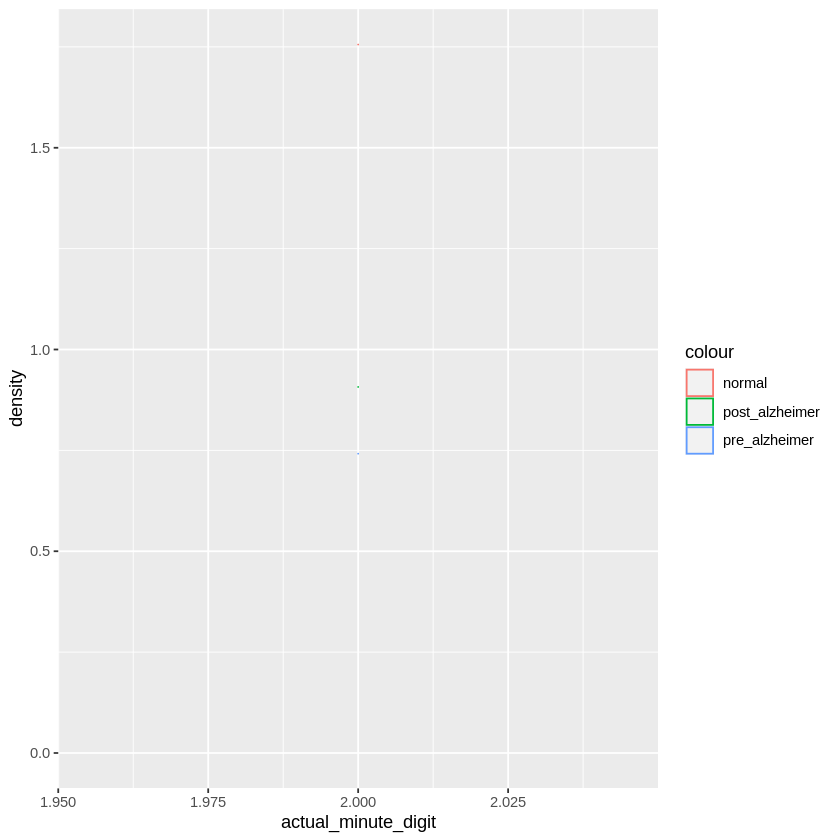

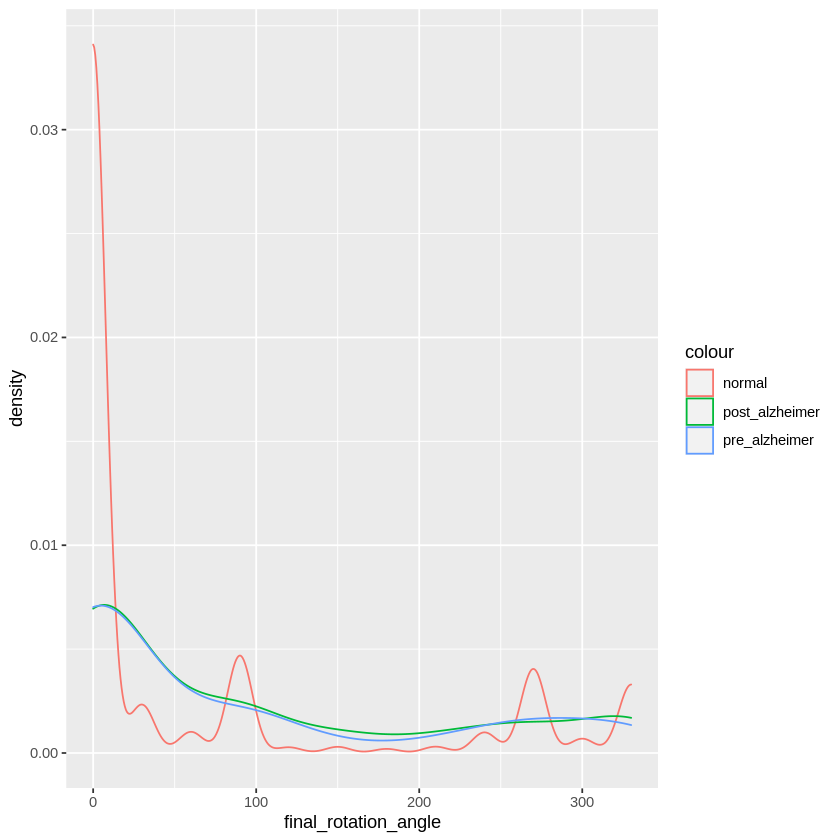

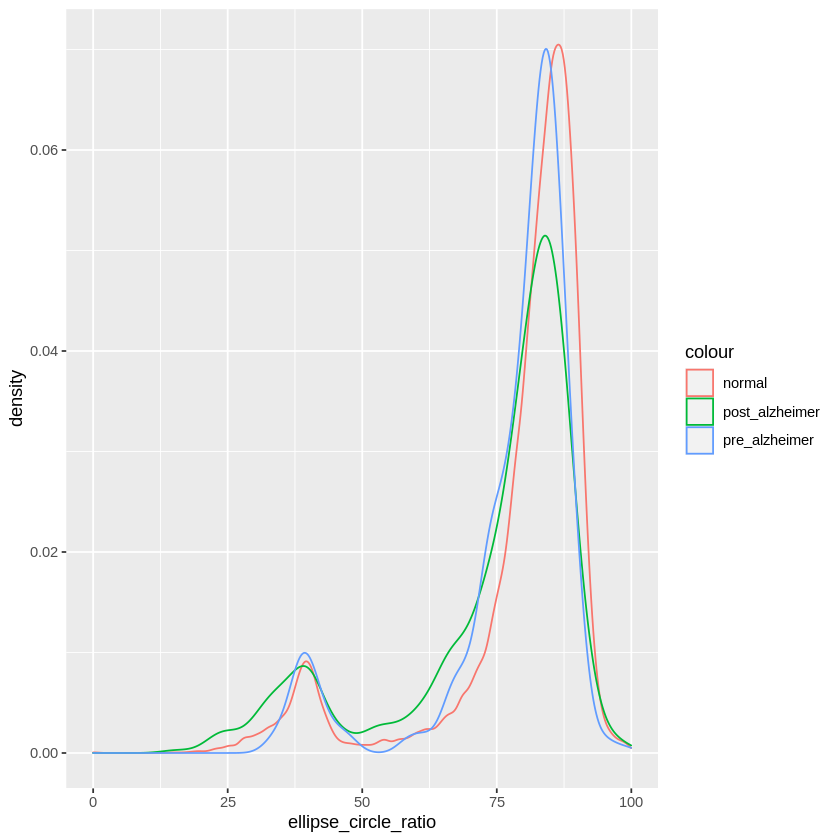

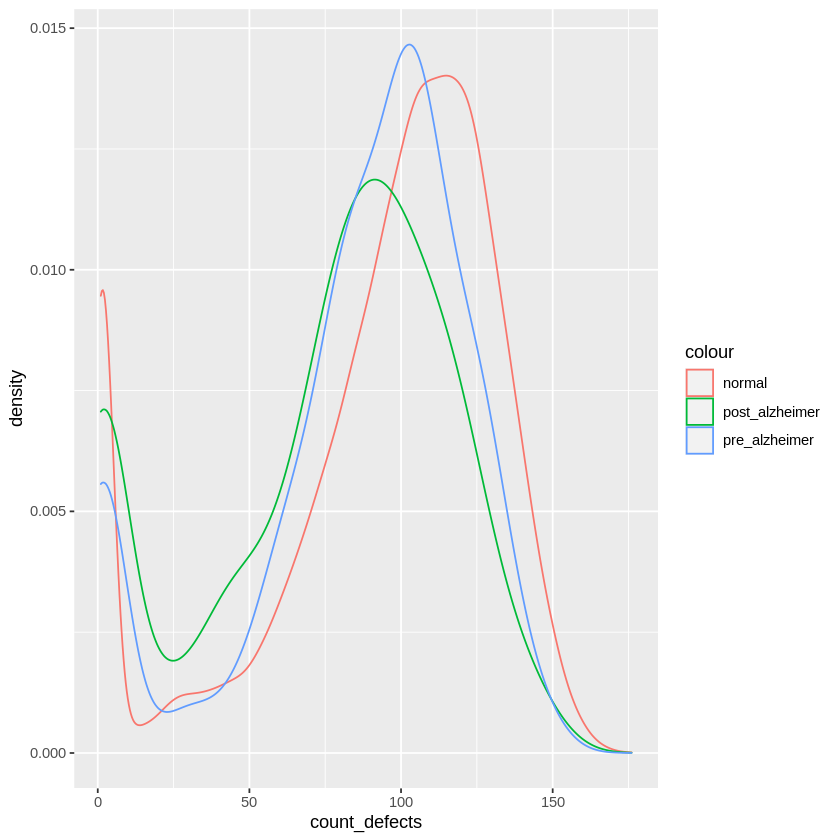

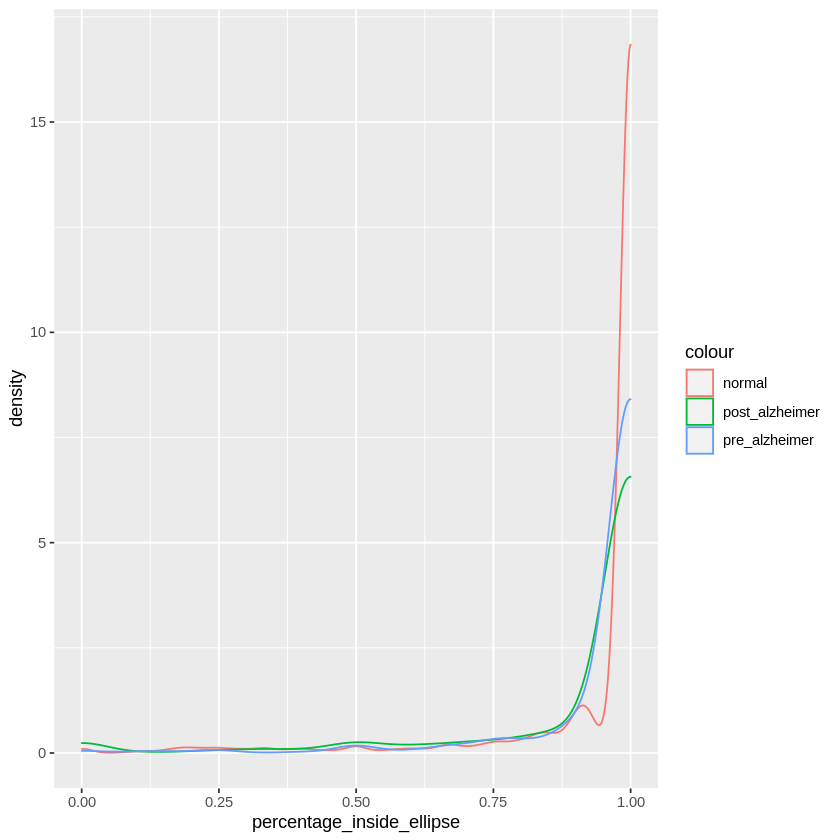

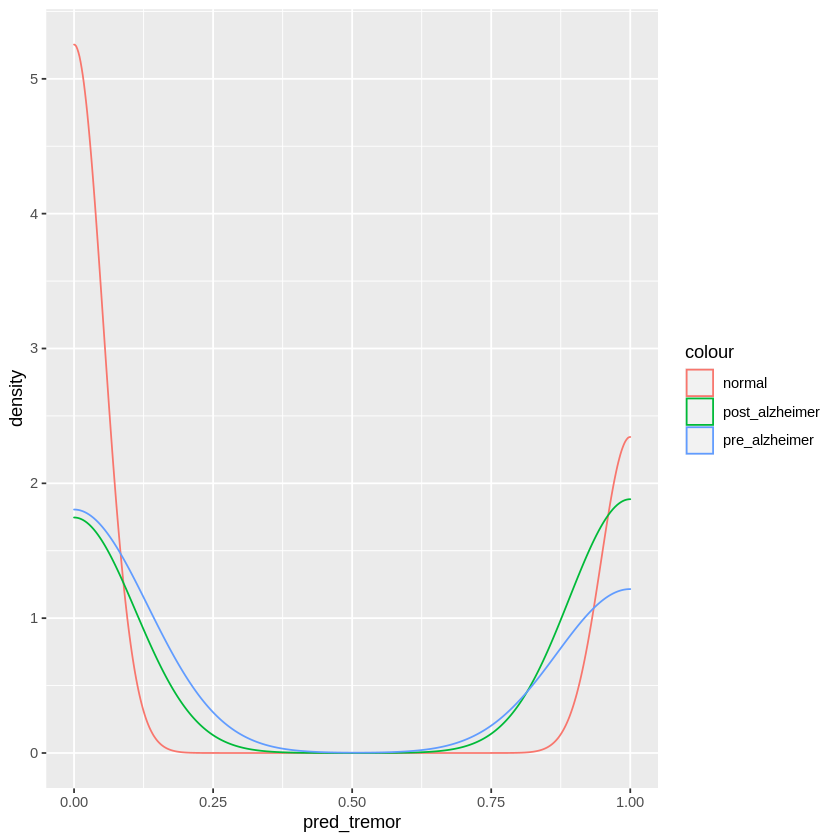

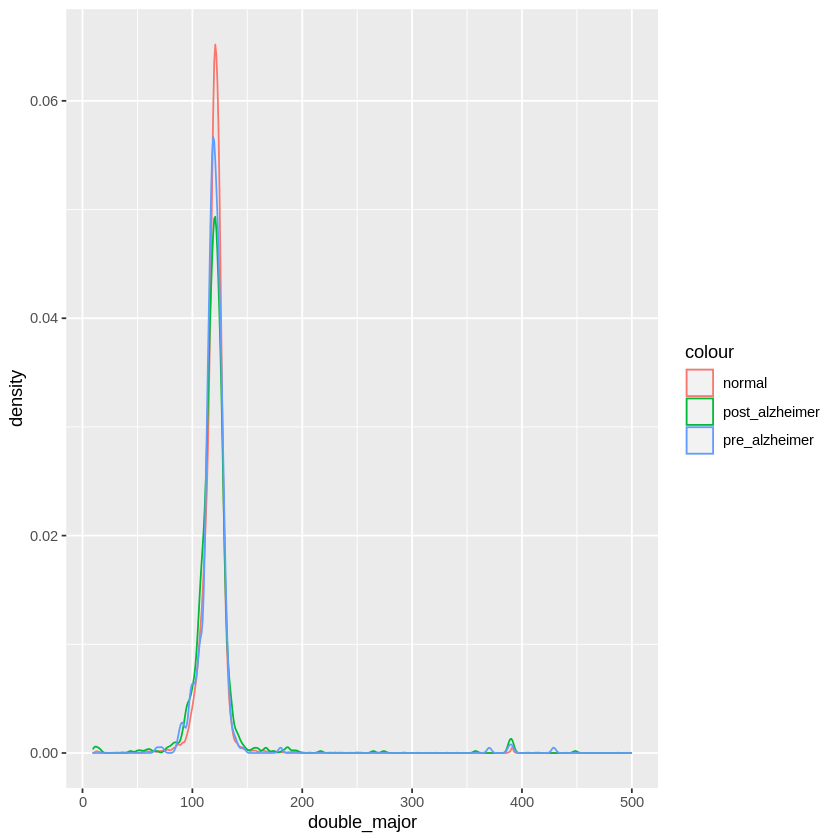

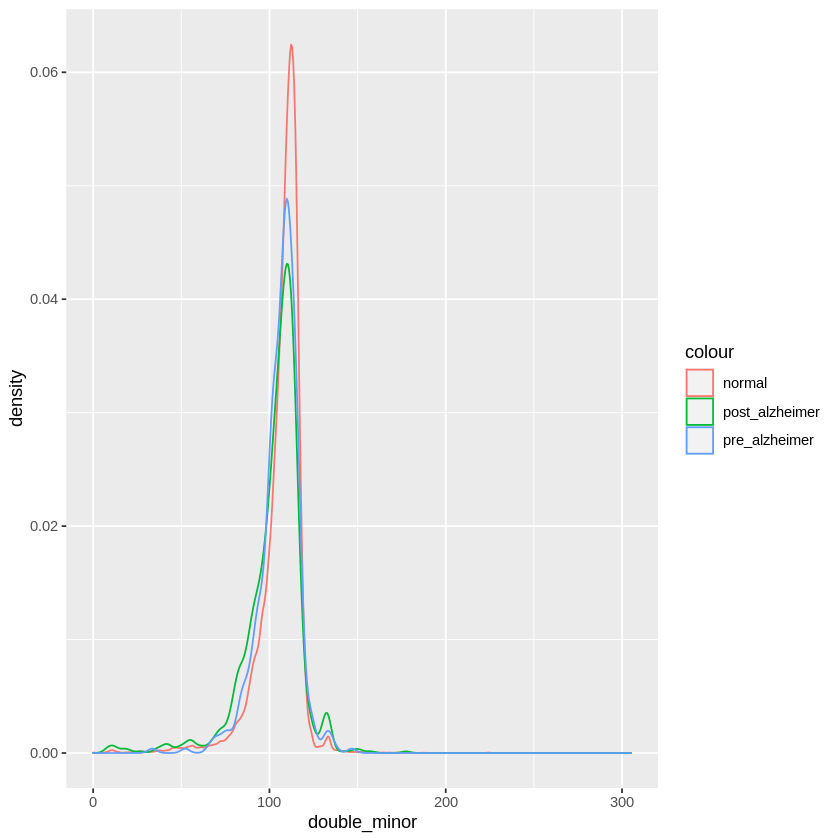

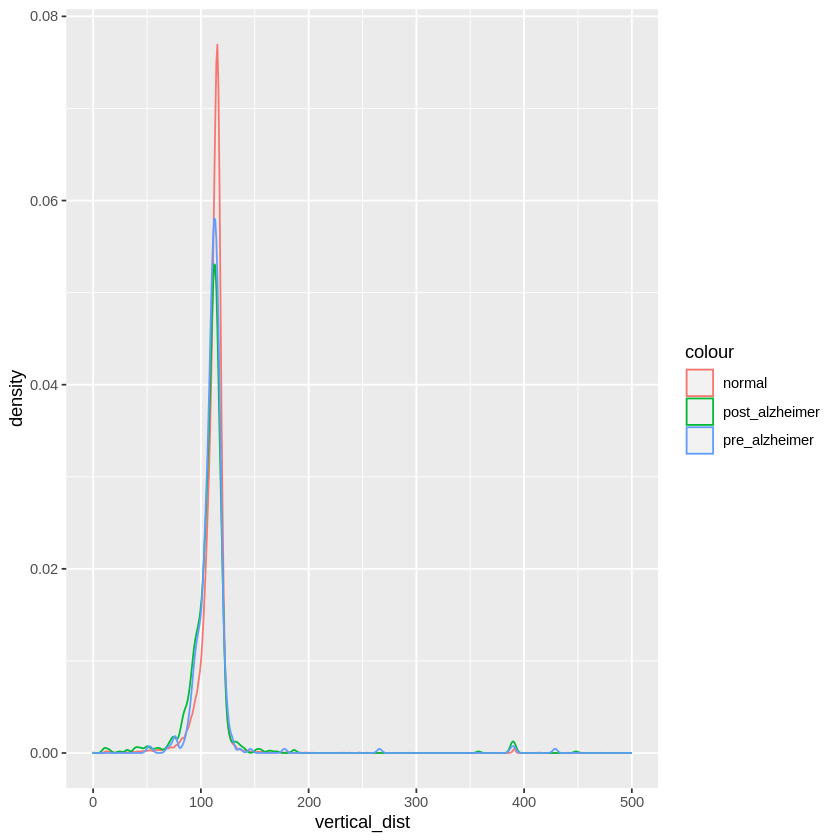

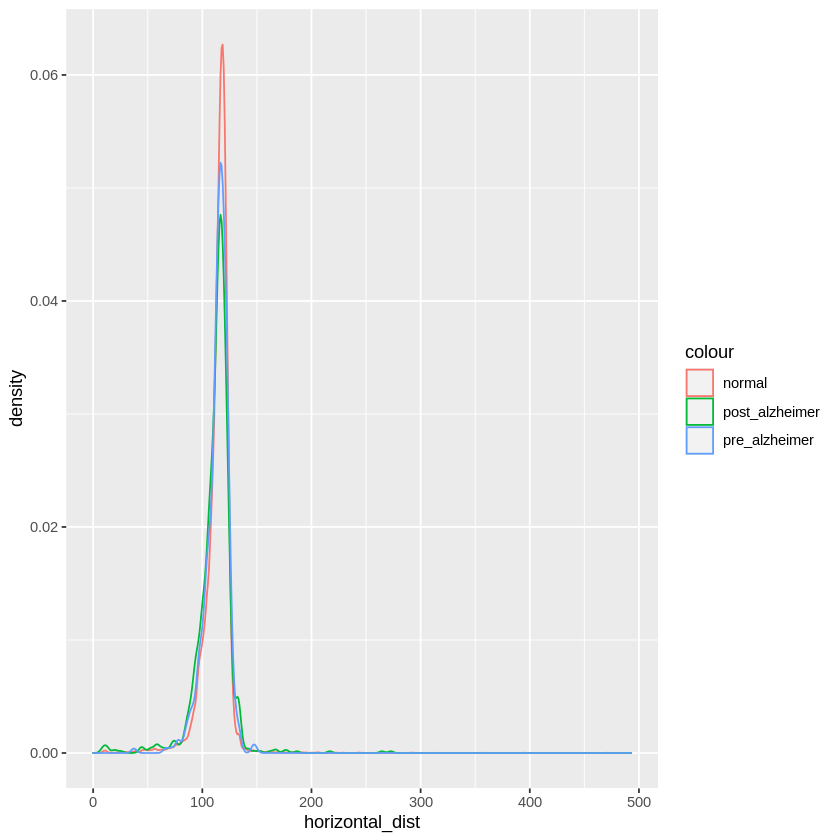

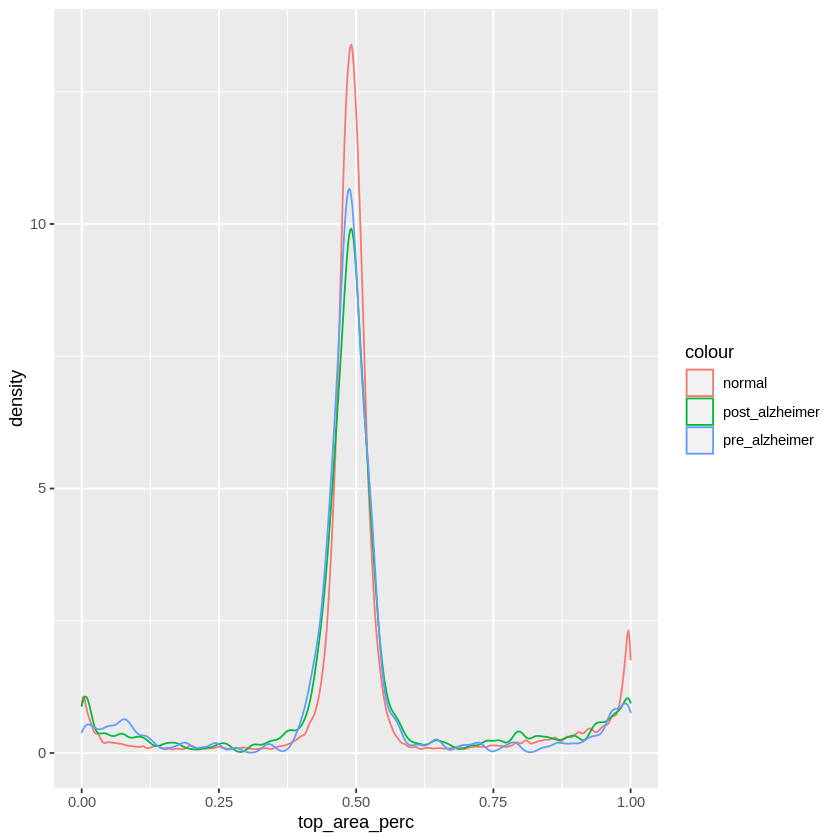

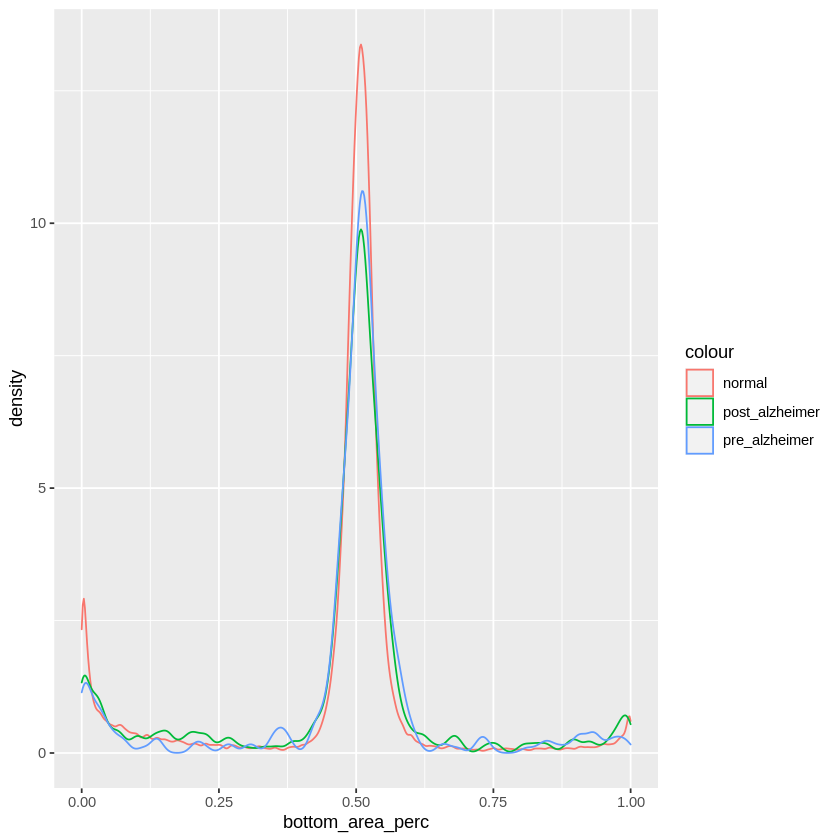

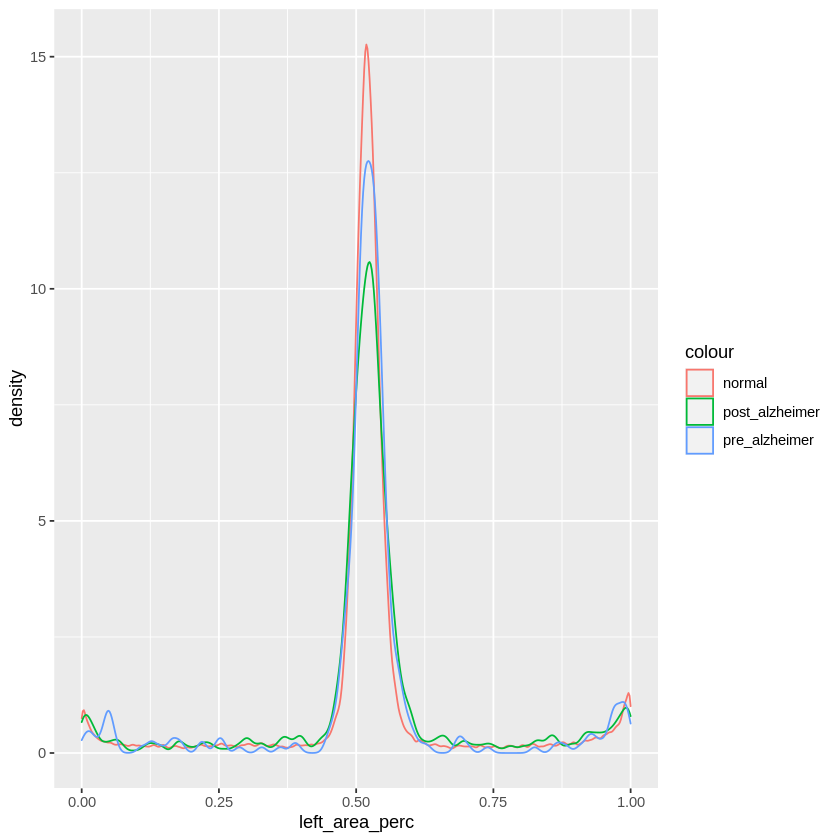

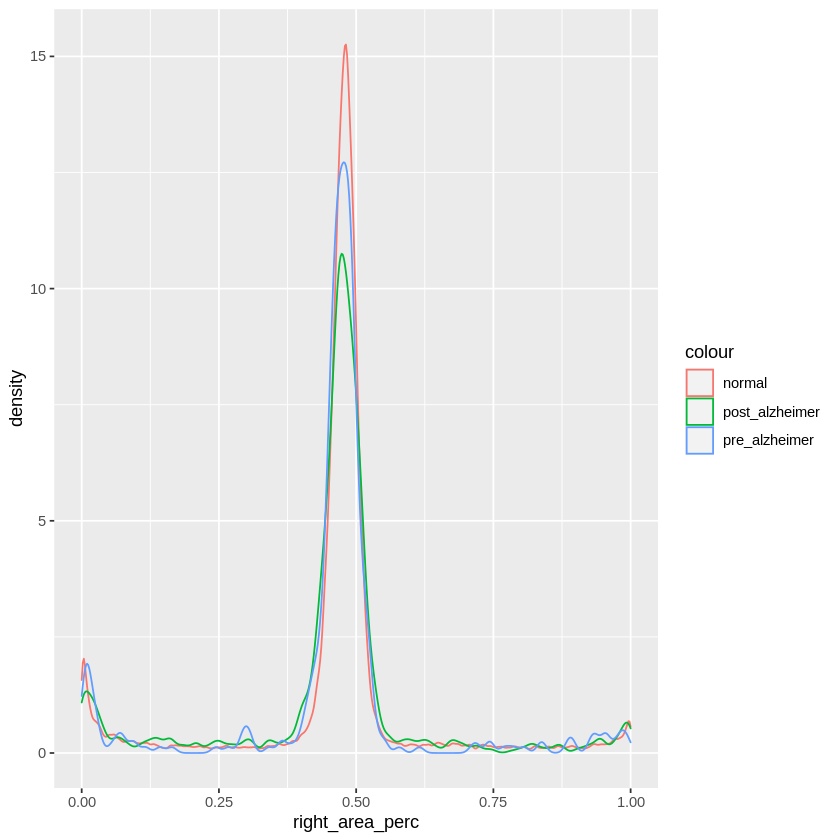

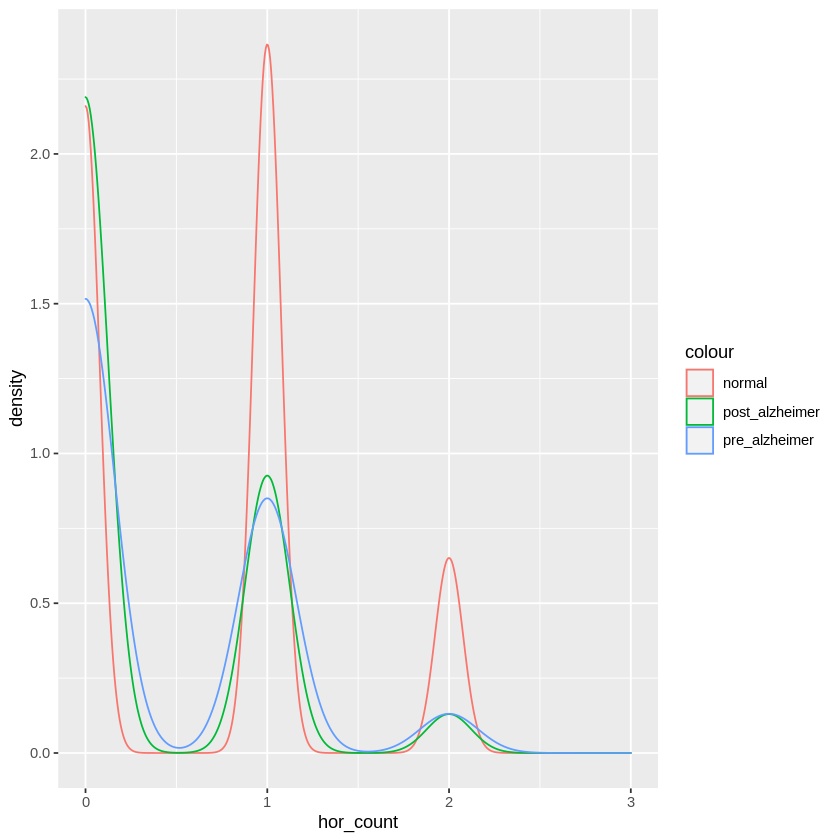

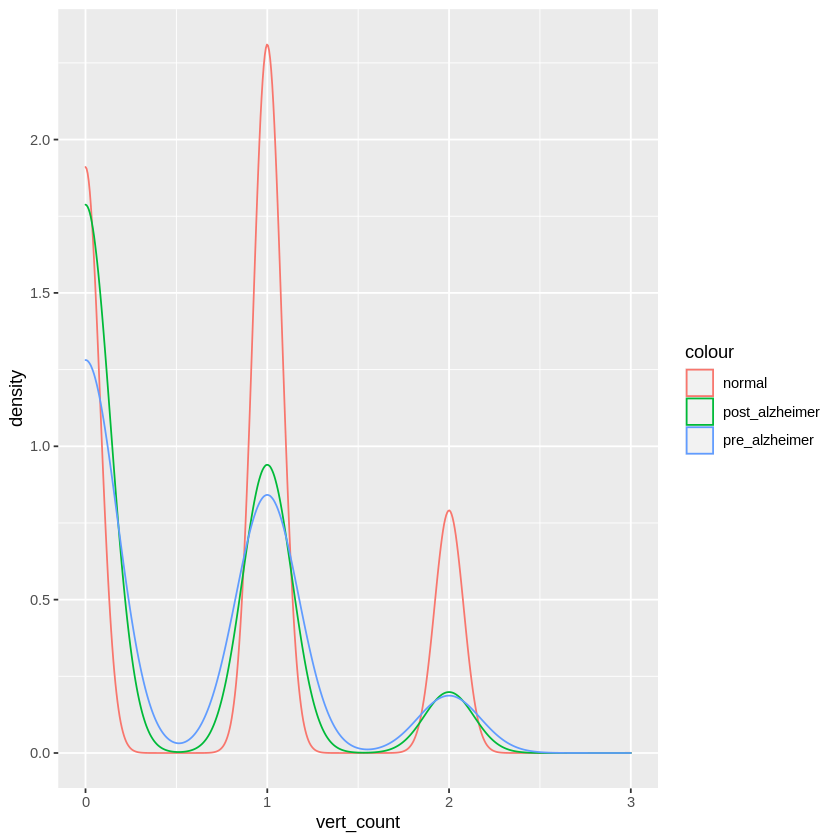

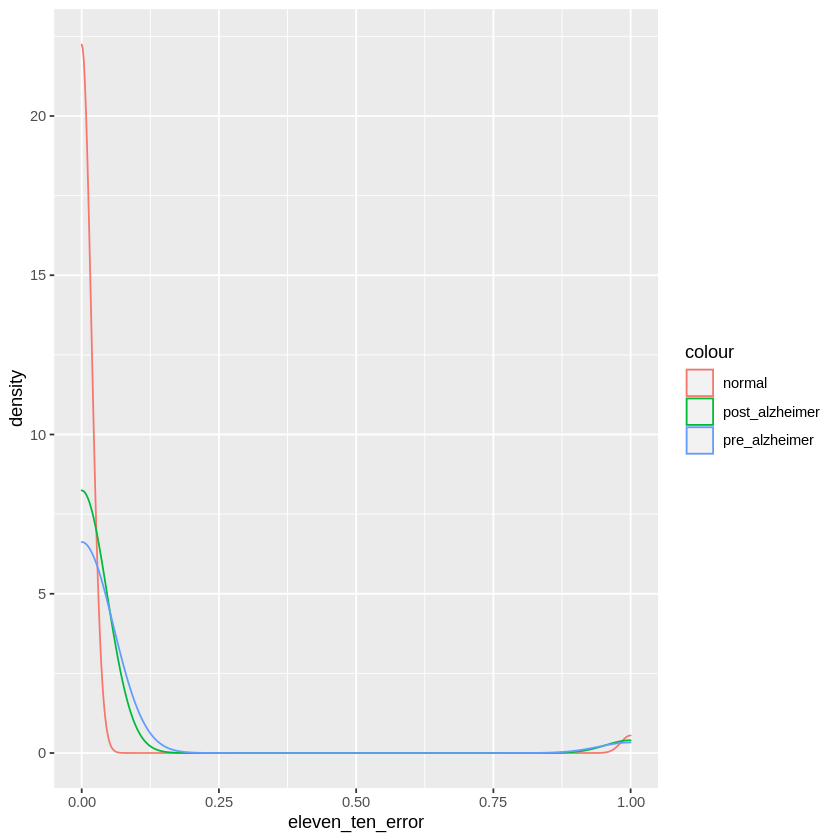

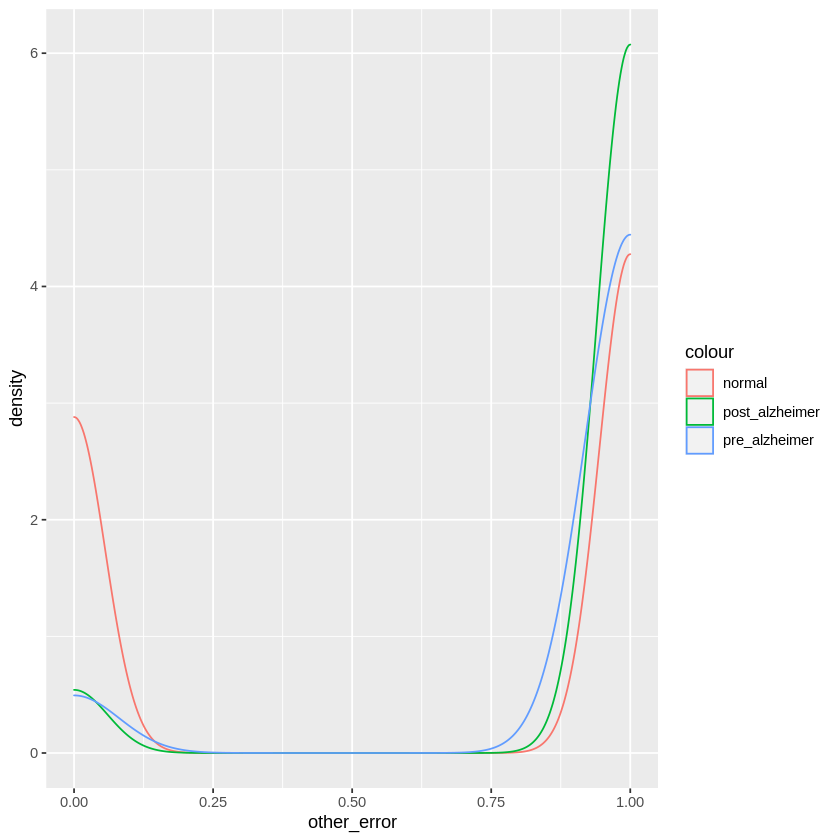

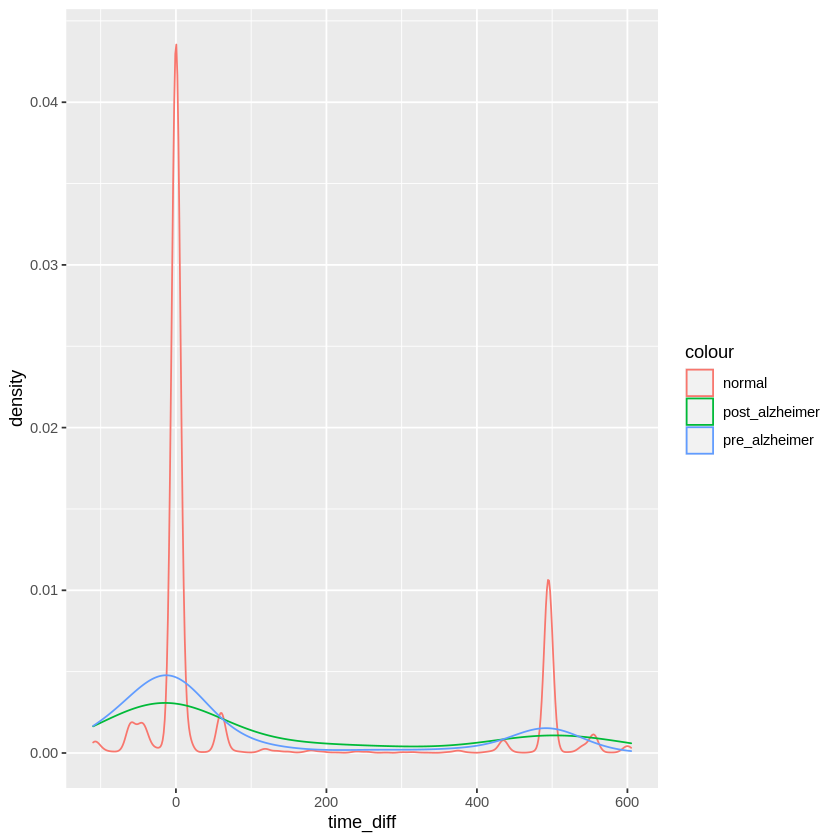

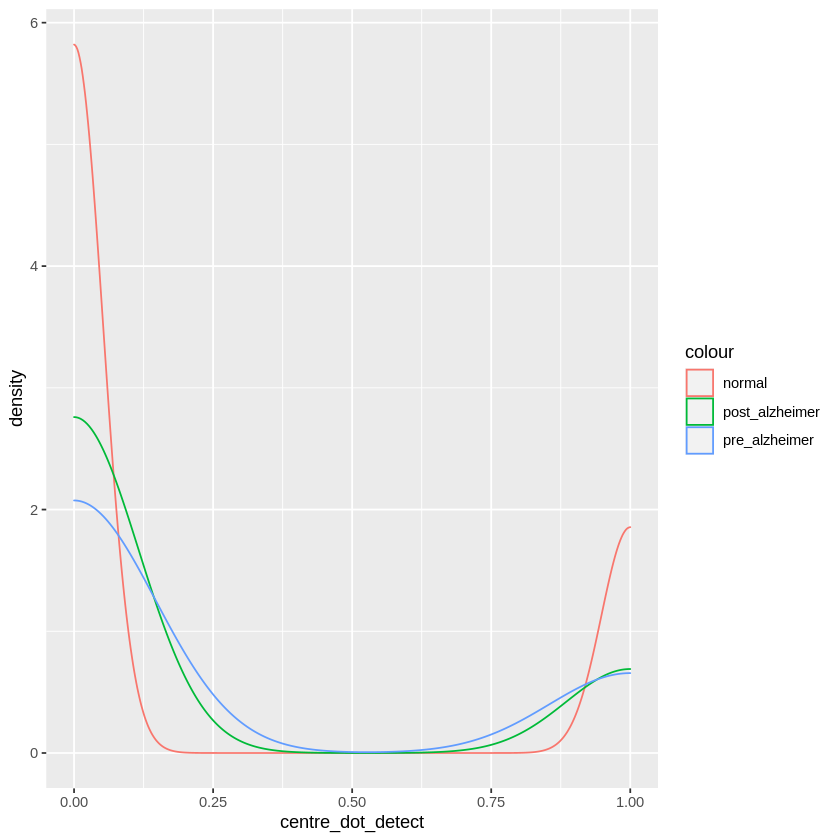

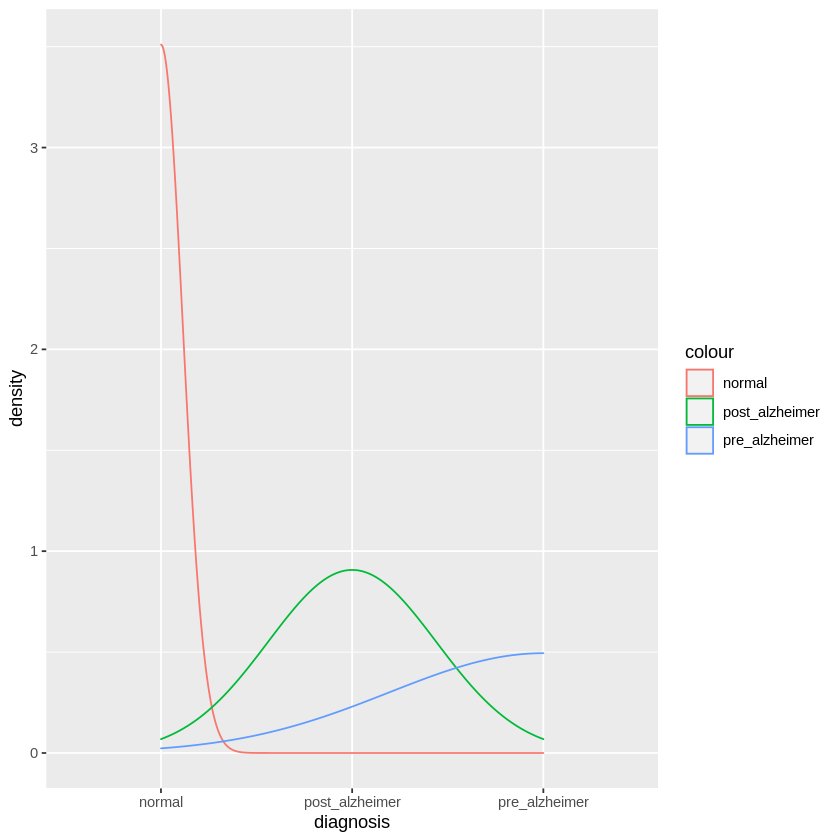

In [41]:
# Remove the ID variable
td <- td[, !names(td) %in% c("row_id")]

# Number of graphs to produce, and their name
nvar = ncol(td)
#nvar = 5
var_list = combn(names(td)[1:nvar], 1, simplify=FALSE)

# Make plots.
for (i in 1:nvar) {
  p = ggplot(td, aes_string(x=var_list[[i]][1], color=td$diagnosis)) +
            geom_density(alpha=0, na.rm=TRUE)
  print(p)
}

In [42]:
# Correlation
#
# Creating a numerical version of the diagnosis
# tds <- td %>% mutate(diag.normal = ifelse(diagnosis == "normal",1,0)) %>% 
#              mutate(diag.pre    = ifelse(diagnosis == "pre_alzheimer",1,0)) %>% 
#               mutate(diag.post   = ifelse(diagnosis == "post_alzheimer",1,0)) 

# What's correlated with a normal condition?
#  td_normal <- tds %>% select(-diagnosis,-diag.pre,-diag.post)
#  corr_var(td_normal, # name of dataset
#         diag.normal, # name of variable to focus on
#         top = 30 # display top correlations
#)   

# This wonderful correlation function is within the "lares" package.
# Unfortunately, I wasn't able to install it.  
#   Not available on CRAN.
#   VMs can't install from github
#   VM wasn't able to install from raw zip file.
#   Conda copy is outdated.
#
# I still recommend this package, look it up!


## Train your model

In [43]:
# Applying my preprocessing
#   Cleaning and Feature Engineering

td_clean <- preprocess(td)



# Creating data set to feed xgboost

x_data <- td_clean %>% select(-diagnosis)
y_data <- td_clean %>% select( diagnosis)
y_label = as.integer(y_data$diagnosis) -1

mat_train = as.matrix(sapply(x_data,as.numeric))

xgb_train_data = xgb.DMatrix(data= mat_train , label = y_label)


In [ ]:
# Defining the parameters

params_multi = list(
  booster = "gbtree",
  eta = 0.01,
  max_depth = 6,
  gamma = 0,
  subsample = 0.55,
  colsample_bytree = 0.55,
  min_child_weight= 10,
  objective = "multi:softprob",
  eval_metric="mlogloss",
  num_class = 3
)

# Fit

xgb_multi = xgb.train(
  params = params_multi,
  data = xgb_train_data,
  nrounds = 250,
  verbose = 1
)



In [ ]:
# Importance of the features
names <- dimnames(xgb_train_data)[[2]]
imp <- xgb.importance(names, model=xgb_multi)
imp

In [ ]:
xgb.plot.importance(imp, top_n = 10)

## Save your trained model

In [ ]:
xgb.save(xgb_multi, file.path(AICROWD_ASSETS_DIR,"xgb_multi_file"))

# Prediction phase 🔎

Please make sure to save the weights from the training section in your assets directory and load them in this section

In [ ]:
xgb_multi <- xgb.load(file.path(AICROWD_ASSETS_DIR,"xgb_multi_file"))

## Load test data

In [ ]:
test_data = read.csv(AICROWD_DATASET_PATH)
head(test_data)
row_id = test_data$row_id

## Generate predictions 🔎

In [ ]:
test_data <- preprocess(test_data)
mat_test = as.matrix(sapply(test_data,as.numeric))

xgb_pred = as.data.frame(predict(xgb_multi, mat_test, reshape=T))
colnames(xgb_pred) = c("normal","post_alzheimer","pre_alzheimer")
summary(xgb_pred)

## Save predictions 📨

In [ ]:
predictions <- data.frame(
    row_id = row_id,
    normal_diagnosis_probability = xgb_pred$normal,
    post_alzheimer_diagnosis_probability = xgb_pred$post_alzheimer,
    pre_alzheimer_diagnosis_probability = xgb_pred$pre_alzheimer
)


write.csv(predictions, AICROWD_PREDICTIONS_PATH, row.names=FALSE)

# Submit to AIcrowd 🚀

**NOTE: PLEASE SAVE THE NOTEBOOK BEFORE SUBMITTING IT (Ctrl + S)**

In [ ]:
aicrowd_login(AICROWD_API_KEY)
aicrowd_submit(AICROWD_ASSETS_DIR, "addi-alzheimers-detection-challenge", dataset_dir = AICROWD_DATASET_PATH)